<a href="https://colab.research.google.com/github/Lori-Qi/Credit-Risk-Analysis-with-ML-DL/blob/main/Credit_Risk_Classification_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

plt.style.use("ggplot")

# 2. Data processing

## 2.1 Observation data

In [ ]:
df_train=pd.read_csv('train.csv', encoding='GB18030')
df_train_copy = df_train.copy()
df_train_copy.head()

d:\python\envs\env_GPU\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df_train.shape

(100000, 28)

In [ ]:
type(df_train_copy['Age'][0])

str

In [ ]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df_train_copy.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## 2.2 Handling of dirty data

In [ ]:
def text_cleaning(data):
    if pd.isna(data) or not isinstance(data, str):
        return data
    else:

        return str(data).strip('_ ,"')
df = df_train_copy.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.nan)

## 2.3 Deletion of unique data

In [ ]:
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

## 2.4 Splitting Type_of_Loan

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('').astype(str)
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\band\b ', '', regex=True)

df['Type_of_Loan'] = df['Type_of_Loan'].str.split(', ')

mlb = MultiLabelBinarizer()
loan_type_encoded = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']),
                                 columns=mlb.classes_,
                                 index=df.index)

In [ ]:
loan_type_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0                            100000 non-null  int32
 1   Auto Loan                100000 non-null  int32
 2   Credit-Builder Loan      100000 non-null  int32
 3   Debt Consolidation Loan  100000 non-null  int32
 4   Home Equity Loan         100000 non-null  int32
 5   Mortgage Loan            100000 non-null  int32
 6   Not Specified            100000 non-null  int32
 7   Payday Loan              100000 non-null  int32
 8   Personal Loan            100000 non-null  int32
 9   Student Loan             100000 non-null  int32
dtypes: int32(10)
memory usage: 3.8 MB


In [ ]:
df = pd.concat([df, loan_type_encoded], axis=1)

df = df.drop(columns=['Type_of_Loan'])
df = df.drop(columns=[''])
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,1,1,0,1,0,0,0,1,0
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,Good,1,1,0,1,0,0,0,1,0
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,Good,1,1,0,1,0,0,0,1,0
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,Good,1,1,0,1,0,0,0,1,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,Good,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,Poor,1,0,0,0,0,0,0,0,1
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,Poor,1,0,0,0,0,0,0,0,1
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,Poor,1,0,0,0,0,0,0,0,1
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,Standard,1,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      97909 non-null   object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

## 2.5 String type to numeric value

In [ ]:
def convert_to_numeric(df, columns):
    for col in columns:

        df[col] = pd.to_numeric(df[col].str.replace(',', '').str.extract('(\d+\.?\d*)')[0], errors='coerce')
    return df

columns_to_convert = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',

    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]


In [ ]:
df = convert_to_numeric(df, columns_to_convert)

print(df[columns_to_convert].dtypes)

Age                          int64
Annual_Income              float64
Num_of_Loan                  int64
Num_of_Delayed_Payment     float64
Changed_Credit_Limit       float64
Outstanding_Debt           float64
Amount_invested_monthly    float64
Monthly_Balance            float64
dtype: object


## 2.6 Time String Conversion Values

In [ ]:
def convert_to_years(value):
    if pd.isna(value):
        return np.nan
    years, months = 0, 0
    if 'Years' in value:
        years = int(value.split(' Years')[0])
    if 'Months' in value:
        months = int(value.split(' and ')[-1].split(' Months')[0])
    return years + months / 12

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_years)

## 2.7 Handling month strings

In [ ]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['Month_num'] = df['Month'].map(month_mapping)

df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

df = df.drop(columns=['Month', 'Month_num'])

## 2.8 Perform one-hot encoding on other string data

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Credit_Mix', 'Occupation','Payment_Behaviour','Payment_of_Min_Amount'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  int64  
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               84998 non-null   float64
 3   Num_Bank_Accounts                                   100000 non-null  int64  
 4   Num_Credit_Card                                     100000 non-null  int64  
 5   Interest_Rate                                       100000 non-null  int64  
 6   Num_of_Loan                                         100000 non-null  int64  
 7   Delay_from_due_date                                 100000 non-null  int64  
 8   Num_of_Delayed_Payment                              92998 non-nul

## 2.9 Credit_Score Mapping

In [ ]:
credit_score_mapping = {
    'Good': 2,
    'Standard': 1,
    'Poor': 0
}

df_encoded['Credit_Score'] = df_encoded['Credit_Score'].map(credit_score_mapping)


In [ ]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.195097e+02,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,1.076196e+01,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,92998.0,3.094627e+01,2.260288e+02,0.000000,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,1.046568e+01,6.670732e+00,0.000000,5.350000,9.400000,14.870000,3.697000e+01


In [ ]:
df_encoded['Age']

0         23
1         23
2        500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

## 2.10 Removing outliers and handling negative values

In [ ]:
def remove_outliers_iqr_and_negatives(df):
    outliers_count = {}

    columns_to_process = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
    ]
    columns_to_remove_negatives = ['Age', 'Annual_Income', 'Num_Bank_Accounts',
                                   'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                                   'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                                   'Total_EMI_per_month', 'Amount_invested_monthly']

    for column in columns_to_process:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].apply(lambda x: float(x) if pd.notnull(x) else x)

            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR

            condition = (df[column] < lower_bound) | (df[column] > upper_bound)

            if column in columns_to_remove_negatives:
                condition = condition | (df[column] < 0)

            outliers_count[column] = condition.sum()

            df.loc[condition, column] = np.nan

    return outliers_count

In [ ]:
outliers_count = remove_outliers_iqr_and_negatives(df_encoded)

In [ ]:
print("每列处理的异常值数量：")
for column, count in outliers_count.items():
    print(f"{column}: {count} 个异常值")

每列处理的异常值数量：
Age: 2781 个异常值
Annual_Income: 999 个异常值
Monthly_Inhand_Salary: 0 个异常值
Num_Bank_Accounts: 1335 个异常值
Num_Credit_Card: 2266 个异常值
Interest_Rate: 2034 个异常值
Num_of_Loan: 4346 个异常值
Delay_from_due_date: 0 个异常值
Num_of_Delayed_Payment: 736 个异常值
Changed_Credit_Limit: 0 个异常值
Num_Credit_Inquiries: 1649 个异常值
Outstanding_Debt: 0 个异常值
Credit_Utilization_Ratio: 0 个异常值
Credit_History_Age: 0 个异常值
Total_EMI_per_month: 4270 个异常值
Amount_invested_monthly: 6103 个异常值
Monthly_Balance: 1535 个异常值


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 97219 non-null   float64
 1   Annual_Income                                       99001 non-null   float64
 2   Monthly_Inhand_Salary                               84998 non-null   float64
 3   Num_Bank_Accounts                                   98665 non-null   float64
 4   Num_Credit_Card                                     97734 non-null   float64
 5   Interest_Rate                                       97966 non-null   float64
 6   Num_of_Loan                                         95654 non-null   float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              92262 non-nul

## 2.11 Delineating the training set test set

In [ ]:
X = df_encoded.drop('Credit_Score', axis=1)
y = df_encoded['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)


(70000, 55)


## 2.12 Null processing

In [ ]:
columns_with_na = df_encoded.columns[df_encoded.isna().any()]

for col in columns_with_na:
    if col == 'Credit_Mix':
        mode_value = X[col].mode()[0]
        df_encoded[col].fillna(mode_value, inplace=True)
    else:
        median_value = X[col].median()
        df_encoded[col].fillna(median_value, inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [ ]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311110,10.618880,14.000000,25.000000,33.000000,41.000000,56.000000
Annual_Income,100000.0,50362.674729,38128.506599,7005.930000,19457.500000,36993.940000,71367.775000,179987.280000
Monthly_Inhand_Salary,100000.0,4029.084964,2961.363540,303.645417,1792.084167,3093.745000,5371.525000,15204.633333
Num_Bank_Accounts,100000.0,5.364180,2.575733,0.000000,3.000000,5.000000,7.000000,18.000000
Num_Credit_Card,100000.0,5.521730,2.046824,0.000000,4.000000,5.000000,7.000000,16.000000
Interest_Rate,100000.0,14.500450,8.653109,1.000000,8.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.510840,2.396802,0.000000,2.000000,3.000000,5.000000,18.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.388780,6.018411,0.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.443395,6.602381,0.000000,5.430000,9.400000,14.660000,36.970000


In [ ]:
df_encoded.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311110,10.618880,14.000000,25.000000,33.000000,41.000000,56.000000
Annual_Income,100000.0,50362.674729,38128.506599,7005.930000,19457.500000,36993.940000,71367.775000,179987.280000
Monthly_Inhand_Salary,100000.0,4029.084964,2961.363540,303.645417,1792.084167,3093.745000,5371.525000,15204.633333
Num_Bank_Accounts,100000.0,5.364180,2.575733,0.000000,3.000000,5.000000,7.000000,18.000000
Num_Credit_Card,100000.0,5.521730,2.046824,0.000000,4.000000,5.000000,7.000000,16.000000
Interest_Rate,100000.0,14.500450,8.653109,1.000000,8.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.510840,2.396802,0.000000,2.000000,3.000000,5.000000,18.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.388780,6.018411,0.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.443395,6.602381,0.000000,5.430000,9.400000,14.660000,36.970000


## 2.13 Feature selection

In [ ]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

In [ ]:
feature_importance

[('Outstanding_Debt', 0.10134630554791593),
 ('Interest_Rate', 0.06921877899710902),
 ('Delay_from_due_date', 0.05611869213827101),
 ('Changed_Credit_Limit', 0.051281711691399445),
 ('Credit_History_Age', 0.04634069665367313),
 ('Num_Credit_Card', 0.04066548246787236),
 ('Annual_Income', 0.037994076113196114),
 ('Monthly_Balance', 0.03723840620361296),
 ('Num_Credit_Inquiries', 0.036895323416778085),
 ('Credit_Utilization_Ratio', 0.03635901448039965),
 ('Amount_invested_monthly', 0.03602900994274327),
 ('Monthly_Inhand_Salary', 0.03500739190859626),
 ('Total_EMI_per_month', 0.03487302996345069),
 ('Num_of_Delayed_Payment', 0.034801667236053484),
 ('Age', 0.03275509268640876),
 ('Credit_Mix_Good', 0.031417942266171596),
 ('Num_Bank_Accounts', 0.029677452613701527),
 ('Credit_Mix_Standard', 0.02702583855762009),
 ('Num_of_Loan', 0.022286355756930977),
 ('Month_cos', 0.02051288311655602),
 ('Month_sin', 0.01797830818773485),
 ('Payment_of_Min_Amount_Yes', 0.014417276538255442),
 ('Payment

In [ ]:
sorted_features = [f[0] for f in feature_importance]
sorted_importances = [f[1] for f in feature_importance]

cumulative_importance = np.cumsum(sorted_importances)
threshold = 0.9

n_selected_features = np.where(cumulative_importance >= threshold)[0][0] + 1

print(f"Selected {n_selected_features} features that cover {threshold*100}% of cumulative importance")


Selected 29 features that cover 90.0% of cumulative importance


Selected Features: ['Outstanding_Debt', 'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_History_Age', 'Num_Credit_Card', 'Annual_Income', 'Monthly_Balance', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Num_of_Delayed_Payment', 'Age', 'Credit_Mix_Good', 'Num_Bank_Accounts', 'Credit_Mix_Standard', 'Num_of_Loan', 'Month_cos', 'Month_sin', 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Credit_Mix_Bad', 'Payday Loan', 'Student Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Auto Loan', 'Not Specified', 'Mortgage Loan', 'Home Equity Loan', 'Credit-Builder Loan']


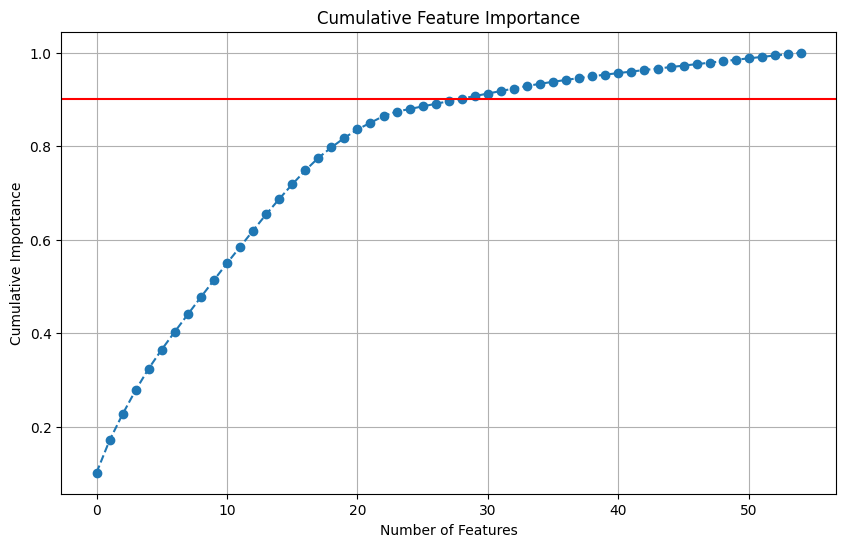

In [ ]:

selected_features = sorted_features[:n_selected_features+4]
X_selected = X_train[selected_features]
print(f"Selected Features: {selected_features}")

plt.figure(figsize=(10, 6))
plt.plot(cumulative_importance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

2.14 Observation of feature correlation

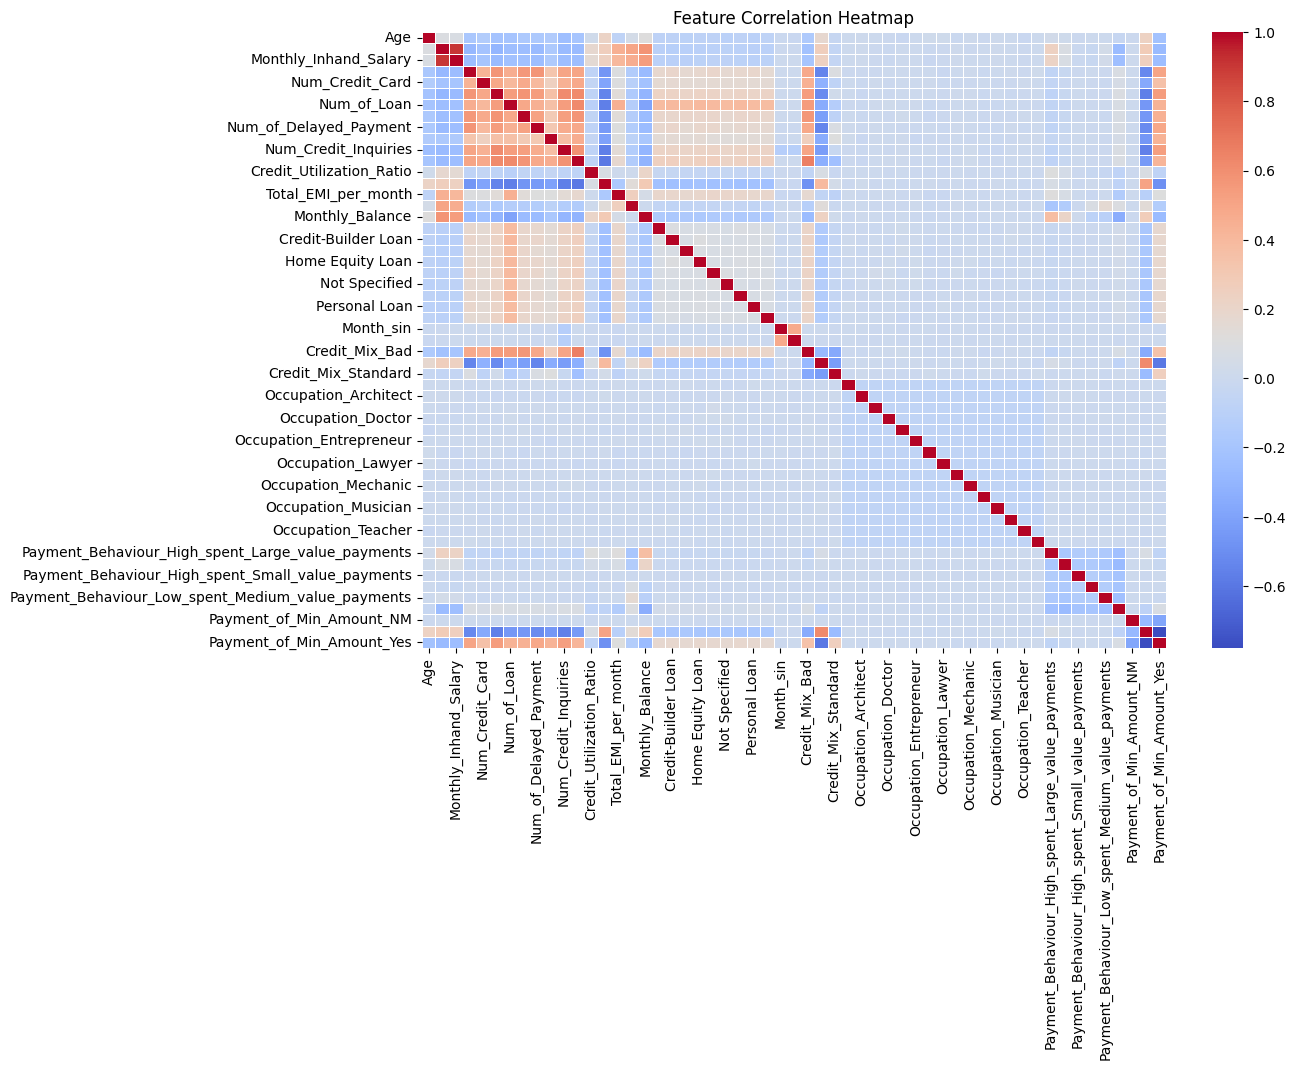

In [ ]:

correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

plt.show()

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

print(f"Selected Features: {selected_features}")

Selected Features: ['Outstanding_Debt', 'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_History_Age', 'Num_Credit_Card', 'Annual_Income', 'Monthly_Balance', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Num_of_Delayed_Payment', 'Age', 'Credit_Mix_Good', 'Num_Bank_Accounts', 'Credit_Mix_Standard', 'Num_of_Loan', 'Month_cos', 'Month_sin', 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Credit_Mix_Bad', 'Payday Loan', 'Student Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Auto Loan', 'Not Specified', 'Mortgage Loan', 'Home Equity Loan', 'Credit-Builder Loan']


In [ ]:
len(selected_features)

33

# 3. Models Training

In [ ]:
X_test_origin=X_selected_test.copy()

In [ ]:
columns_to_process = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
]


## 3.1 Function definitions

In [ ]:
#Model Tuning Functions
def model_fit(model,param_dist,Standardornot=0):

    X = X_selected_train
    y = y_train
    X_test=X_test_origin
    if Standardornot == 1:
        scaler = StandardScaler()
        print('Standardizing')

        X_scaled = pd.DataFrame(scaler.fit_transform(X[columns_to_process]), columns=columns_to_process, index=X.index)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test[columns_to_process]), columns=columns_to_process, index=X_test.index)

        X = pd.concat([X_scaled, X.drop(columns_to_process, axis=1)], axis=1)
        X_test = pd.concat([X_test_scaled, X_test.drop(columns_to_process, axis=1)], axis=1)

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

    random_search.fit(X, y)

    best_params = random_search.best_params_
    print("最优参数：", best_params)

    best_accuracy = random_search.best_score_
    print("最优准确率：", best_accuracy)

    return best_params,X,X_test

In [ ]:
# Model Evaluation Functions
def evaluate_model(model, X_selected_test, y_test, num_classes=3):

    y_pred = model.predict(X_selected_test)
    y_score = model.predict_proba(X_selected_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"准确率: {accuracy:.4f}")

    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")

    print("\n分类报告：")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("True Value")
    plt.show()

    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, y_pred


## 3.2 Models fit

### 3.2.1 Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

param_dist = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

Logistic_best_params,X_train,X_test= model_fit(log_reg, param_dist,Standardornot=1)


Standardizing
Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\python\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
exception calling callback for <Future at 0x2d39bc4d100 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "d:\python\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "d:\python\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "d:\python\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "d:\python\lib\site-packages\joblib\parallel.py", line 359, 

准确率: 0.6457
F1-score: 0.6430
Recall: 0.6457

分类报告：
              precision    recall  f1-score   support

           0       0.66      0.53      0.59      8805
           1       0.67      0.74      0.70     15873
           2       0.55      0.57      0.56      5322

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.64     30000



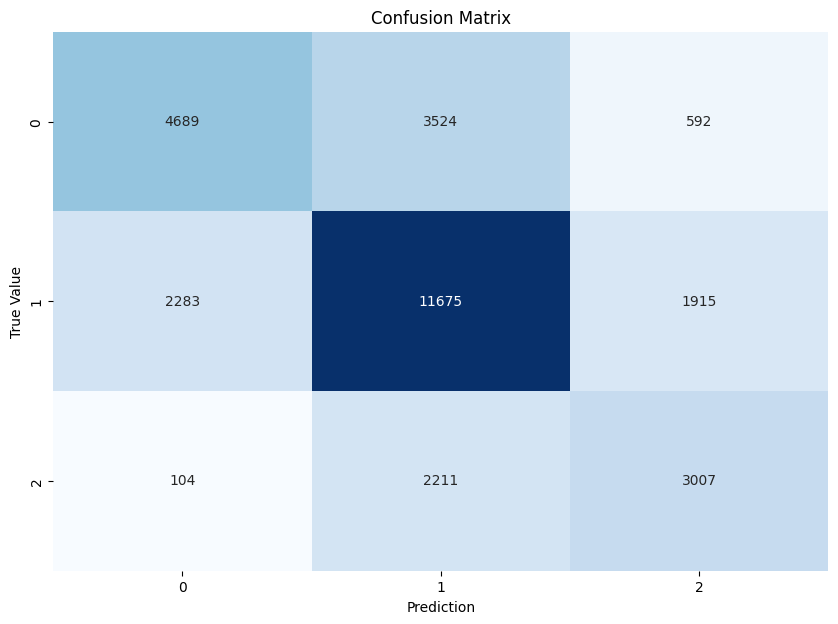

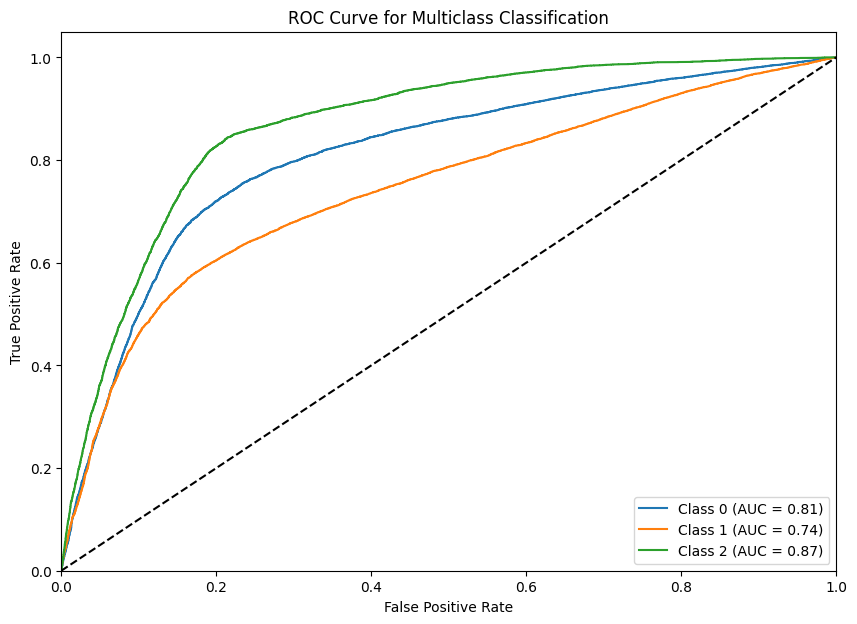

In [ ]:
best_model = LogisticRegression(**Logistic_best_params)
best_model.fit(X_train, y_train)
accuracy, Logistic_y_pred = evaluate_model(best_model, X_test, y_test)

### 3.2.2  XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist')

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10, 1),
    'learning_rate': np.logspace(-3, 0, 5),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': np.logspace(-2, 2, 5),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

xgb_best_params,X_train,X_test= model_fit(xgb_model, param_dist)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=1.0, max_depth=5, n_estimators=250, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=1.0, max_depth=5, n_estimators=250, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=1.0, max_depth=5, n_estimators=250, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=1.0, max_depth=5, n_estimators=250, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=10.0, learning_rate=1.0, max_depth=5, n_estimators=250, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=100.0, learning_rate=0.001, max_depth=9, n_estimators=300, reg_alpha=0.01, reg_lambda=1.0, subsample=0.7; 

准确率: 0.7966
F1-score: 0.7964
Recall: 0.7966

分类报告：
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      8805
           1       0.81      0.82      0.81     15873
           2       0.77      0.74      0.75      5322

    accuracy                           0.80     30000
   macro avg       0.79      0.78      0.79     30000
weighted avg       0.80      0.80      0.80     30000



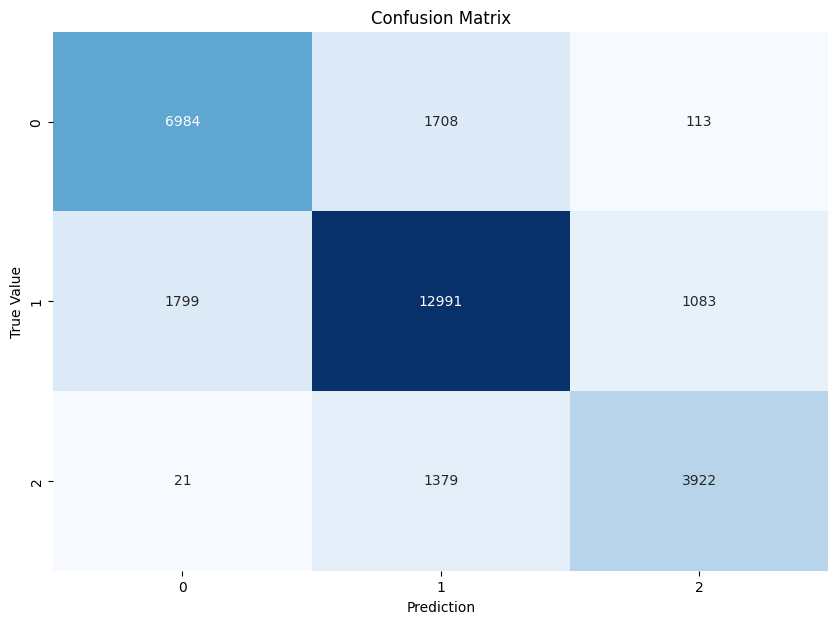

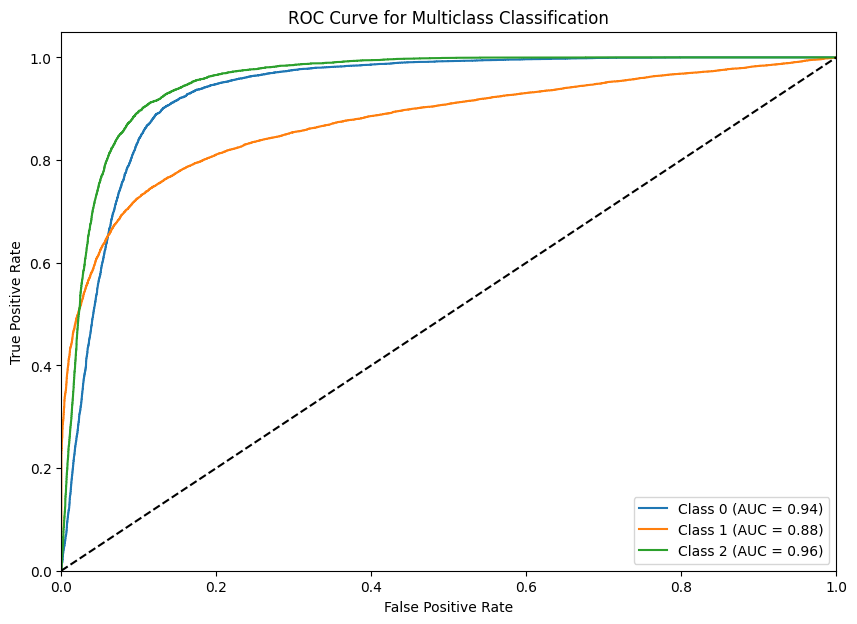

In [ ]:
best_xgb_model = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_model.fit(X_train, y_train)
accuracy, xgb_y_pred = evaluate_model(best_xgb_model, X_test, y_test)


### 3.2.3  Catboost

In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(task_type='GPU', logging_level='Silent')


param_dist = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1],
}

cat_best_params,X_train,X_test = model_fit(catboost_model, param_dist)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bagging_temperature=0.5, border_count=128, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=   3.4s
[CV] END bagging_temperature=0.5, border_count=128, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=   2.2s
[CV] END bagging_temperature=0.5, border_count=128, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=   2.2s
[CV] END bagging_temperature=0.5, border_count=128, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=   2.2s
[CV] END bagging_temperature=0.5, border_count=128, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=   2.1s
[CV] END bagging_temperature=0, border_count=64, depth=8, iterations=200, l2_leaf_reg=3, learning_rate=0.05; total time=   2.0s
[CV] END bagging_temperature=0, border_count=64, depth=8, iterations=200, l2_leaf_reg=3, learning_rate=0.05; total time=   2.0s
[CV] END bagging_temperatur

准确率: 0.7487
F1-score: 0.7486
Recall: 0.7487

分类报告：
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      8805
           1       0.77      0.79      0.78     15873
           2       0.67      0.68      0.68      5322

    accuracy                           0.75     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.75      0.75      0.75     30000



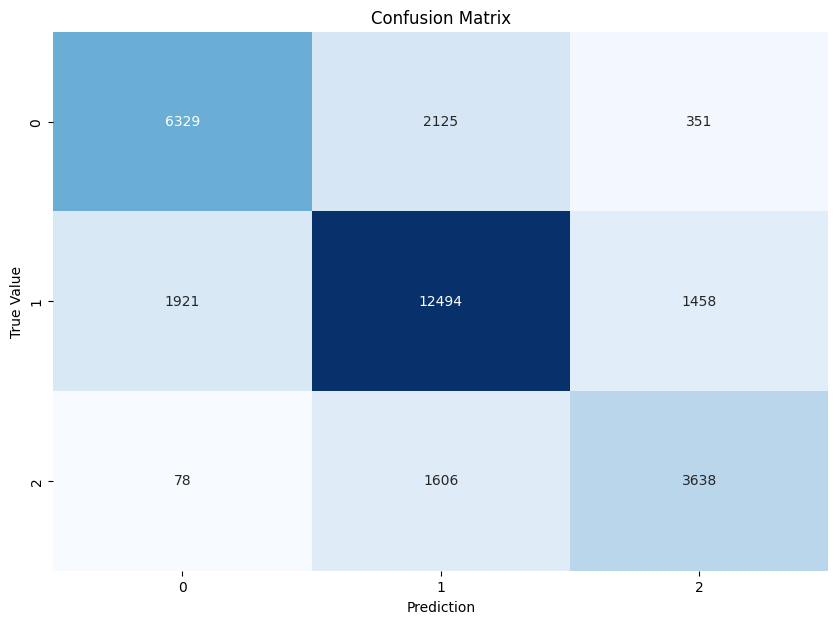

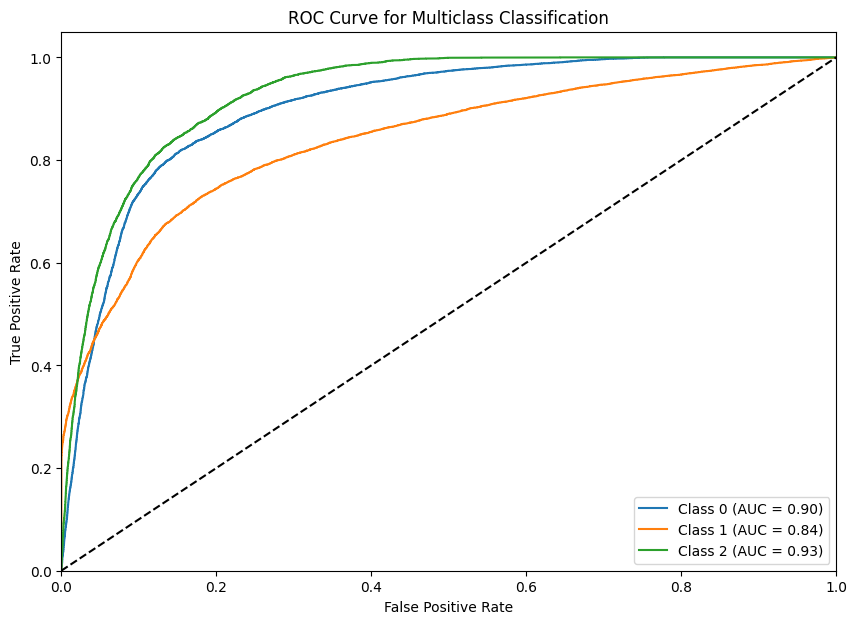

In [ ]:
best_catboost_model = CatBoostClassifier( logging_level='Silent', **cat_best_params)
best_catboost_model.fit(X_train, y_train)
accuracy, cat_y_pred = evaluate_model(best_catboost_model, X_test, y_test)


### 3.2.4  MLP model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(max_iter=1000, random_state=42)

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

best_params,X_train,X_test = model_fit(mlp_model, param_dist,Standardornot=1)


Standardizing
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  47.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  47.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.3min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.3min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  49.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=  57.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=  48.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learn

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.1min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 2.3min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.7min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 2.4min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.2min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 2.9min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 2.4min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 3.5min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 3.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 2.8min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 2.8min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 2.7min
[CV] END activa

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 5.4min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time= 1.6min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time= 1.3min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time= 1.9min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time= 1.4min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time= 1.3min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  47.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  47.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.2min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  54.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time= 1.1min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 5.4min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 5.4min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 5.5min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 5.5min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 6.3min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 5.4min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.1min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 2.7min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.7min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.3min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.0min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 2.9min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 4.0min
[CV] END activation=tanh,

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 4.1min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.5min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 2.0min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.7min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.9min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.7min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.9min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=  47.4s
[CV] END activation=re

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time= 6.0min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.1min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 2.7min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.7min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 2.4min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time= 3.0min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 5.6min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 5.4min
[CV] END activation=ta

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time= 6.0min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=  47.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=  47.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.2min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time= 1.2min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=  49.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  57.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=  58.4s
[CV] END activati

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 4.1min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 3.3min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 3.4min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 3.4min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 3.2min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 3.5min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time= 3.0min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time= 1.4min
[CV] END activatio

d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 4.1min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time= 3.3min
最优参数： {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}
最优准确率： 0.7033571428571428


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


d:\python\envs\env_GPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


准确率: 0.7098
F1-score: 0.7102
Recall: 0.7098

分类报告：
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      8805
           1       0.75      0.75      0.75     15873
           2       0.60      0.62      0.61      5322

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



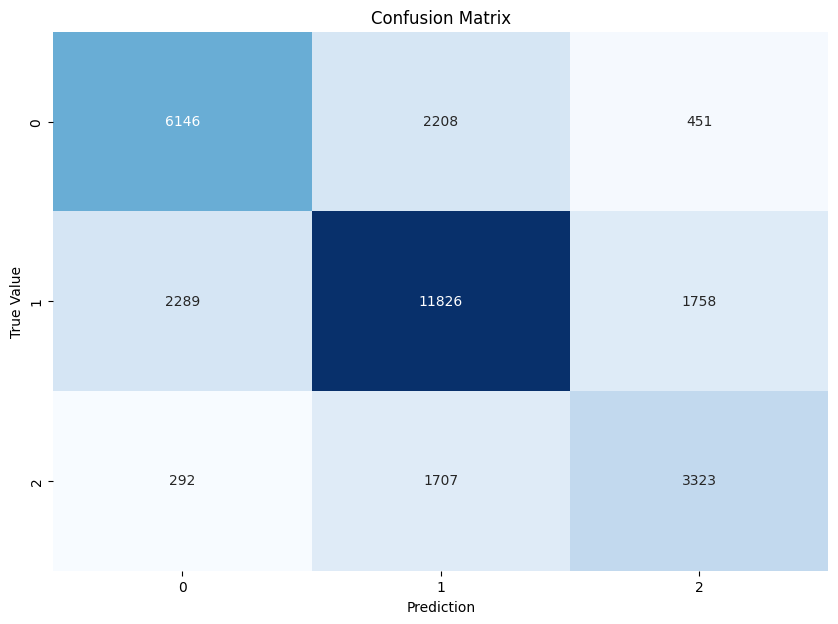

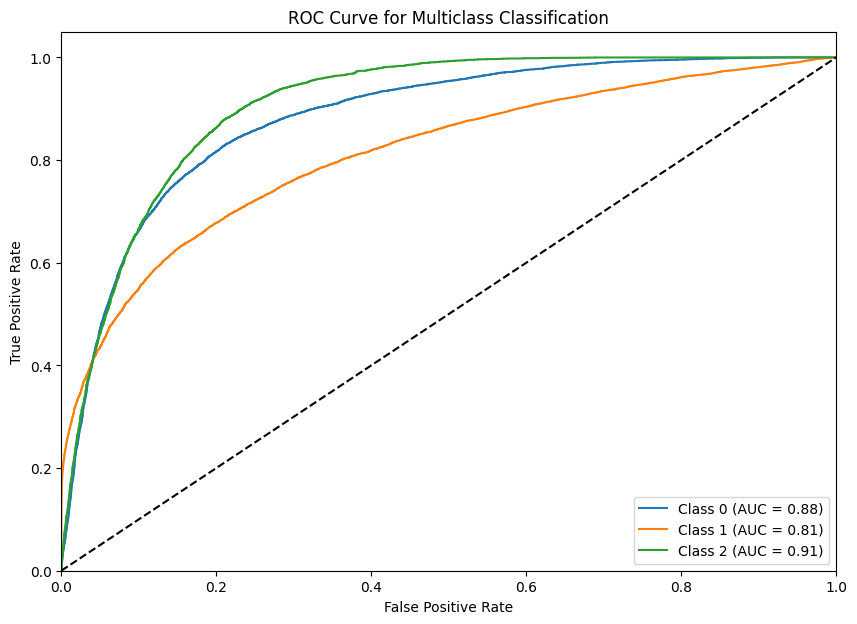

In [ ]:
best_mlp_model = MLPClassifier(**best_params, max_iter=1000, random_state=42)
best_mlp_model.fit(X_train, y_train)
accuracy, y_pred = evaluate_model(best_mlp_model, X_test, y_test)

### 3.2.5  Tabnet model

In [ ]:
#Tabnet-specific parameterization functions
def model_fit_numpy(model,param_dist,Standardornot=0):
    X = X_selected_train.copy()
    y = y_train
    X_test = X_test_origin.copy()

    if Standardornot == 1:
        scaler = StandardScaler()
        print('Standardizing')

        X_scaled = pd.DataFrame(scaler.fit_transform(X[columns_to_process]), columns=columns_to_process, index=X.index)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test[columns_to_process]), columns=columns_to_process, index=X_test.index)

        X = pd.concat([X_scaled, X.drop(columns_to_process, axis=1)], axis=1)
        X_test = pd.concat([X_test_scaled, X_test.drop(columns_to_process, axis=1)], axis=1)

    X = X.values
    X_test = X_test.values
    y = y.values


    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=1, scoring='accuracy', n_jobs=1, verbose=2, random_state=42)

    random_search.fit(X, y)

    best_params = random_search.best_params_
    print("最优参数：", best_params)

    best_accuracy = random_search.best_score_
    print("最优准确率：", best_accuracy)

    return best_params,X,X_test

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch.optim

tabnet_model = TabNetClassifier()

param_dist = {
    'n_d': np.arange(8, 64, 8),
    'n_a': np.arange(8, 64, 8),
    'n_steps': np.arange(3, 10, 1),
    'gamma': np.logspace(-3, 0, 5),
    'lambda_sparse': np.logspace(-4, 0, 5),
    'momentum': np.logspace(-2, 0, 5),
    'clip_value': [0.5, 1.0, 2.0],
    'optimizer_fn': [torch.optim.Adam, torch.optim.SGD],
    'scheduler_params': [{'step_size': 50, 'gamma': 0.9}]
}

best_params,X_train,X_test = model_fit_numpy(tabnet_model, param_dist,Standardornot=1)


d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Standardizing


d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.88869 |  0:00:05s
epoch 1  | loss: 0.71351 |  0:00:10s
epoch 2  | loss: 0.6938  |  0:00:15s
epoch 3  | loss: 0.68172 |  0:00:20s
epoch 4  | loss: 0.6798  |  0:00:25s
epoch 5  | loss: 0.66975 |  0:00:30s
epoch 6  | loss: 0.66615 |  0:00:35s
epoch 7  | loss: 0.66002 |  0:00:40s
epoch 8  | loss: 0.65373 |  0:00:45s
epoch 9  | loss: 0.64644 |  0:00:50s
epoch 10 | loss: 0.63442 |  0:00:55s
epoch 11 | loss: 0.62516 |  0:01:00s
epoch 12 | loss: 0.61491 |  0:01:05s
epoch 13 | loss: 0.60443 |  0:01:09s
epoch 14 | loss: 0.59308 |  0:01:14s
epoch 15 | loss: 0.58145 |  0:01:19s
epoch 16 | loss: 0.56578 |  0:01:24s
epoch 17 | loss: 0.55521 |  0:01:29s
epoch 18 | loss: 0.55147 |  0:01:34s
epoch 19 | loss: 0.53284 |  0:01:39s
epoch 20 | loss: 0.511   |  0:01:44s
epoch 21 | loss: 0.49882 |  0:01:49s
epoch 22 | loss: 0.48367 |  0:01:54s
epoch 23 | loss: 0.46809 |  0:01:59s
epoch 24 | loss: 0.45671 |  0:02:04s
epoch 25 | loss: 0.44386 |  0:02:09s
epoch 26 | loss: 0.43093 |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86179 |  0:00:05s
epoch 1  | loss: 0.69176 |  0:00:10s
epoch 2  | loss: 0.6725  |  0:00:15s
epoch 3  | loss: 0.66197 |  0:00:20s
epoch 4  | loss: 0.65471 |  0:00:25s
epoch 5  | loss: 0.64478 |  0:00:30s
epoch 6  | loss: 0.63794 |  0:00:35s
epoch 7  | loss: 0.62909 |  0:00:40s
epoch 8  | loss: 0.61841 |  0:00:46s
epoch 9  | loss: 0.60826 |  0:00:51s
epoch 10 | loss: 0.59678 |  0:00:56s
epoch 11 | loss: 0.58371 |  0:01:01s
epoch 12 | loss: 0.56786 |  0:01:06s
epoch 13 | loss: 0.55574 |  0:01:11s
epoch 14 | loss: 0.54111 |  0:01:16s
epoch 15 | loss: 0.52739 |  0:01:21s
epoch 16 | loss: 0.51196 |  0:01:26s
epoch 17 | loss: 0.49735 |  0:01:32s
epoch 18 | loss: 0.48272 |  0:01:37s
epoch 19 | loss: 0.46903 |  0:01:42s
epoch 20 | loss: 0.45703 |  0:01:47s
epoch 21 | loss: 0.4381  |  0:01:52s
epoch 22 | loss: 0.4278  |  0:01:57s
epoch 23 | loss: 0.42074 |  0:02:02s
epoch 24 | loss: 0.40947 |  0:02:08s
epoch 25 | loss: 0.41111 |  0:02:13s
epoch 26 | loss: 0.38687 |  0:02:18s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.90393 |  0:00:05s
epoch 1  | loss: 0.70635 |  0:00:10s
epoch 2  | loss: 0.67956 |  0:00:15s
epoch 3  | loss: 0.66851 |  0:00:20s
epoch 4  | loss: 0.66251 |  0:00:25s
epoch 5  | loss: 0.6543  |  0:00:30s
epoch 6  | loss: 0.64831 |  0:00:35s
epoch 7  | loss: 0.64186 |  0:00:41s
epoch 8  | loss: 0.6354  |  0:00:46s
epoch 9  | loss: 0.62501 |  0:00:51s
epoch 10 | loss: 0.6197  |  0:00:56s
epoch 11 | loss: 0.61474 |  0:01:01s
epoch 12 | loss: 0.60145 |  0:01:06s
epoch 13 | loss: 0.58263 |  0:01:11s
epoch 14 | loss: 0.5732  |  0:01:16s
epoch 15 | loss: 0.55533 |  0:01:21s
epoch 16 | loss: 0.54007 |  0:01:26s
epoch 17 | loss: 0.5223  |  0:01:31s
epoch 18 | loss: 0.50983 |  0:01:37s
epoch 19 | loss: 0.49908 |  0:01:42s
epoch 20 | loss: 0.48517 |  0:01:47s
epoch 21 | loss: 0.46744 |  0:01:52s
epoch 22 | loss: 0.45261 |  0:01:57s
epoch 23 | loss: 0.44283 |  0:02:02s
epoch 24 | loss: 0.43167 |  0:02:07s
epoch 25 | loss: 0.41677 |  0:02:12s
epoch 26 | loss: 0.41057 |  0:02:17s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86276 |  0:00:05s
epoch 1  | loss: 0.69551 |  0:00:10s
epoch 2  | loss: 0.67731 |  0:00:15s
epoch 3  | loss: 0.66394 |  0:00:20s
epoch 4  | loss: 0.65389 |  0:00:25s
epoch 5  | loss: 0.64239 |  0:00:30s
epoch 6  | loss: 0.63319 |  0:00:35s
epoch 7  | loss: 0.6248  |  0:00:40s
epoch 8  | loss: 0.61764 |  0:00:45s
epoch 9  | loss: 0.60365 |  0:00:50s
epoch 10 | loss: 0.58801 |  0:00:55s
epoch 11 | loss: 0.57641 |  0:01:00s
epoch 12 | loss: 0.55813 |  0:01:05s
epoch 13 | loss: 0.54505 |  0:01:10s
epoch 14 | loss: 0.53101 |  0:01:15s
epoch 15 | loss: 0.51365 |  0:01:20s
epoch 16 | loss: 0.49792 |  0:01:25s
epoch 17 | loss: 0.4846  |  0:01:30s
epoch 18 | loss: 0.46933 |  0:01:35s
epoch 19 | loss: 0.45304 |  0:01:40s
epoch 20 | loss: 0.4395  |  0:01:45s
epoch 21 | loss: 0.42726 |  0:01:50s
epoch 22 | loss: 0.41348 |  0:01:55s
epoch 23 | loss: 0.4075  |  0:02:00s
epoch 24 | loss: 0.45926 |  0:02:05s
epoch 25 | loss: 0.39636 |  0:02:10s
epoch 26 | loss: 0.37411 |  0:02:15s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86862 |  0:00:05s
epoch 1  | loss: 0.69866 |  0:00:10s
epoch 2  | loss: 0.67923 |  0:00:15s
epoch 3  | loss: 0.67891 |  0:00:20s
epoch 4  | loss: 0.66416 |  0:00:25s
epoch 5  | loss: 0.65574 |  0:00:30s
epoch 6  | loss: 0.65124 |  0:00:35s
epoch 7  | loss: 0.64067 |  0:00:40s
epoch 8  | loss: 0.63489 |  0:00:45s
epoch 9  | loss: 0.62422 |  0:00:50s
epoch 10 | loss: 0.61857 |  0:00:55s
epoch 11 | loss: 0.60777 |  0:01:00s
epoch 12 | loss: 0.59608 |  0:01:05s
epoch 13 | loss: 0.58246 |  0:01:10s
epoch 14 | loss: 0.57052 |  0:01:15s
epoch 15 | loss: 0.55324 |  0:01:20s
epoch 16 | loss: 0.53783 |  0:01:25s
epoch 17 | loss: 0.52525 |  0:01:30s
epoch 18 | loss: 0.51279 |  0:01:35s
epoch 19 | loss: 0.49306 |  0:01:40s
epoch 20 | loss: 0.48002 |  0:01:45s
epoch 21 | loss: 0.46324 |  0:01:50s
epoch 22 | loss: 0.45158 |  0:01:55s
epoch 23 | loss: 0.43511 |  0:02:00s
epoch 24 | loss: 0.424   |  0:02:05s
epoch 25 | loss: 0.41587 |  0:02:10s
epoch 26 | loss: 0.39661 |  0:02:15s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.13507 |  0:00:05s
epoch 1  | loss: 1.80663 |  0:00:10s
epoch 2  | loss: 1.4253  |  0:00:16s
epoch 3  | loss: 1.20777 |  0:00:21s
epoch 4  | loss: 1.08471 |  0:00:26s
epoch 5  | loss: 1.02128 |  0:00:31s
epoch 6  | loss: 0.98164 |  0:00:37s
epoch 7  | loss: 0.95148 |  0:00:42s
epoch 8  | loss: 0.93137 |  0:00:47s
epoch 9  | loss: 0.91255 |  0:00:52s
epoch 10 | loss: 0.90005 |  0:00:58s
epoch 11 | loss: 0.88865 |  0:01:03s
epoch 12 | loss: 0.87624 |  0:01:08s
epoch 13 | loss: 0.87154 |  0:01:13s
epoch 14 | loss: 0.86335 |  0:01:19s
epoch 15 | loss: 0.85753 |  0:01:24s
epoch 16 | loss: 0.8529  |  0:01:29s
epoch 17 | loss: 0.84601 |  0:01:34s
epoch 18 | loss: 0.84174 |  0:01:40s
epoch 19 | loss: 0.83638 |  0:01:45s
epoch 20 | loss: 0.83389 |  0:01:50s
epoch 21 | loss: 0.82996 |  0:01:55s
epoch 22 | loss: 0.82569 |  0:02:00s
epoch 23 | loss: 0.8229  |  0:02:06s
epoch 24 | loss: 0.8202  |  0:02:11s
epoch 25 | loss: 0.81628 |  0:02:16s
epoch 26 | loss: 0.81531 |  0:02:21s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.14816 |  0:00:05s
epoch 1  | loss: 1.80645 |  0:00:10s
epoch 2  | loss: 1.40649 |  0:00:15s
epoch 3  | loss: 1.21526 |  0:00:20s
epoch 4  | loss: 1.10702 |  0:00:25s
epoch 5  | loss: 1.04305 |  0:00:31s
epoch 6  | loss: 1.00482 |  0:00:36s
epoch 7  | loss: 0.96695 |  0:00:41s
epoch 8  | loss: 0.94834 |  0:00:46s
epoch 9  | loss: 0.93031 |  0:00:51s
epoch 10 | loss: 0.91642 |  0:00:56s
epoch 11 | loss: 0.90478 |  0:01:01s
epoch 12 | loss: 0.89361 |  0:01:06s
epoch 13 | loss: 0.88718 |  0:01:12s
epoch 14 | loss: 0.87722 |  0:01:17s
epoch 15 | loss: 0.87073 |  0:01:22s
epoch 16 | loss: 0.86533 |  0:01:27s
epoch 17 | loss: 0.85916 |  0:01:32s
epoch 18 | loss: 0.85365 |  0:01:37s
epoch 19 | loss: 0.84823 |  0:01:42s
epoch 20 | loss: 0.84507 |  0:01:47s
epoch 21 | loss: 0.84281 |  0:01:53s
epoch 22 | loss: 0.83648 |  0:01:58s
epoch 23 | loss: 0.83467 |  0:02:03s
epoch 24 | loss: 0.83155 |  0:02:08s
epoch 25 | loss: 0.82778 |  0:02:13s
epoch 26 | loss: 0.8266  |  0:02:18s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.19225 |  0:00:05s
epoch 1  | loss: 1.81637 |  0:00:11s
epoch 2  | loss: 1.40978 |  0:00:16s
epoch 3  | loss: 1.23096 |  0:00:21s
epoch 4  | loss: 1.12145 |  0:00:27s
epoch 5  | loss: 1.05699 |  0:00:32s
epoch 6  | loss: 1.00639 |  0:00:38s
epoch 7  | loss: 0.97277 |  0:00:43s
epoch 8  | loss: 0.94946 |  0:00:49s
epoch 9  | loss: 0.9272  |  0:00:55s
epoch 10 | loss: 0.91149 |  0:01:01s
epoch 11 | loss: 0.89664 |  0:01:07s
epoch 12 | loss: 0.88636 |  0:01:13s
epoch 13 | loss: 0.87908 |  0:01:19s
epoch 14 | loss: 0.86986 |  0:01:25s
epoch 15 | loss: 0.86085 |  0:01:30s
epoch 16 | loss: 0.85629 |  0:01:37s
epoch 17 | loss: 0.85204 |  0:01:43s
epoch 18 | loss: 0.84446 |  0:01:49s
epoch 19 | loss: 0.84277 |  0:01:55s
epoch 20 | loss: 0.83929 |  0:02:02s
epoch 21 | loss: 0.83684 |  0:02:08s
epoch 22 | loss: 0.8324  |  0:02:14s
epoch 23 | loss: 0.83056 |  0:02:19s
epoch 24 | loss: 0.82569 |  0:02:24s
epoch 25 | loss: 0.82429 |  0:02:29s
epoch 26 | loss: 0.82107 |  0:02:34s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.22334 |  0:00:04s
epoch 1  | loss: 1.82767 |  0:00:09s
epoch 2  | loss: 1.4281  |  0:00:14s
epoch 3  | loss: 1.24205 |  0:00:19s
epoch 4  | loss: 1.12689 |  0:00:24s
epoch 5  | loss: 1.06108 |  0:00:29s
epoch 6  | loss: 1.00725 |  0:00:34s
epoch 7  | loss: 0.97723 |  0:00:39s
epoch 8  | loss: 0.94899 |  0:00:44s
epoch 9  | loss: 0.9259  |  0:00:49s
epoch 10 | loss: 0.90925 |  0:00:53s
epoch 11 | loss: 0.89586 |  0:00:58s
epoch 12 | loss: 0.8873  |  0:01:03s
epoch 13 | loss: 0.87795 |  0:01:08s
epoch 14 | loss: 0.86809 |  0:01:13s
epoch 15 | loss: 0.86024 |  0:01:18s
epoch 16 | loss: 0.85542 |  0:01:22s
epoch 17 | loss: 0.85135 |  0:01:27s
epoch 18 | loss: 0.84447 |  0:01:32s
epoch 19 | loss: 0.84251 |  0:01:37s
epoch 20 | loss: 0.8379  |  0:01:42s
epoch 21 | loss: 0.83646 |  0:01:47s
epoch 22 | loss: 0.83221 |  0:01:52s
epoch 23 | loss: 0.82835 |  0:01:56s
epoch 24 | loss: 0.82549 |  0:02:01s
epoch 25 | loss: 0.82066 |  0:02:06s
epoch 26 | loss: 0.81993 |  0:02:11s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.28291 |  0:00:05s
epoch 1  | loss: 1.84258 |  0:00:11s
epoch 2  | loss: 1.4257  |  0:00:17s
epoch 3  | loss: 1.24146 |  0:00:24s
epoch 4  | loss: 1.13233 |  0:00:30s
epoch 5  | loss: 1.06304 |  0:00:36s
epoch 6  | loss: 1.00828 |  0:00:42s
epoch 7  | loss: 0.97119 |  0:00:48s
epoch 8  | loss: 0.94769 |  0:00:53s
epoch 9  | loss: 0.92378 |  0:00:59s
epoch 10 | loss: 0.91047 |  0:01:05s
epoch 11 | loss: 0.8982  |  0:01:11s
epoch 12 | loss: 0.88709 |  0:01:17s
epoch 13 | loss: 0.8777  |  0:01:23s
epoch 14 | loss: 0.869   |  0:01:28s
epoch 15 | loss: 0.86229 |  0:01:34s
epoch 16 | loss: 0.85716 |  0:01:40s
epoch 17 | loss: 0.85182 |  0:01:46s
epoch 18 | loss: 0.84687 |  0:01:51s
epoch 19 | loss: 0.84426 |  0:01:57s
epoch 20 | loss: 0.83758 |  0:02:03s
epoch 21 | loss: 0.83542 |  0:02:09s
epoch 22 | loss: 0.83235 |  0:02:15s
epoch 23 | loss: 0.82809 |  0:02:20s
epoch 24 | loss: 0.82467 |  0:02:26s
epoch 25 | loss: 0.82037 |  0:02:32s
epoch 26 | loss: 0.81844 |  0:02:38s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.17709 |  0:00:07s
epoch 1  | loss: 0.88792 |  0:00:14s
epoch 2  | loss: 0.82101 |  0:00:21s
epoch 3  | loss: 0.78029 |  0:00:28s
epoch 4  | loss: 0.75555 |  0:00:35s
epoch 5  | loss: 0.74735 |  0:00:42s
epoch 6  | loss: 0.74263 |  0:00:49s
epoch 7  | loss: 0.73548 |  0:00:56s
epoch 8  | loss: 0.73153 |  0:01:03s
epoch 9  | loss: 0.72795 |  0:01:10s
epoch 10 | loss: 0.72622 |  0:01:17s
epoch 11 | loss: 0.72152 |  0:01:24s
epoch 12 | loss: 0.71437 |  0:01:31s
epoch 13 | loss: 0.70784 |  0:01:38s
epoch 14 | loss: 0.70577 |  0:01:45s
epoch 15 | loss: 0.69949 |  0:01:52s
epoch 16 | loss: 0.69665 |  0:01:59s
epoch 17 | loss: 0.69651 |  0:02:06s
epoch 18 | loss: 0.68935 |  0:02:13s
epoch 19 | loss: 0.68004 |  0:02:20s
epoch 20 | loss: 0.67842 |  0:02:27s
epoch 21 | loss: 0.67259 |  0:02:34s
epoch 22 | loss: 0.66203 |  0:02:42s
epoch 23 | loss: 0.65907 |  0:02:49s
epoch 24 | loss: 0.6513  |  0:02:57s
epoch 25 | loss: 0.64104 |  0:03:04s
epoch 26 | loss: 0.63866 |  0:03:11s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.19764 |  0:00:07s
epoch 1  | loss: 0.91045 |  0:00:14s
epoch 2  | loss: 0.83737 |  0:00:22s
epoch 3  | loss: 0.79954 |  0:00:29s
epoch 4  | loss: 0.7812  |  0:00:36s
epoch 5  | loss: 0.7692  |  0:00:44s
epoch 6  | loss: 0.75617 |  0:00:51s
epoch 7  | loss: 0.75032 |  0:00:58s
epoch 8  | loss: 0.74405 |  0:01:06s
epoch 9  | loss: 0.73887 |  0:01:13s
epoch 10 | loss: 0.74386 |  0:01:21s
epoch 11 | loss: 0.73713 |  0:01:28s
epoch 12 | loss: 0.72882 |  0:01:35s
epoch 13 | loss: 0.72517 |  0:01:43s
epoch 14 | loss: 0.71916 |  0:01:50s
epoch 15 | loss: 0.71311 |  0:01:57s
epoch 16 | loss: 0.70774 |  0:02:05s
epoch 17 | loss: 0.70288 |  0:02:12s
epoch 18 | loss: 0.69855 |  0:02:19s
epoch 19 | loss: 0.68996 |  0:02:27s
epoch 20 | loss: 0.68634 |  0:02:34s
epoch 21 | loss: 0.67756 |  0:02:41s
epoch 22 | loss: 0.67995 |  0:02:49s
epoch 23 | loss: 0.68559 |  0:02:56s
epoch 24 | loss: 0.672   |  0:03:04s
epoch 25 | loss: 0.65977 |  0:03:39s
epoch 26 | loss: 0.66442 |  0:04:36s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.18605 |  0:00:13s
epoch 1  | loss: 0.86309 |  0:00:27s
epoch 2  | loss: 0.78707 |  0:00:41s
epoch 3  | loss: 0.74159 |  0:00:58s
epoch 4  | loss: 0.72097 |  0:01:12s
epoch 5  | loss: 0.71462 |  0:01:25s
epoch 6  | loss: 0.70878 |  0:01:39s
epoch 7  | loss: 0.70388 |  0:01:53s
epoch 8  | loss: 0.69969 |  0:02:07s
epoch 9  | loss: 0.69511 |  0:02:21s
epoch 10 | loss: 0.6943  |  0:02:34s
epoch 11 | loss: 0.69164 |  0:02:48s
epoch 12 | loss: 0.68635 |  0:03:02s
epoch 13 | loss: 0.68225 |  0:03:16s
epoch 14 | loss: 0.68161 |  0:03:30s
epoch 15 | loss: 0.67663 |  0:03:43s
epoch 16 | loss: 0.6737  |  0:03:57s
epoch 17 | loss: 0.67012 |  0:04:11s
epoch 18 | loss: 0.6673  |  0:04:25s
epoch 19 | loss: 0.66699 |  0:04:38s
epoch 20 | loss: 0.66783 |  0:04:52s
epoch 21 | loss: 0.66145 |  0:05:07s
epoch 22 | loss: 0.65552 |  0:05:16s
epoch 23 | loss: 0.65219 |  0:05:24s
epoch 24 | loss: 0.64861 |  0:05:33s
epoch 25 | loss: 0.64237 |  0:05:41s
epoch 26 | loss: 0.63859 |  0:05:49s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.18322 |  0:00:07s
epoch 1  | loss: 0.90897 |  0:00:14s
epoch 2  | loss: 0.83685 |  0:00:21s
epoch 3  | loss: 0.79421 |  0:00:29s
epoch 4  | loss: 0.77483 |  0:00:36s
epoch 5  | loss: 0.768   |  0:00:43s
epoch 6  | loss: 0.76017 |  0:00:51s
epoch 7  | loss: 0.75576 |  0:00:58s
epoch 8  | loss: 0.75085 |  0:01:06s
epoch 9  | loss: 0.74485 |  0:01:39s
epoch 10 | loss: 0.74111 |  0:02:40s
epoch 11 | loss: 0.73838 |  0:07:48s
epoch 12 | loss: 0.73377 |  0:09:26s
epoch 13 | loss: 0.72835 |  0:13:23s
epoch 14 | loss: 0.72873 |  0:19:03s
epoch 15 | loss: 0.72151 |  0:24:14s
epoch 16 | loss: 0.72085 |  0:28:43s
epoch 17 | loss: 0.71598 |  0:31:12s
epoch 18 | loss: 0.70873 |  0:31:44s
epoch 19 | loss: 0.7062  |  0:32:07s
epoch 20 | loss: 0.70317 |  0:33:10s
epoch 21 | loss: 0.69898 |  0:34:05s
epoch 22 | loss: 0.69306 |  0:34:19s
epoch 23 | loss: 0.68708 |  0:34:33s
epoch 24 | loss: 0.68311 |  0:34:46s
epoch 25 | loss: 0.67699 |  0:35:30s
epoch 26 | loss: 0.67102 |  0:35:52s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.16347 |  0:00:06s
epoch 1  | loss: 0.88419 |  0:00:14s
epoch 2  | loss: 0.83119 |  0:00:21s
epoch 3  | loss: 0.80746 |  0:00:28s
epoch 4  | loss: 0.7928  |  0:00:35s
epoch 5  | loss: 0.7799  |  0:00:42s
epoch 6  | loss: 0.76284 |  0:00:49s
epoch 7  | loss: 0.75227 |  0:00:56s
epoch 8  | loss: 0.74612 |  0:01:03s
epoch 9  | loss: 0.73955 |  0:01:10s
epoch 10 | loss: 0.73466 |  0:01:17s
epoch 11 | loss: 0.72926 |  0:01:24s
epoch 12 | loss: 0.7288  |  0:01:31s
epoch 13 | loss: 0.72671 |  0:01:39s
epoch 14 | loss: 0.7234  |  0:01:46s
epoch 15 | loss: 0.71393 |  0:01:53s
epoch 16 | loss: 0.70868 |  0:02:00s
epoch 17 | loss: 0.70623 |  0:02:07s
epoch 18 | loss: 0.70027 |  0:02:14s
epoch 19 | loss: 0.69719 |  0:02:21s
epoch 20 | loss: 0.6913  |  0:02:28s
epoch 21 | loss: 0.68855 |  0:02:35s
epoch 22 | loss: 0.67891 |  0:02:42s
epoch 23 | loss: 0.67173 |  0:02:49s
epoch 24 | loss: 0.6703  |  0:02:56s
epoch 25 | loss: 0.66758 |  0:03:04s
epoch 26 | loss: 0.66379 |  0:03:11s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.8333  |  0:00:07s
epoch 1  | loss: 0.70403 |  0:00:14s
epoch 2  | loss: 0.69    |  0:00:21s
epoch 3  | loss: 0.67698 |  0:00:28s
epoch 4  | loss: 0.66884 |  0:00:35s
epoch 5  | loss: 0.66435 |  0:00:42s
epoch 6  | loss: 0.66251 |  0:00:49s
epoch 7  | loss: 0.65949 |  0:00:56s
epoch 8  | loss: 0.65549 |  0:01:03s
epoch 9  | loss: 0.65254 |  0:01:10s
epoch 10 | loss: 0.65188 |  0:01:17s
epoch 11 | loss: 0.64745 |  0:01:24s
epoch 12 | loss: 0.64609 |  0:01:30s
epoch 13 | loss: 0.64154 |  0:01:37s
epoch 14 | loss: 0.63694 |  0:01:44s
epoch 15 | loss: 0.63653 |  0:01:51s
epoch 16 | loss: 0.63202 |  0:01:59s
epoch 17 | loss: 0.62857 |  0:02:06s
epoch 18 | loss: 0.62556 |  0:02:12s
epoch 19 | loss: 0.62323 |  0:02:19s
epoch 20 | loss: 0.61739 |  0:02:26s
epoch 21 | loss: 0.61584 |  0:02:33s
epoch 22 | loss: 0.61167 |  0:02:40s
epoch 23 | loss: 0.60804 |  0:02:47s
epoch 24 | loss: 0.60491 |  0:02:54s
epoch 25 | loss: 0.60157 |  0:03:01s
epoch 26 | loss: 0.59503 |  0:03:08s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82297 |  0:00:07s
epoch 1  | loss: 0.70356 |  0:00:14s
epoch 2  | loss: 0.6895  |  0:00:21s
epoch 3  | loss: 0.67866 |  0:00:29s
epoch 4  | loss: 0.67372 |  0:00:36s
epoch 5  | loss: 0.66873 |  0:00:43s
epoch 6  | loss: 0.66609 |  0:00:50s
epoch 7  | loss: 0.66156 |  0:00:58s
epoch 8  | loss: 0.66318 |  0:01:05s
epoch 9  | loss: 0.65717 |  0:01:12s
epoch 10 | loss: 0.65415 |  0:01:20s
epoch 11 | loss: 0.65324 |  0:01:27s
epoch 12 | loss: 0.65144 |  0:01:34s
epoch 13 | loss: 0.64688 |  0:01:41s
epoch 14 | loss: 0.64578 |  0:01:49s
epoch 15 | loss: 0.64294 |  0:01:56s
epoch 16 | loss: 0.63911 |  0:02:03s
epoch 17 | loss: 0.63838 |  0:02:10s
epoch 18 | loss: 0.63329 |  0:02:17s
epoch 19 | loss: 0.63138 |  0:02:25s
epoch 20 | loss: 0.62632 |  0:02:32s
epoch 21 | loss: 0.62437 |  0:02:39s
epoch 22 | loss: 0.61925 |  0:02:47s
epoch 23 | loss: 0.61604 |  0:02:54s
epoch 24 | loss: 0.61258 |  0:03:01s
epoch 25 | loss: 0.60822 |  0:03:09s
epoch 26 | loss: 0.60602 |  0:03:16s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83613 |  0:00:07s
epoch 1  | loss: 0.70313 |  0:00:14s
epoch 2  | loss: 0.68777 |  0:00:22s
epoch 3  | loss: 0.67523 |  0:00:29s
epoch 4  | loss: 0.66985 |  0:00:36s
epoch 5  | loss: 0.66254 |  0:00:43s
epoch 6  | loss: 0.6579  |  0:00:51s
epoch 7  | loss: 0.65459 |  0:00:58s
epoch 8  | loss: 0.65119 |  0:01:05s
epoch 9  | loss: 0.64697 |  0:01:12s
epoch 10 | loss: 0.64472 |  0:01:19s
epoch 11 | loss: 0.64263 |  0:01:27s
epoch 12 | loss: 0.63776 |  0:01:35s
epoch 13 | loss: 0.63481 |  0:01:43s
epoch 14 | loss: 0.63161 |  0:01:50s
epoch 15 | loss: 0.62931 |  0:01:58s
epoch 16 | loss: 0.6255  |  0:02:05s
epoch 17 | loss: 0.62206 |  0:02:12s
epoch 18 | loss: 0.61931 |  0:02:19s
epoch 19 | loss: 0.61489 |  0:02:26s
epoch 20 | loss: 0.61031 |  0:02:34s
epoch 21 | loss: 0.60896 |  0:02:41s
epoch 22 | loss: 0.61195 |  0:02:48s
epoch 23 | loss: 0.60509 |  0:02:55s
epoch 24 | loss: 0.59912 |  0:03:03s
epoch 25 | loss: 0.59475 |  0:03:10s
epoch 26 | loss: 0.59292 |  0:03:17s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.81084 |  0:00:07s
epoch 1  | loss: 0.6967  |  0:00:14s
epoch 2  | loss: 0.68057 |  0:00:21s
epoch 3  | loss: 0.67031 |  0:00:29s
epoch 4  | loss: 0.66872 |  0:00:36s
epoch 5  | loss: 0.66037 |  0:00:43s
epoch 6  | loss: 0.65633 |  0:00:50s
epoch 7  | loss: 0.65588 |  0:00:58s
epoch 8  | loss: 0.65118 |  0:01:05s
epoch 9  | loss: 0.64762 |  0:01:12s
epoch 10 | loss: 0.64416 |  0:01:19s
epoch 11 | loss: 0.64227 |  0:01:27s
epoch 12 | loss: 0.6391  |  0:01:34s
epoch 13 | loss: 0.63872 |  0:01:41s
epoch 14 | loss: 0.63584 |  0:01:48s
epoch 15 | loss: 0.62907 |  0:01:56s
epoch 16 | loss: 0.6236  |  0:02:03s
epoch 17 | loss: 0.62125 |  0:02:10s
epoch 18 | loss: 0.61799 |  0:02:17s
epoch 19 | loss: 0.61502 |  0:02:24s
epoch 20 | loss: 0.61175 |  0:02:32s
epoch 21 | loss: 0.6063  |  0:02:39s
epoch 22 | loss: 0.60474 |  0:02:46s
epoch 23 | loss: 0.59653 |  0:02:53s
epoch 24 | loss: 0.59534 |  0:03:01s
epoch 25 | loss: 0.59077 |  0:03:08s
epoch 26 | loss: 0.5885  |  0:03:15s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82649 |  0:00:07s
epoch 1  | loss: 0.70111 |  0:00:14s
epoch 2  | loss: 0.68109 |  0:00:21s
epoch 3  | loss: 0.67281 |  0:00:29s
epoch 4  | loss: 0.66912 |  0:00:36s
epoch 5  | loss: 0.6632  |  0:00:43s
epoch 6  | loss: 0.65917 |  0:00:50s
epoch 7  | loss: 0.65633 |  0:00:58s
epoch 8  | loss: 0.65429 |  0:01:05s
epoch 9  | loss: 0.65174 |  0:01:12s
epoch 10 | loss: 0.64887 |  0:01:19s
epoch 11 | loss: 0.64543 |  0:01:27s
epoch 12 | loss: 0.64224 |  0:01:34s
epoch 13 | loss: 0.63935 |  0:01:41s
epoch 14 | loss: 0.63596 |  0:01:48s
epoch 15 | loss: 0.63488 |  0:01:55s
epoch 16 | loss: 0.63001 |  0:02:03s
epoch 17 | loss: 0.62704 |  0:02:10s
epoch 18 | loss: 0.62349 |  0:02:17s
epoch 19 | loss: 0.62168 |  0:02:25s
epoch 20 | loss: 0.61783 |  0:02:32s
epoch 21 | loss: 0.61222 |  0:02:39s
epoch 22 | loss: 0.61185 |  0:02:46s
epoch 23 | loss: 0.60825 |  0:02:54s
epoch 24 | loss: 0.60518 |  0:03:01s
epoch 25 | loss: 0.60242 |  0:03:08s
epoch 26 | loss: 0.59565 |  0:03:15s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 7.20342 |  0:00:06s
epoch 1  | loss: 5.17984 |  0:00:13s
epoch 2  | loss: 4.48997 |  0:00:20s
epoch 3  | loss: 4.24064 |  0:00:26s
epoch 4  | loss: 4.07866 |  0:00:33s
epoch 5  | loss: 3.95659 |  0:00:39s
epoch 6  | loss: 3.84854 |  0:00:46s
epoch 7  | loss: 3.71845 |  0:00:52s
epoch 8  | loss: 3.60496 |  0:00:59s
epoch 9  | loss: 3.4915  |  0:01:05s
epoch 10 | loss: 3.36347 |  0:01:12s
epoch 11 | loss: 3.21867 |  0:01:19s
epoch 12 | loss: 3.06521 |  0:01:25s
epoch 13 | loss: 2.91832 |  0:01:32s
epoch 14 | loss: 2.78132 |  0:01:39s
epoch 15 | loss: 2.6491  |  0:01:45s
epoch 16 | loss: 2.522   |  0:01:51s
epoch 17 | loss: 2.41078 |  0:01:58s
epoch 18 | loss: 2.3152  |  0:02:05s
epoch 19 | loss: 2.23103 |  0:02:11s
epoch 20 | loss: 2.16942 |  0:02:18s
epoch 21 | loss: 2.121   |  0:02:24s
epoch 22 | loss: 2.08094 |  0:02:31s
epoch 23 | loss: 2.03595 |  0:02:37s
epoch 24 | loss: 1.97006 |  0:02:44s
epoch 25 | loss: 1.88967 |  0:02:50s
epoch 26 | loss: 1.75681 |  0:02:57s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 7.22512 |  0:00:06s
epoch 1  | loss: 5.1507  |  0:00:13s
epoch 2  | loss: 4.44001 |  0:00:19s
epoch 3  | loss: 4.20768 |  0:00:26s
epoch 4  | loss: 4.05083 |  0:00:33s
epoch 5  | loss: 3.92407 |  0:00:39s
epoch 6  | loss: 3.81603 |  0:00:46s
epoch 7  | loss: 3.72043 |  0:00:52s
epoch 8  | loss: 3.61304 |  0:00:59s
epoch 9  | loss: 3.50323 |  0:01:05s
epoch 10 | loss: 3.37072 |  0:01:12s
epoch 11 | loss: 3.23342 |  0:01:19s
epoch 12 | loss: 3.0733  |  0:01:25s
epoch 13 | loss: 2.93279 |  0:01:32s
epoch 14 | loss: 2.80409 |  0:01:38s
epoch 15 | loss: 2.68552 |  0:01:45s
epoch 16 | loss: 2.5826  |  0:01:51s
epoch 17 | loss: 2.48946 |  0:01:58s
epoch 18 | loss: 2.39815 |  0:02:04s
epoch 19 | loss: 2.30204 |  0:02:11s
epoch 20 | loss: 2.24628 |  0:02:17s
epoch 21 | loss: 2.20039 |  0:02:24s
epoch 22 | loss: 2.157   |  0:02:31s
epoch 23 | loss: 2.11993 |  0:02:37s
epoch 24 | loss: 2.08414 |  0:02:44s
epoch 25 | loss: 2.05687 |  0:02:50s
epoch 26 | loss: 2.02495 |  0:02:57s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 7.21887 |  0:00:06s
epoch 1  | loss: 5.15079 |  0:00:13s
epoch 2  | loss: 4.45646 |  0:00:19s
epoch 3  | loss: 4.1908  |  0:00:26s
epoch 4  | loss: 4.04239 |  0:00:33s
epoch 5  | loss: 3.94133 |  0:00:39s
epoch 6  | loss: 3.84192 |  0:00:46s
epoch 7  | loss: 3.74906 |  0:00:52s
epoch 8  | loss: 3.66083 |  0:00:59s
epoch 9  | loss: 3.56058 |  0:01:06s
epoch 10 | loss: 3.43784 |  0:01:12s
epoch 11 | loss: 3.29431 |  0:01:19s
epoch 12 | loss: 3.149   |  0:01:25s
epoch 13 | loss: 3.01148 |  0:01:32s
epoch 14 | loss: 2.86965 |  0:01:38s
epoch 15 | loss: 2.73397 |  0:01:45s
epoch 16 | loss: 2.60815 |  0:01:51s
epoch 17 | loss: 2.49771 |  0:01:58s
epoch 18 | loss: 2.4021  |  0:02:04s
epoch 19 | loss: 2.31222 |  0:02:11s
epoch 20 | loss: 2.23511 |  0:02:17s
epoch 21 | loss: 2.17051 |  0:02:24s
epoch 22 | loss: 2.10399 |  0:02:30s
epoch 23 | loss: 2.0613  |  0:02:37s
epoch 24 | loss: 2.02734 |  0:02:43s
epoch 25 | loss: 1.99618 |  0:02:50s
epoch 26 | loss: 1.96746 |  0:02:57s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 7.04755 |  0:00:06s
epoch 1  | loss: 5.03675 |  0:00:13s
epoch 2  | loss: 4.39695 |  0:00:19s
epoch 3  | loss: 4.17751 |  0:00:26s
epoch 4  | loss: 4.04184 |  0:00:33s
epoch 5  | loss: 3.93522 |  0:00:39s
epoch 6  | loss: 3.85334 |  0:00:46s
epoch 7  | loss: 3.77134 |  0:00:52s
epoch 8  | loss: 3.68724 |  0:00:59s
epoch 9  | loss: 3.59533 |  0:01:05s
epoch 10 | loss: 3.50815 |  0:01:12s
epoch 11 | loss: 3.41573 |  0:01:19s
epoch 12 | loss: 3.27141 |  0:01:25s
epoch 13 | loss: 3.09634 |  0:01:32s
epoch 14 | loss: 2.96896 |  0:01:38s
epoch 15 | loss: 2.81186 |  0:01:45s
epoch 16 | loss: 2.59541 |  0:01:52s
epoch 17 | loss: 2.39199 |  0:01:58s
epoch 18 | loss: 2.21234 |  0:02:05s
epoch 19 | loss: 2.06685 |  0:02:11s
epoch 20 | loss: 1.92993 |  0:02:18s
epoch 21 | loss: 1.8141  |  0:02:24s
epoch 22 | loss: 1.71694 |  0:02:31s
epoch 23 | loss: 1.63829 |  0:02:38s
epoch 24 | loss: 1.5623  |  0:02:44s
epoch 25 | loss: 1.50666 |  0:02:51s
epoch 26 | loss: 1.4625  |  0:02:57s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 7.02684 |  0:00:06s
epoch 1  | loss: 4.98039 |  0:00:13s
epoch 2  | loss: 4.36343 |  0:00:19s
epoch 3  | loss: 4.1376  |  0:00:26s
epoch 4  | loss: 3.98671 |  0:00:32s
epoch 5  | loss: 3.8728  |  0:00:39s
epoch 6  | loss: 3.76963 |  0:00:46s
epoch 7  | loss: 3.66255 |  0:00:52s
epoch 8  | loss: 3.56221 |  0:00:59s
epoch 9  | loss: 3.4349  |  0:01:06s
epoch 10 | loss: 3.29268 |  0:01:12s
epoch 11 | loss: 3.15068 |  0:01:19s
epoch 12 | loss: 3.01298 |  0:01:25s
epoch 13 | loss: 2.88145 |  0:01:32s
epoch 14 | loss: 2.75643 |  0:01:38s
epoch 15 | loss: 2.63915 |  0:01:45s
epoch 16 | loss: 2.53627 |  0:01:51s
epoch 17 | loss: 2.44614 |  0:01:58s
epoch 18 | loss: 2.31222 |  0:02:04s
epoch 19 | loss: 2.19993 |  0:02:11s
epoch 20 | loss: 2.1304  |  0:02:17s
epoch 21 | loss: 2.06778 |  0:02:24s
epoch 22 | loss: 2.01318 |  0:02:30s
epoch 23 | loss: 1.97223 |  0:02:37s
epoch 24 | loss: 1.93114 |  0:02:43s
epoch 25 | loss: 1.89043 |  0:02:50s
epoch 26 | loss: 1.85897 |  0:02:56s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80882 |  0:00:04s
epoch 1  | loss: 0.72553 |  0:00:09s
epoch 2  | loss: 0.71003 |  0:00:14s
epoch 3  | loss: 0.69444 |  0:00:19s
epoch 4  | loss: 0.68408 |  0:00:24s
epoch 5  | loss: 0.67697 |  0:00:29s
epoch 6  | loss: 0.67069 |  0:00:34s
epoch 7  | loss: 0.66274 |  0:00:39s
epoch 8  | loss: 0.65596 |  0:00:44s
epoch 9  | loss: 0.65198 |  0:00:49s
epoch 10 | loss: 0.64475 |  0:00:54s
epoch 11 | loss: 0.63621 |  0:00:59s
epoch 12 | loss: 0.62446 |  0:01:04s
epoch 13 | loss: 0.61924 |  0:01:09s
epoch 14 | loss: 0.60694 |  0:01:14s
epoch 15 | loss: 0.59842 |  0:01:19s
epoch 16 | loss: 0.5875  |  0:01:24s
epoch 17 | loss: 0.57931 |  0:01:29s
epoch 18 | loss: 0.56848 |  0:01:33s
epoch 19 | loss: 0.56003 |  0:01:38s
epoch 20 | loss: 0.54748 |  0:01:44s
epoch 21 | loss: 0.53673 |  0:01:49s
epoch 22 | loss: 0.52446 |  0:01:53s
epoch 23 | loss: 0.5122  |  0:01:58s
epoch 24 | loss: 0.50408 |  0:02:03s
epoch 25 | loss: 0.49932 |  0:02:08s
epoch 26 | loss: 0.48415 |  0:02:13s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.81059 |  0:00:04s
epoch 1  | loss: 0.71008 |  0:00:09s
epoch 2  | loss: 0.6928  |  0:00:14s
epoch 3  | loss: 0.681   |  0:00:20s
epoch 4  | loss: 0.67418 |  0:00:25s
epoch 5  | loss: 0.66753 |  0:00:29s
epoch 6  | loss: 0.66152 |  0:00:34s
epoch 7  | loss: 0.65275 |  0:00:39s
epoch 8  | loss: 0.64672 |  0:00:44s
epoch 9  | loss: 0.64224 |  0:00:49s
epoch 10 | loss: 0.63406 |  0:00:54s
epoch 11 | loss: 0.62658 |  0:00:59s
epoch 12 | loss: 0.61667 |  0:01:04s
epoch 13 | loss: 0.60782 |  0:01:09s
epoch 14 | loss: 0.60797 |  0:01:14s
epoch 15 | loss: 0.59098 |  0:01:19s
epoch 16 | loss: 0.58244 |  0:01:23s
epoch 17 | loss: 0.57034 |  0:01:28s
epoch 18 | loss: 0.55899 |  0:01:33s
epoch 19 | loss: 0.55585 |  0:01:38s
epoch 20 | loss: 0.54429 |  0:01:43s
epoch 21 | loss: 0.52904 |  0:01:48s
epoch 22 | loss: 0.51732 |  0:01:53s
epoch 23 | loss: 0.50831 |  0:01:58s
epoch 24 | loss: 0.50045 |  0:02:03s
epoch 25 | loss: 0.49294 |  0:02:08s
epoch 26 | loss: 0.4931  |  0:02:13s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80192 |  0:00:05s
epoch 1  | loss: 0.71483 |  0:00:10s
epoch 2  | loss: 0.69641 |  0:00:14s
epoch 3  | loss: 0.68276 |  0:00:19s
epoch 4  | loss: 0.6722  |  0:00:24s
epoch 5  | loss: 0.66339 |  0:00:29s
epoch 6  | loss: 0.66249 |  0:00:34s
epoch 7  | loss: 0.65467 |  0:00:39s
epoch 8  | loss: 0.64605 |  0:00:44s
epoch 9  | loss: 0.63892 |  0:00:49s
epoch 10 | loss: 0.63059 |  0:00:54s
epoch 11 | loss: 0.62362 |  0:00:59s
epoch 12 | loss: 0.61396 |  0:01:04s
epoch 13 | loss: 0.60605 |  0:01:09s
epoch 14 | loss: 0.59589 |  0:01:14s
epoch 15 | loss: 0.58236 |  0:01:19s
epoch 16 | loss: 0.57766 |  0:01:24s
epoch 17 | loss: 0.56343 |  0:01:29s
epoch 18 | loss: 0.55449 |  0:01:34s
epoch 19 | loss: 0.54564 |  0:01:39s
epoch 20 | loss: 0.53015 |  0:01:44s
epoch 21 | loss: 0.52775 |  0:01:49s
epoch 22 | loss: 0.53733 |  0:01:54s
epoch 23 | loss: 0.51879 |  0:01:59s
epoch 24 | loss: 0.4959  |  0:02:03s
epoch 25 | loss: 0.48916 |  0:02:08s
epoch 26 | loss: 0.47917 |  0:02:13s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.8091  |  0:00:04s
epoch 1  | loss: 0.72008 |  0:00:09s
epoch 2  | loss: 0.69606 |  0:00:14s
epoch 3  | loss: 0.6823  |  0:00:19s
epoch 4  | loss: 0.675   |  0:00:24s
epoch 5  | loss: 0.66713 |  0:00:29s
epoch 6  | loss: 0.66297 |  0:00:34s
epoch 7  | loss: 0.65468 |  0:00:39s
epoch 8  | loss: 0.64929 |  0:00:44s
epoch 9  | loss: 0.64185 |  0:00:49s
epoch 10 | loss: 0.63242 |  0:00:54s
epoch 11 | loss: 0.62682 |  0:00:59s
epoch 12 | loss: 0.61628 |  0:01:04s
epoch 13 | loss: 0.60621 |  0:01:09s
epoch 14 | loss: 0.59718 |  0:01:14s
epoch 15 | loss: 0.58736 |  0:01:19s
epoch 16 | loss: 0.57729 |  0:01:24s
epoch 17 | loss: 0.57198 |  0:01:29s
epoch 18 | loss: 0.56302 |  0:01:34s
epoch 19 | loss: 0.55095 |  0:01:39s
epoch 20 | loss: 0.53553 |  0:01:44s
epoch 21 | loss: 0.53074 |  0:01:48s
epoch 22 | loss: 0.51562 |  0:01:53s
epoch 23 | loss: 0.50773 |  0:01:58s
epoch 24 | loss: 0.49261 |  0:02:04s
epoch 25 | loss: 0.49163 |  0:02:09s
epoch 26 | loss: 0.47845 |  0:02:13s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80265 |  0:00:04s
epoch 1  | loss: 0.71827 |  0:00:09s
epoch 2  | loss: 0.70218 |  0:00:14s
epoch 3  | loss: 0.69138 |  0:00:19s
epoch 4  | loss: 0.6829  |  0:00:24s
epoch 5  | loss: 0.67336 |  0:00:29s
epoch 6  | loss: 0.66764 |  0:00:34s
epoch 7  | loss: 0.66192 |  0:00:39s
epoch 8  | loss: 0.65529 |  0:00:44s
epoch 9  | loss: 0.65071 |  0:00:49s
epoch 10 | loss: 0.6445  |  0:00:54s
epoch 11 | loss: 0.63766 |  0:00:59s
epoch 12 | loss: 0.6291  |  0:01:04s
epoch 13 | loss: 0.62446 |  0:01:09s
epoch 14 | loss: 0.61406 |  0:01:14s
epoch 15 | loss: 0.60539 |  0:01:18s
epoch 16 | loss: 0.59958 |  0:01:23s
epoch 17 | loss: 0.59161 |  0:01:28s
epoch 18 | loss: 0.5801  |  0:01:33s
epoch 19 | loss: 0.57196 |  0:01:38s
epoch 20 | loss: 0.55783 |  0:01:43s
epoch 21 | loss: 0.54701 |  0:01:48s
epoch 22 | loss: 0.53961 |  0:01:53s
epoch 23 | loss: 0.53186 |  0:01:58s
epoch 24 | loss: 0.52976 |  0:02:03s
epoch 25 | loss: 0.51713 |  0:02:08s
epoch 26 | loss: 0.50482 |  0:02:13s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.854   |  0:00:05s
epoch 1  | loss: 0.71424 |  0:00:11s
epoch 2  | loss: 0.69136 |  0:00:17s
epoch 3  | loss: 0.67491 |  0:00:22s
epoch 4  | loss: 0.66621 |  0:00:28s
epoch 5  | loss: 0.65831 |  0:00:34s
epoch 6  | loss: 0.65761 |  0:00:40s
epoch 7  | loss: 0.64921 |  0:00:46s
epoch 8  | loss: 0.64492 |  0:00:51s
epoch 9  | loss: 0.64    |  0:00:57s
epoch 10 | loss: 0.63669 |  0:01:03s
epoch 11 | loss: 0.63244 |  0:01:09s
epoch 12 | loss: 0.62722 |  0:01:14s
epoch 13 | loss: 0.62087 |  0:01:20s
epoch 14 | loss: 0.61929 |  0:01:26s
epoch 15 | loss: 0.61479 |  0:01:32s
epoch 16 | loss: 0.6101  |  0:01:37s
epoch 17 | loss: 0.60149 |  0:01:43s
epoch 18 | loss: 0.59609 |  0:01:49s
epoch 19 | loss: 0.59208 |  0:01:55s
epoch 20 | loss: 0.59028 |  0:02:00s
epoch 21 | loss: 0.58395 |  0:02:06s
epoch 22 | loss: 0.57713 |  0:02:12s
epoch 23 | loss: 0.56877 |  0:02:18s
epoch 24 | loss: 0.56737 |  0:02:24s
epoch 25 | loss: 0.56289 |  0:02:30s
epoch 26 | loss: 0.56227 |  0:02:35s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84782 |  0:00:05s
epoch 1  | loss: 0.70157 |  0:00:11s
epoch 2  | loss: 0.68424 |  0:00:17s
epoch 3  | loss: 0.67119 |  0:00:22s
epoch 4  | loss: 0.66542 |  0:00:28s
epoch 5  | loss: 0.65811 |  0:00:34s
epoch 6  | loss: 0.6529  |  0:00:40s
epoch 7  | loss: 0.64805 |  0:00:46s
epoch 8  | loss: 0.64204 |  0:00:51s
epoch 9  | loss: 0.63713 |  0:00:57s
epoch 10 | loss: 0.63475 |  0:01:03s
epoch 11 | loss: 0.63177 |  0:01:09s
epoch 12 | loss: 0.62403 |  0:01:15s
epoch 13 | loss: 0.61945 |  0:01:20s
epoch 14 | loss: 0.61539 |  0:01:26s
epoch 15 | loss: 0.60988 |  0:01:32s
epoch 16 | loss: 0.61653 |  0:01:37s
epoch 17 | loss: 0.61253 |  0:01:43s
epoch 18 | loss: 0.60076 |  0:01:49s
epoch 19 | loss: 0.58957 |  0:01:55s
epoch 20 | loss: 0.5851  |  0:02:01s
epoch 21 | loss: 0.58256 |  0:02:06s
epoch 22 | loss: 0.57338 |  0:02:12s
epoch 23 | loss: 0.56679 |  0:02:18s
epoch 24 | loss: 0.56252 |  0:02:23s
epoch 25 | loss: 0.55247 |  0:02:29s
epoch 26 | loss: 0.55107 |  0:02:35s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85896 |  0:00:05s
epoch 1  | loss: 0.71629 |  0:00:11s
epoch 2  | loss: 0.69097 |  0:00:17s
epoch 3  | loss: 0.67436 |  0:00:22s
epoch 4  | loss: 0.66672 |  0:00:28s
epoch 5  | loss: 0.65957 |  0:00:34s
epoch 6  | loss: 0.65634 |  0:00:40s
epoch 7  | loss: 0.65113 |  0:00:45s
epoch 8  | loss: 0.64808 |  0:00:51s
epoch 9  | loss: 0.64465 |  0:00:57s
epoch 10 | loss: 0.63955 |  0:01:03s
epoch 11 | loss: 0.63592 |  0:01:08s
epoch 12 | loss: 0.63343 |  0:01:15s
epoch 13 | loss: 0.62912 |  0:01:21s
epoch 14 | loss: 0.62824 |  0:01:27s
epoch 15 | loss: 0.62293 |  0:01:33s
epoch 16 | loss: 0.6205  |  0:01:39s
epoch 17 | loss: 0.61272 |  0:01:44s
epoch 18 | loss: 0.60652 |  0:01:50s
epoch 19 | loss: 0.60367 |  0:01:56s
epoch 20 | loss: 0.6006  |  0:02:01s
epoch 21 | loss: 0.59169 |  0:02:07s
epoch 22 | loss: 0.58974 |  0:02:13s
epoch 23 | loss: 0.58264 |  0:02:18s
epoch 24 | loss: 0.57986 |  0:02:24s
epoch 25 | loss: 0.57321 |  0:02:30s
epoch 26 | loss: 0.56917 |  0:02:36s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.86635 |  0:00:05s
epoch 1  | loss: 0.73029 |  0:00:11s
epoch 2  | loss: 0.70617 |  0:00:17s
epoch 3  | loss: 0.69242 |  0:00:22s
epoch 4  | loss: 0.68019 |  0:00:28s
epoch 5  | loss: 0.6745  |  0:00:34s
epoch 6  | loss: 0.66886 |  0:00:40s
epoch 7  | loss: 0.66159 |  0:00:45s
epoch 8  | loss: 0.66069 |  0:00:51s
epoch 9  | loss: 0.654   |  0:00:57s
epoch 10 | loss: 0.64964 |  0:01:02s
epoch 11 | loss: 0.64744 |  0:01:08s
epoch 12 | loss: 0.64311 |  0:01:14s
epoch 13 | loss: 0.64163 |  0:01:20s
epoch 14 | loss: 0.64058 |  0:01:25s
epoch 15 | loss: 0.63449 |  0:01:31s
epoch 16 | loss: 0.63061 |  0:01:37s
epoch 17 | loss: 0.62644 |  0:01:42s
epoch 18 | loss: 0.62401 |  0:01:48s
epoch 19 | loss: 0.62143 |  0:01:54s
epoch 20 | loss: 0.6151  |  0:02:00s
epoch 21 | loss: 0.60777 |  0:02:06s
epoch 22 | loss: 0.6053  |  0:02:11s
epoch 23 | loss: 0.59795 |  0:02:17s
epoch 24 | loss: 0.59291 |  0:02:23s
epoch 25 | loss: 0.58591 |  0:02:29s
epoch 26 | loss: 0.58244 |  0:02:34s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84711 |  0:00:05s
epoch 1  | loss: 0.70415 |  0:00:11s
epoch 2  | loss: 0.68176 |  0:00:17s
epoch 3  | loss: 0.66994 |  0:00:22s
epoch 4  | loss: 0.66312 |  0:00:28s
epoch 5  | loss: 0.65782 |  0:00:34s
epoch 6  | loss: 0.65076 |  0:00:40s
epoch 7  | loss: 0.6467  |  0:00:45s
epoch 8  | loss: 0.64317 |  0:00:51s
epoch 9  | loss: 0.63905 |  0:00:57s
epoch 10 | loss: 0.63448 |  0:01:02s
epoch 11 | loss: 0.62893 |  0:01:08s
epoch 12 | loss: 0.62482 |  0:01:14s
epoch 13 | loss: 0.61926 |  0:01:20s
epoch 14 | loss: 0.61562 |  0:01:26s
epoch 15 | loss: 0.60844 |  0:01:31s
epoch 16 | loss: 0.60516 |  0:01:37s
epoch 17 | loss: 0.59656 |  0:01:43s
epoch 18 | loss: 0.59347 |  0:01:48s
epoch 19 | loss: 0.58749 |  0:01:54s
epoch 20 | loss: 0.58244 |  0:02:00s
epoch 21 | loss: 0.57629 |  0:02:06s
epoch 22 | loss: 0.56785 |  0:02:11s
epoch 23 | loss: 0.56302 |  0:02:17s
epoch 24 | loss: 0.56267 |  0:02:23s
epoch 25 | loss: 0.55553 |  0:02:28s
epoch 26 | loss: 0.54861 |  0:02:34s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.90486 |  0:00:05s
epoch 1  | loss: 0.7073  |  0:00:11s
epoch 2  | loss: 0.69012 |  0:00:17s
epoch 3  | loss: 0.68168 |  0:00:22s
epoch 4  | loss: 0.67408 |  0:00:28s
epoch 5  | loss: 0.66986 |  0:00:34s
epoch 6  | loss: 0.66612 |  0:00:41s
epoch 7  | loss: 0.66249 |  0:00:47s
epoch 8  | loss: 0.65892 |  0:00:52s
epoch 9  | loss: 0.65632 |  0:00:58s
epoch 10 | loss: 0.65546 |  0:01:04s
epoch 11 | loss: 0.65231 |  0:01:10s
epoch 12 | loss: 0.64962 |  0:01:15s
epoch 13 | loss: 0.65109 |  0:01:21s
epoch 14 | loss: 0.65139 |  0:01:27s
epoch 15 | loss: 0.64864 |  0:01:32s
epoch 16 | loss: 0.64698 |  0:01:38s
epoch 17 | loss: 0.64313 |  0:01:44s
epoch 18 | loss: 0.64074 |  0:01:49s
epoch 19 | loss: 0.63885 |  0:01:55s
epoch 20 | loss: 0.63823 |  0:02:01s
epoch 21 | loss: 0.63803 |  0:02:06s
epoch 22 | loss: 0.63552 |  0:02:12s
epoch 23 | loss: 0.63467 |  0:02:18s
epoch 24 | loss: 0.63295 |  0:02:24s
epoch 25 | loss: 0.6313  |  0:02:29s
epoch 26 | loss: 0.62854 |  0:02:35s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.90201 |  0:00:05s
epoch 1  | loss: 0.71289 |  0:00:11s
epoch 2  | loss: 0.69046 |  0:00:17s
epoch 3  | loss: 0.68106 |  0:00:22s
epoch 4  | loss: 0.67198 |  0:00:28s
epoch 5  | loss: 0.66911 |  0:00:34s
epoch 6  | loss: 0.66485 |  0:00:39s
epoch 7  | loss: 0.66112 |  0:00:45s
epoch 8  | loss: 0.65829 |  0:00:51s
epoch 9  | loss: 0.65575 |  0:00:56s
epoch 10 | loss: 0.65439 |  0:01:02s
epoch 11 | loss: 0.65201 |  0:01:08s
epoch 12 | loss: 0.65215 |  0:01:13s
epoch 13 | loss: 0.65024 |  0:01:19s
epoch 14 | loss: 0.6466  |  0:01:25s
epoch 15 | loss: 0.64616 |  0:01:30s
epoch 16 | loss: 0.64584 |  0:01:36s
epoch 17 | loss: 0.64422 |  0:01:42s
epoch 18 | loss: 0.64301 |  0:01:48s
epoch 19 | loss: 0.63932 |  0:01:53s
epoch 20 | loss: 0.64019 |  0:01:59s
epoch 21 | loss: 0.63989 |  0:02:05s
epoch 22 | loss: 0.63497 |  0:02:10s
epoch 23 | loss: 0.63405 |  0:02:16s
epoch 24 | loss: 0.63136 |  0:02:22s
epoch 25 | loss: 0.62905 |  0:02:28s
epoch 26 | loss: 0.62706 |  0:02:33s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.9113  |  0:00:05s
epoch 1  | loss: 0.71748 |  0:00:11s
epoch 2  | loss: 0.68802 |  0:00:17s
epoch 3  | loss: 0.67626 |  0:00:22s
epoch 4  | loss: 0.67036 |  0:00:28s
epoch 5  | loss: 0.66557 |  0:00:34s
epoch 6  | loss: 0.66108 |  0:00:39s
epoch 7  | loss: 0.65771 |  0:00:45s
epoch 8  | loss: 0.6554  |  0:00:51s
epoch 9  | loss: 0.65293 |  0:00:56s
epoch 10 | loss: 0.65051 |  0:01:02s
epoch 11 | loss: 0.64869 |  0:01:08s
epoch 12 | loss: 0.64653 |  0:01:13s
epoch 13 | loss: 0.64522 |  0:01:19s
epoch 14 | loss: 0.64306 |  0:01:25s
epoch 15 | loss: 0.65719 |  0:01:30s
epoch 16 | loss: 0.64894 |  0:01:36s
epoch 17 | loss: 0.64257 |  0:01:42s
epoch 18 | loss: 0.64014 |  0:01:47s
epoch 19 | loss: 0.63762 |  0:01:53s
epoch 20 | loss: 0.63595 |  0:01:59s
epoch 21 | loss: 0.63549 |  0:02:04s
epoch 22 | loss: 0.63261 |  0:02:10s
epoch 23 | loss: 0.63286 |  0:02:16s
epoch 24 | loss: 0.62853 |  0:02:21s
epoch 25 | loss: 0.62712 |  0:02:27s
epoch 26 | loss: 0.6257  |  0:02:33s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.89931 |  0:00:05s
epoch 1  | loss: 0.70141 |  0:00:11s
epoch 2  | loss: 0.67983 |  0:00:17s
epoch 3  | loss: 0.67056 |  0:00:23s
epoch 4  | loss: 0.66426 |  0:00:28s
epoch 5  | loss: 0.66304 |  0:00:34s
epoch 6  | loss: 0.65993 |  0:00:39s
epoch 7  | loss: 0.65513 |  0:00:45s
epoch 8  | loss: 0.65316 |  0:00:51s
epoch 9  | loss: 0.65097 |  0:00:57s
epoch 10 | loss: 0.65105 |  0:01:02s
epoch 11 | loss: 0.64884 |  0:01:08s
epoch 12 | loss: 0.64804 |  0:01:13s
epoch 13 | loss: 0.64597 |  0:01:19s
epoch 14 | loss: 0.64348 |  0:01:25s
epoch 15 | loss: 0.64404 |  0:01:30s
epoch 16 | loss: 0.64245 |  0:01:36s
epoch 17 | loss: 0.6393  |  0:01:42s
epoch 18 | loss: 0.63944 |  0:01:47s
epoch 19 | loss: 0.63615 |  0:01:53s
epoch 20 | loss: 0.63478 |  0:01:59s
epoch 21 | loss: 0.63431 |  0:02:04s
epoch 22 | loss: 0.63205 |  0:02:10s
epoch 23 | loss: 0.63167 |  0:02:16s
epoch 24 | loss: 0.62914 |  0:02:21s
epoch 25 | loss: 0.62563 |  0:02:27s
epoch 26 | loss: 0.62481 |  0:02:33s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.90735 |  0:00:05s
epoch 1  | loss: 0.70401 |  0:00:11s
epoch 2  | loss: 0.68457 |  0:00:17s
epoch 3  | loss: 0.67349 |  0:00:22s
epoch 4  | loss: 0.66704 |  0:00:28s
epoch 5  | loss: 0.66357 |  0:00:34s
epoch 6  | loss: 0.6598  |  0:00:40s
epoch 7  | loss: 0.65575 |  0:00:45s
epoch 8  | loss: 0.65287 |  0:00:51s
epoch 9  | loss: 0.65081 |  0:00:57s
epoch 10 | loss: 0.64843 |  0:01:03s
epoch 11 | loss: 0.64816 |  0:01:08s
epoch 12 | loss: 0.64558 |  0:01:14s
epoch 13 | loss: 0.64228 |  0:01:19s
epoch 14 | loss: 0.64295 |  0:01:25s
epoch 15 | loss: 0.64164 |  0:01:31s
epoch 16 | loss: 0.63826 |  0:01:37s
epoch 17 | loss: 0.63626 |  0:01:42s
epoch 18 | loss: 0.63581 |  0:01:48s
epoch 19 | loss: 0.6329  |  0:01:54s
epoch 20 | loss: 0.63252 |  0:01:59s
epoch 21 | loss: 0.63097 |  0:02:05s
epoch 22 | loss: 0.62748 |  0:02:11s
epoch 23 | loss: 0.62823 |  0:02:16s
epoch 24 | loss: 0.62591 |  0:02:22s
epoch 25 | loss: 0.62508 |  0:02:28s
epoch 26 | loss: 0.62143 |  0:02:34s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.69835 |  0:00:06s
epoch 1  | loss: 1.25686 |  0:00:13s
epoch 2  | loss: 1.10858 |  0:00:19s
epoch 3  | loss: 1.02514 |  0:00:25s
epoch 4  | loss: 0.96599 |  0:00:32s
epoch 5  | loss: 0.92959 |  0:00:38s
epoch 6  | loss: 0.89985 |  0:00:45s
epoch 7  | loss: 0.87929 |  0:00:51s
epoch 8  | loss: 0.86221 |  0:00:58s
epoch 9  | loss: 0.84862 |  0:01:04s
epoch 10 | loss: 0.83319 |  0:01:11s
epoch 11 | loss: 0.82627 |  0:01:17s
epoch 12 | loss: 0.81819 |  0:01:23s
epoch 13 | loss: 0.81058 |  0:01:30s
epoch 14 | loss: 0.80427 |  0:01:36s
epoch 15 | loss: 0.79978 |  0:01:43s
epoch 16 | loss: 0.79524 |  0:01:49s
epoch 17 | loss: 0.79138 |  0:01:56s
epoch 18 | loss: 0.78824 |  0:02:02s
epoch 19 | loss: 0.783   |  0:02:09s
epoch 20 | loss: 0.7819  |  0:02:15s
epoch 21 | loss: 0.77986 |  0:02:21s
epoch 22 | loss: 0.77643 |  0:02:28s
epoch 23 | loss: 0.77433 |  0:02:34s
epoch 24 | loss: 0.77269 |  0:02:41s
epoch 25 | loss: 0.77108 |  0:02:47s
epoch 26 | loss: 0.76895 |  0:02:54s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.69088 |  0:00:06s
epoch 1  | loss: 1.2631  |  0:00:12s
epoch 2  | loss: 1.11133 |  0:00:19s
epoch 3  | loss: 1.0234  |  0:00:25s
epoch 4  | loss: 0.96614 |  0:00:32s
epoch 5  | loss: 0.92869 |  0:00:38s
epoch 6  | loss: 0.89879 |  0:00:45s
epoch 7  | loss: 0.87796 |  0:00:51s
epoch 8  | loss: 0.86155 |  0:00:57s
epoch 9  | loss: 0.84573 |  0:01:04s
epoch 10 | loss: 0.83309 |  0:01:10s
epoch 11 | loss: 0.8228  |  0:01:17s
epoch 12 | loss: 0.8163  |  0:01:23s
epoch 13 | loss: 0.81071 |  0:01:30s
epoch 14 | loss: 0.80332 |  0:01:36s
epoch 15 | loss: 0.79891 |  0:01:42s
epoch 16 | loss: 0.79345 |  0:01:49s
epoch 17 | loss: 0.7897  |  0:01:55s
epoch 18 | loss: 0.78588 |  0:02:02s
epoch 19 | loss: 0.78239 |  0:02:09s
epoch 20 | loss: 0.78025 |  0:02:16s
epoch 21 | loss: 0.77789 |  0:02:23s
epoch 22 | loss: 0.77414 |  0:02:29s
epoch 23 | loss: 0.77388 |  0:02:36s
epoch 24 | loss: 0.77015 |  0:02:42s
epoch 25 | loss: 0.76897 |  0:02:48s
epoch 26 | loss: 0.76667 |  0:02:55s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.69229 |  0:00:06s
epoch 1  | loss: 1.27152 |  0:00:12s
epoch 2  | loss: 1.11496 |  0:00:19s
epoch 3  | loss: 1.02563 |  0:00:26s
epoch 4  | loss: 0.96986 |  0:00:32s
epoch 5  | loss: 0.9297  |  0:00:39s
epoch 6  | loss: 0.90153 |  0:00:45s
epoch 7  | loss: 0.87822 |  0:00:52s
epoch 8  | loss: 0.8591  |  0:00:58s
epoch 9  | loss: 0.84363 |  0:01:05s
epoch 10 | loss: 0.8334  |  0:01:11s
epoch 11 | loss: 0.82237 |  0:01:18s
epoch 12 | loss: 0.81607 |  0:01:25s
epoch 13 | loss: 0.80963 |  0:01:31s
epoch 14 | loss: 0.8031  |  0:01:37s
epoch 15 | loss: 0.79659 |  0:01:44s
epoch 16 | loss: 0.79309 |  0:01:50s
epoch 17 | loss: 0.78858 |  0:01:57s
epoch 18 | loss: 0.78453 |  0:02:03s
epoch 19 | loss: 0.78284 |  0:02:10s
epoch 20 | loss: 0.77946 |  0:02:16s
epoch 21 | loss: 0.77723 |  0:02:22s
epoch 22 | loss: 0.77341 |  0:02:29s
epoch 23 | loss: 0.77292 |  0:02:35s
epoch 24 | loss: 0.76936 |  0:02:42s
epoch 25 | loss: 0.7662  |  0:02:48s
epoch 26 | loss: 0.7643  |  0:02:55s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.68563 |  0:00:06s
epoch 1  | loss: 1.25405 |  0:00:12s
epoch 2  | loss: 1.10944 |  0:00:19s
epoch 3  | loss: 1.02177 |  0:00:25s
epoch 4  | loss: 0.96516 |  0:00:31s
epoch 5  | loss: 0.9283  |  0:00:37s
epoch 6  | loss: 0.89682 |  0:00:44s
epoch 7  | loss: 0.87347 |  0:00:50s
epoch 8  | loss: 0.85501 |  0:00:56s
epoch 9  | loss: 0.84239 |  0:01:03s
epoch 10 | loss: 0.83274 |  0:01:09s
epoch 11 | loss: 0.82021 |  0:01:15s
epoch 12 | loss: 0.81502 |  0:01:21s
epoch 13 | loss: 0.80625 |  0:01:27s
epoch 14 | loss: 0.80312 |  0:01:34s
epoch 15 | loss: 0.79631 |  0:01:40s
epoch 16 | loss: 0.79242 |  0:01:46s
epoch 17 | loss: 0.78799 |  0:01:52s
epoch 18 | loss: 0.78501 |  0:01:59s
epoch 19 | loss: 0.78267 |  0:02:05s
epoch 20 | loss: 0.77824 |  0:02:11s
epoch 21 | loss: 0.77547 |  0:02:17s
epoch 22 | loss: 0.77394 |  0:02:24s
epoch 23 | loss: 0.77144 |  0:02:30s
epoch 24 | loss: 0.7678  |  0:02:36s
epoch 25 | loss: 0.76625 |  0:02:42s
epoch 26 | loss: 0.76413 |  0:02:49s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.70479 |  0:00:06s
epoch 1  | loss: 1.26382 |  0:00:12s
epoch 2  | loss: 1.11493 |  0:00:19s
epoch 3  | loss: 1.02419 |  0:00:25s
epoch 4  | loss: 0.96844 |  0:00:31s
epoch 5  | loss: 0.92966 |  0:00:37s
epoch 6  | loss: 0.89926 |  0:00:44s
epoch 7  | loss: 0.8784  |  0:00:50s
epoch 8  | loss: 0.85896 |  0:00:56s
epoch 9  | loss: 0.8449  |  0:01:02s
epoch 10 | loss: 0.83487 |  0:01:09s
epoch 11 | loss: 0.82429 |  0:01:15s
epoch 12 | loss: 0.81645 |  0:01:21s
epoch 13 | loss: 0.80788 |  0:01:28s
epoch 14 | loss: 0.80532 |  0:01:34s
epoch 15 | loss: 0.80036 |  0:01:40s
epoch 16 | loss: 0.7933  |  0:01:46s
epoch 17 | loss: 0.78982 |  0:01:53s
epoch 18 | loss: 0.78636 |  0:01:59s
epoch 19 | loss: 0.78411 |  0:02:05s
epoch 20 | loss: 0.77992 |  0:02:11s
epoch 21 | loss: 0.77604 |  0:02:18s
epoch 22 | loss: 0.77482 |  0:02:24s
epoch 23 | loss: 0.77142 |  0:02:30s
epoch 24 | loss: 0.77125 |  0:02:37s
epoch 25 | loss: 0.76854 |  0:02:43s
epoch 26 | loss: 0.76645 |  0:02:49s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84082 |  0:00:03s
epoch 1  | loss: 0.73874 |  0:00:06s
epoch 2  | loss: 0.71878 |  0:00:10s
epoch 3  | loss: 0.70294 |  0:00:13s
epoch 4  | loss: 0.6961  |  0:00:16s
epoch 5  | loss: 0.68896 |  0:00:19s
epoch 6  | loss: 0.68137 |  0:00:23s
epoch 7  | loss: 0.67951 |  0:00:26s
epoch 8  | loss: 0.677   |  0:00:30s
epoch 9  | loss: 0.67332 |  0:00:33s
epoch 10 | loss: 0.67004 |  0:00:36s
epoch 11 | loss: 0.66577 |  0:00:39s
epoch 12 | loss: 0.66362 |  0:00:42s
epoch 13 | loss: 0.66232 |  0:00:46s
epoch 14 | loss: 0.65927 |  0:00:49s
epoch 15 | loss: 0.65601 |  0:00:52s
epoch 16 | loss: 0.65524 |  0:00:56s
epoch 17 | loss: 0.64977 |  0:00:59s
epoch 18 | loss: 0.64829 |  0:01:02s
epoch 19 | loss: 0.64831 |  0:01:05s
epoch 20 | loss: 0.64358 |  0:01:09s
epoch 21 | loss: 0.64235 |  0:01:12s
epoch 22 | loss: 0.63774 |  0:01:15s
epoch 23 | loss: 0.63579 |  0:01:19s
epoch 24 | loss: 0.63105 |  0:01:22s
epoch 25 | loss: 0.62933 |  0:01:25s
epoch 26 | loss: 0.62971 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83571 |  0:00:03s
epoch 1  | loss: 0.72782 |  0:00:06s
epoch 2  | loss: 0.7099  |  0:00:09s
epoch 3  | loss: 0.69757 |  0:00:13s
epoch 4  | loss: 0.69199 |  0:00:16s
epoch 5  | loss: 0.68386 |  0:00:19s
epoch 6  | loss: 0.67861 |  0:00:23s
epoch 7  | loss: 0.67515 |  0:00:26s
epoch 8  | loss: 0.67155 |  0:00:29s
epoch 9  | loss: 0.66975 |  0:00:32s
epoch 10 | loss: 0.66782 |  0:00:36s
epoch 11 | loss: 0.66463 |  0:00:39s
epoch 12 | loss: 0.66197 |  0:00:42s
epoch 13 | loss: 0.65963 |  0:00:45s
epoch 14 | loss: 0.65625 |  0:00:49s
epoch 15 | loss: 0.65515 |  0:00:52s
epoch 16 | loss: 0.65269 |  0:00:55s
epoch 17 | loss: 0.65043 |  0:00:59s
epoch 18 | loss: 0.64763 |  0:01:02s
epoch 19 | loss: 0.64884 |  0:01:05s
epoch 20 | loss: 0.64578 |  0:01:08s
epoch 21 | loss: 0.64284 |  0:01:12s
epoch 22 | loss: 0.63747 |  0:01:15s
epoch 23 | loss: 0.63424 |  0:01:18s
epoch 24 | loss: 0.63482 |  0:01:21s
epoch 25 | loss: 0.63137 |  0:01:25s
epoch 26 | loss: 0.63066 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84702 |  0:00:03s
epoch 1  | loss: 0.74192 |  0:00:06s
epoch 2  | loss: 0.72272 |  0:00:09s
epoch 3  | loss: 0.70662 |  0:00:13s
epoch 4  | loss: 0.69777 |  0:00:16s
epoch 5  | loss: 0.68722 |  0:00:19s
epoch 6  | loss: 0.67941 |  0:00:22s
epoch 7  | loss: 0.67384 |  0:00:26s
epoch 8  | loss: 0.6711  |  0:00:29s
epoch 9  | loss: 0.66546 |  0:00:32s
epoch 10 | loss: 0.66488 |  0:00:35s
epoch 11 | loss: 0.66098 |  0:00:38s
epoch 12 | loss: 0.65695 |  0:00:42s
epoch 13 | loss: 0.65531 |  0:00:45s
epoch 14 | loss: 0.65248 |  0:00:49s
epoch 15 | loss: 0.65104 |  0:00:52s
epoch 16 | loss: 0.65312 |  0:00:55s
epoch 17 | loss: 0.64774 |  0:00:58s
epoch 18 | loss: 0.64625 |  0:01:02s
epoch 19 | loss: 0.64333 |  0:01:05s
epoch 20 | loss: 0.63823 |  0:01:08s
epoch 21 | loss: 0.6357  |  0:01:11s
epoch 22 | loss: 0.63102 |  0:01:15s
epoch 23 | loss: 0.62649 |  0:01:18s
epoch 24 | loss: 0.62998 |  0:01:21s
epoch 25 | loss: 0.63305 |  0:01:24s
epoch 26 | loss: 0.63146 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83468 |  0:00:03s
epoch 1  | loss: 0.73861 |  0:00:06s
epoch 2  | loss: 0.70997 |  0:00:09s
epoch 3  | loss: 0.69506 |  0:00:13s
epoch 4  | loss: 0.68531 |  0:00:16s
epoch 5  | loss: 0.67911 |  0:00:19s
epoch 6  | loss: 0.67334 |  0:00:22s
epoch 7  | loss: 0.66859 |  0:00:25s
epoch 8  | loss: 0.66592 |  0:00:29s
epoch 9  | loss: 0.66417 |  0:00:32s
epoch 10 | loss: 0.66328 |  0:00:35s
epoch 11 | loss: 0.66098 |  0:00:39s
epoch 12 | loss: 0.65716 |  0:00:42s
epoch 13 | loss: 0.65467 |  0:00:45s
epoch 14 | loss: 0.65259 |  0:00:48s
epoch 15 | loss: 0.65139 |  0:00:52s
epoch 16 | loss: 0.64985 |  0:00:55s
epoch 17 | loss: 0.64658 |  0:00:58s
epoch 18 | loss: 0.64453 |  0:01:02s
epoch 19 | loss: 0.64135 |  0:01:05s
epoch 20 | loss: 0.64137 |  0:01:08s
epoch 21 | loss: 0.63908 |  0:01:11s
epoch 22 | loss: 0.63344 |  0:01:15s
epoch 23 | loss: 0.6317  |  0:01:18s
epoch 24 | loss: 0.63069 |  0:01:21s
epoch 25 | loss: 0.62617 |  0:01:25s
epoch 26 | loss: 0.62617 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83702 |  0:00:03s
epoch 1  | loss: 0.73337 |  0:00:06s
epoch 2  | loss: 0.71046 |  0:00:09s
epoch 3  | loss: 0.69872 |  0:00:13s
epoch 4  | loss: 0.69217 |  0:00:16s
epoch 5  | loss: 0.68627 |  0:00:19s
epoch 6  | loss: 0.68199 |  0:00:22s
epoch 7  | loss: 0.67893 |  0:00:26s
epoch 8  | loss: 0.67651 |  0:00:29s
epoch 9  | loss: 0.67402 |  0:00:32s
epoch 10 | loss: 0.67464 |  0:00:35s
epoch 11 | loss: 0.66966 |  0:00:39s
epoch 12 | loss: 0.66473 |  0:00:42s
epoch 13 | loss: 0.66465 |  0:00:45s
epoch 14 | loss: 0.66151 |  0:00:48s
epoch 15 | loss: 0.6565  |  0:00:51s
epoch 16 | loss: 0.65661 |  0:00:55s
epoch 17 | loss: 0.65198 |  0:00:58s
epoch 18 | loss: 0.64976 |  0:01:01s
epoch 19 | loss: 0.64702 |  0:01:04s
epoch 20 | loss: 0.64878 |  0:01:08s
epoch 21 | loss: 0.65249 |  0:01:11s
epoch 22 | loss: 0.64359 |  0:01:14s
epoch 23 | loss: 0.64199 |  0:01:17s
epoch 24 | loss: 0.63618 |  0:01:21s
epoch 25 | loss: 0.63275 |  0:01:24s
epoch 26 | loss: 0.62985 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.26622 |  0:00:03s
epoch 1  | loss: 0.91749 |  0:00:06s
epoch 2  | loss: 0.86379 |  0:00:09s
epoch 3  | loss: 0.83338 |  0:00:12s
epoch 4  | loss: 0.80127 |  0:00:16s
epoch 5  | loss: 0.77655 |  0:00:19s
epoch 6  | loss: 0.76774 |  0:00:22s
epoch 7  | loss: 0.76689 |  0:00:26s
epoch 8  | loss: 0.76489 |  0:00:29s
epoch 9  | loss: 0.75902 |  0:00:32s
epoch 10 | loss: 0.75766 |  0:00:36s
epoch 11 | loss: 0.75666 |  0:00:39s
epoch 12 | loss: 0.75281 |  0:00:42s
epoch 13 | loss: 0.7568  |  0:00:45s
epoch 14 | loss: 0.75889 |  0:00:49s
epoch 15 | loss: 0.75969 |  0:00:52s
epoch 16 | loss: 0.75704 |  0:00:55s
epoch 17 | loss: 0.75814 |  0:00:58s
epoch 18 | loss: 0.75685 |  0:01:02s
epoch 19 | loss: 0.75724 |  0:01:05s
epoch 20 | loss: 0.75834 |  0:01:08s
epoch 21 | loss: 0.75659 |  0:01:11s
epoch 22 | loss: 0.75788 |  0:01:15s
epoch 23 | loss: 0.7557  |  0:01:18s
epoch 24 | loss: 0.75262 |  0:01:21s
epoch 25 | loss: 0.75972 |  0:01:24s
epoch 26 | loss: 0.75563 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.29542 |  0:00:03s
epoch 1  | loss: 0.89868 |  0:00:06s
epoch 2  | loss: 0.81478 |  0:00:09s
epoch 3  | loss: 0.77915 |  0:00:12s
epoch 4  | loss: 0.76484 |  0:00:16s
epoch 5  | loss: 0.7613  |  0:00:19s
epoch 6  | loss: 0.76124 |  0:00:22s
epoch 7  | loss: 0.74776 |  0:00:26s
epoch 8  | loss: 0.74411 |  0:00:29s
epoch 9  | loss: 0.74931 |  0:00:32s
epoch 10 | loss: 0.74678 |  0:00:36s
epoch 11 | loss: 0.74273 |  0:00:39s
epoch 12 | loss: 0.75449 |  0:00:42s
epoch 13 | loss: 0.74428 |  0:00:45s
epoch 14 | loss: 0.73648 |  0:00:48s
epoch 15 | loss: 0.73311 |  0:00:52s
epoch 16 | loss: 0.72866 |  0:00:55s
epoch 17 | loss: 0.72463 |  0:00:58s
epoch 18 | loss: 0.72207 |  0:01:02s
epoch 19 | loss: 0.72417 |  0:01:05s
epoch 20 | loss: 0.72338 |  0:01:08s
epoch 21 | loss: 0.72487 |  0:01:11s
epoch 22 | loss: 0.73712 |  0:01:15s
epoch 23 | loss: 0.7618  |  0:01:18s
epoch 24 | loss: 0.75731 |  0:01:21s
epoch 25 | loss: 0.74995 |  0:01:25s
epoch 26 | loss: 0.74858 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.27294 |  0:00:03s
epoch 1  | loss: 0.88588 |  0:00:06s
epoch 2  | loss: 0.8287  |  0:00:09s
epoch 3  | loss: 0.80684 |  0:00:13s
epoch 4  | loss: 0.78918 |  0:00:16s
epoch 5  | loss: 0.78183 |  0:00:19s
epoch 6  | loss: 0.76849 |  0:00:23s
epoch 7  | loss: 0.75996 |  0:00:26s
epoch 8  | loss: 0.75954 |  0:00:29s
epoch 9  | loss: 0.75726 |  0:00:32s
epoch 10 | loss: 0.76    |  0:00:36s
epoch 11 | loss: 0.76128 |  0:00:39s
epoch 12 | loss: 0.75607 |  0:00:42s
epoch 13 | loss: 0.75684 |  0:00:45s
epoch 14 | loss: 0.75974 |  0:00:49s
epoch 15 | loss: 0.7548  |  0:00:52s
epoch 16 | loss: 0.75642 |  0:00:55s
epoch 17 | loss: 0.75725 |  0:00:58s
epoch 18 | loss: 0.74771 |  0:01:02s
epoch 19 | loss: 0.753   |  0:01:05s
epoch 20 | loss: 0.74562 |  0:01:08s
epoch 21 | loss: 0.74303 |  0:01:12s
epoch 22 | loss: 0.74084 |  0:01:15s
epoch 23 | loss: 0.74226 |  0:01:18s
epoch 24 | loss: 0.73757 |  0:01:21s
epoch 25 | loss: 0.74004 |  0:01:25s
epoch 26 | loss: 0.74587 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.27367 |  0:00:03s
epoch 1  | loss: 0.87325 |  0:00:06s
epoch 2  | loss: 0.80521 |  0:00:10s
epoch 3  | loss: 0.78205 |  0:00:13s
epoch 4  | loss: 0.77057 |  0:00:16s
epoch 5  | loss: 0.76719 |  0:00:19s
epoch 6  | loss: 0.75921 |  0:00:23s
epoch 7  | loss: 0.74711 |  0:00:26s
epoch 8  | loss: 0.74135 |  0:00:29s
epoch 9  | loss: 0.73904 |  0:00:32s
epoch 10 | loss: 0.74139 |  0:00:36s
epoch 11 | loss: 0.73629 |  0:00:39s
epoch 12 | loss: 0.73046 |  0:00:42s
epoch 13 | loss: 0.72669 |  0:00:45s
epoch 14 | loss: 0.72893 |  0:00:48s
epoch 15 | loss: 0.72572 |  0:00:52s
epoch 16 | loss: 0.72603 |  0:00:55s
epoch 17 | loss: 0.72127 |  0:00:58s
epoch 18 | loss: 0.7269  |  0:01:02s
epoch 19 | loss: 0.71946 |  0:01:05s
epoch 20 | loss: 0.72409 |  0:01:08s
epoch 21 | loss: 0.72627 |  0:01:11s
epoch 22 | loss: 0.71803 |  0:01:15s
epoch 23 | loss: 0.71655 |  0:01:18s
epoch 24 | loss: 0.71665 |  0:01:21s
epoch 25 | loss: 0.71826 |  0:01:25s
epoch 26 | loss: 0.72338 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.30135 |  0:00:03s
epoch 1  | loss: 0.93221 |  0:00:06s
epoch 2  | loss: 0.85165 |  0:00:09s
epoch 3  | loss: 0.80686 |  0:00:13s
epoch 4  | loss: 0.78247 |  0:00:16s
epoch 5  | loss: 0.76449 |  0:00:19s
epoch 6  | loss: 0.76371 |  0:00:22s
epoch 7  | loss: 0.76022 |  0:00:26s
epoch 8  | loss: 0.76151 |  0:00:29s
epoch 9  | loss: 0.76604 |  0:00:32s
epoch 10 | loss: 0.75969 |  0:00:35s
epoch 11 | loss: 0.75333 |  0:00:39s
epoch 12 | loss: 0.75352 |  0:00:42s
epoch 13 | loss: 0.75069 |  0:00:45s
epoch 14 | loss: 0.74889 |  0:00:48s
epoch 15 | loss: 0.75146 |  0:00:52s
epoch 16 | loss: 0.75234 |  0:00:55s
epoch 17 | loss: 0.74514 |  0:00:58s
epoch 18 | loss: 0.74423 |  0:01:02s
epoch 19 | loss: 0.7457  |  0:01:05s
epoch 20 | loss: 0.74337 |  0:01:08s
epoch 21 | loss: 0.74567 |  0:01:11s
epoch 22 | loss: 0.74456 |  0:01:15s
epoch 23 | loss: 0.75037 |  0:01:18s
epoch 24 | loss: 0.74977 |  0:01:21s
epoch 25 | loss: 0.74551 |  0:01:24s
epoch 26 | loss: 0.74116 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.11769 |  0:00:07s
epoch 1  | loss: 0.71892 |  0:00:15s
epoch 2  | loss: 0.69703 |  0:00:23s
epoch 3  | loss: 0.67465 |  0:00:31s
epoch 4  | loss: 0.66045 |  0:00:39s
epoch 5  | loss: 0.64961 |  0:00:46s
epoch 6  | loss: 0.63834 |  0:00:54s
epoch 7  | loss: 0.62371 |  0:01:02s
epoch 8  | loss: 0.60693 |  0:01:10s
epoch 9  | loss: 0.59197 |  0:01:18s
epoch 10 | loss: 0.57327 |  0:01:25s
epoch 11 | loss: 0.5551  |  0:01:33s
epoch 12 | loss: 0.53269 |  0:01:41s
epoch 13 | loss: 0.51633 |  0:01:49s
epoch 14 | loss: 0.49334 |  0:01:57s
epoch 15 | loss: 0.47056 |  0:02:04s
epoch 16 | loss: 0.44998 |  0:02:12s
epoch 17 | loss: 0.4323  |  0:02:20s
epoch 18 | loss: 0.4181  |  0:02:28s
epoch 19 | loss: 0.39835 |  0:02:36s
epoch 20 | loss: 0.37584 |  0:02:44s
epoch 21 | loss: 0.35597 |  0:02:52s
epoch 22 | loss: 0.3413  |  0:02:59s
epoch 23 | loss: 0.3238  |  0:03:07s
epoch 24 | loss: 0.30618 |  0:03:15s
epoch 25 | loss: 0.3006  |  0:03:23s
epoch 26 | loss: 0.28541 |  0:03:31s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.02065 |  0:00:07s
epoch 1  | loss: 0.68963 |  0:00:15s
epoch 2  | loss: 0.66889 |  0:00:23s
epoch 3  | loss: 0.65777 |  0:00:31s
epoch 4  | loss: 0.64943 |  0:00:39s
epoch 5  | loss: 0.63937 |  0:00:47s
epoch 6  | loss: 0.62588 |  0:00:55s
epoch 7  | loss: 0.61424 |  0:01:02s
epoch 8  | loss: 0.59598 |  0:01:10s
epoch 9  | loss: 0.58162 |  0:01:18s
epoch 10 | loss: 0.55961 |  0:01:26s
epoch 11 | loss: 0.53851 |  0:01:34s
epoch 12 | loss: 0.51022 |  0:01:42s
epoch 13 | loss: 0.48853 |  0:01:49s
epoch 14 | loss: 0.48059 |  0:01:57s
epoch 15 | loss: 0.45581 |  0:02:05s
epoch 16 | loss: 0.43653 |  0:02:13s
epoch 17 | loss: 0.42054 |  0:02:21s
epoch 18 | loss: 0.39619 |  0:02:29s
epoch 19 | loss: 0.37108 |  0:02:36s
epoch 20 | loss: 0.35574 |  0:02:44s
epoch 21 | loss: 0.34701 |  0:02:52s
epoch 22 | loss: 0.31854 |  0:03:00s
epoch 23 | loss: 0.30115 |  0:03:08s
epoch 24 | loss: 0.28693 |  0:03:15s
epoch 25 | loss: 0.27694 |  0:03:23s
epoch 26 | loss: 0.26872 |  0:03:31s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.03002 |  0:00:08s
epoch 1  | loss: 0.69576 |  0:00:15s
epoch 2  | loss: 0.66452 |  0:00:23s
epoch 3  | loss: 0.65129 |  0:00:31s
epoch 4  | loss: 0.6357  |  0:00:39s
epoch 5  | loss: 0.62373 |  0:00:47s
epoch 6  | loss: 0.60892 |  0:00:54s
epoch 7  | loss: 0.59206 |  0:01:02s
epoch 8  | loss: 0.57773 |  0:01:10s
epoch 9  | loss: 0.555   |  0:01:18s
epoch 10 | loss: 0.53399 |  0:01:26s
epoch 11 | loss: 0.5111  |  0:01:33s
epoch 12 | loss: 0.49211 |  0:01:41s
epoch 13 | loss: 0.48175 |  0:01:49s
epoch 14 | loss: 0.45745 |  0:01:57s
epoch 15 | loss: 0.42085 |  0:02:05s
epoch 16 | loss: 0.40365 |  0:02:13s
epoch 17 | loss: 0.3839  |  0:02:20s
epoch 18 | loss: 0.37208 |  0:02:28s
epoch 19 | loss: 0.34965 |  0:02:36s
epoch 20 | loss: 0.32462 |  0:02:44s
epoch 21 | loss: 0.31588 |  0:02:52s
epoch 22 | loss: 0.29711 |  0:03:00s
epoch 23 | loss: 0.28956 |  0:03:08s
epoch 24 | loss: 0.27129 |  0:03:15s
epoch 25 | loss: 0.26108 |  0:03:23s
epoch 26 | loss: 0.25217 |  0:03:31s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.02518 |  0:00:07s
epoch 1  | loss: 0.68994 |  0:00:15s
epoch 2  | loss: 0.66481 |  0:00:23s
epoch 3  | loss: 0.65306 |  0:00:31s
epoch 4  | loss: 0.63826 |  0:00:39s
epoch 5  | loss: 0.62527 |  0:00:47s
epoch 6  | loss: 0.61442 |  0:00:55s
epoch 7  | loss: 0.59442 |  0:01:02s
epoch 8  | loss: 0.58319 |  0:01:10s
epoch 9  | loss: 0.56397 |  0:01:18s
epoch 10 | loss: 0.53884 |  0:01:26s
epoch 11 | loss: 0.51463 |  0:01:34s
epoch 12 | loss: 0.50147 |  0:01:42s
epoch 13 | loss: 0.47797 |  0:01:49s
epoch 14 | loss: 0.46078 |  0:01:57s
epoch 15 | loss: 0.44506 |  0:02:05s
epoch 16 | loss: 0.43052 |  0:02:13s
epoch 17 | loss: 0.40519 |  0:02:21s
epoch 18 | loss: 0.38298 |  0:02:28s
epoch 19 | loss: 0.36576 |  0:02:36s
epoch 20 | loss: 0.36262 |  0:02:44s
epoch 21 | loss: 0.35348 |  0:02:52s
epoch 22 | loss: 0.32319 |  0:03:00s
epoch 23 | loss: 0.30726 |  0:03:08s
epoch 24 | loss: 0.29371 |  0:03:15s
epoch 25 | loss: 0.28764 |  0:03:23s
epoch 26 | loss: 0.26916 |  0:03:31s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.01838 |  0:00:08s
epoch 1  | loss: 0.71191 |  0:00:16s
epoch 2  | loss: 0.69985 |  0:00:24s
epoch 3  | loss: 0.67459 |  0:00:31s
epoch 4  | loss: 0.66026 |  0:00:39s
epoch 5  | loss: 0.65286 |  0:00:47s
epoch 6  | loss: 0.6552  |  0:00:55s
epoch 7  | loss: 0.63845 |  0:01:03s
epoch 8  | loss: 0.62828 |  0:01:11s
epoch 9  | loss: 0.61446 |  0:01:19s
epoch 10 | loss: 0.60508 |  0:01:26s
epoch 11 | loss: 0.58906 |  0:01:34s
epoch 12 | loss: 0.57398 |  0:01:42s
epoch 13 | loss: 0.5577  |  0:01:50s
epoch 14 | loss: 0.5395  |  0:01:58s
epoch 15 | loss: 0.518   |  0:02:06s
epoch 16 | loss: 0.49813 |  0:02:13s
epoch 17 | loss: 0.47854 |  0:02:21s
epoch 18 | loss: 0.46063 |  0:02:29s
epoch 19 | loss: 0.43978 |  0:02:37s
epoch 20 | loss: 0.42345 |  0:02:44s
epoch 21 | loss: 0.40493 |  0:02:52s
epoch 22 | loss: 0.39087 |  0:03:00s
epoch 23 | loss: 0.38612 |  0:03:08s
epoch 24 | loss: 0.36318 |  0:03:16s
epoch 25 | loss: 0.33376 |  0:03:24s
epoch 26 | loss: 0.31715 |  0:03:31s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.15873 |  0:00:06s
epoch 1  | loss: 1.42041 |  0:00:14s
epoch 2  | loss: 1.09687 |  0:00:21s
epoch 3  | loss: 1.01512 |  0:00:28s
epoch 4  | loss: 0.96822 |  0:00:35s
epoch 5  | loss: 0.94136 |  0:00:42s
epoch 6  | loss: 0.92377 |  0:00:49s
epoch 7  | loss: 0.91122 |  0:00:55s
epoch 8  | loss: 0.90038 |  0:01:02s
epoch 9  | loss: 0.89319 |  0:01:09s
epoch 10 | loss: 0.88511 |  0:01:16s
epoch 11 | loss: 0.87872 |  0:01:23s
epoch 12 | loss: 0.87437 |  0:01:30s
epoch 13 | loss: 0.86981 |  0:01:37s
epoch 14 | loss: 0.86507 |  0:01:44s
epoch 15 | loss: 0.86211 |  0:01:51s
epoch 16 | loss: 0.85822 |  0:01:58s
epoch 17 | loss: 0.85502 |  0:02:05s
epoch 18 | loss: 0.85183 |  0:02:12s
epoch 19 | loss: 0.84903 |  0:02:19s
epoch 20 | loss: 0.84745 |  0:02:26s
epoch 21 | loss: 0.8434  |  0:02:33s
epoch 22 | loss: 0.84066 |  0:02:39s
epoch 23 | loss: 0.8375  |  0:02:46s
epoch 24 | loss: 0.83596 |  0:02:53s
epoch 25 | loss: 0.83339 |  0:03:00s
epoch 26 | loss: 0.83009 |  0:03:07s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.07186 |  0:00:07s
epoch 1  | loss: 1.40395 |  0:00:14s
epoch 2  | loss: 1.10396 |  0:00:21s
epoch 3  | loss: 1.01941 |  0:00:28s
epoch 4  | loss: 0.97042 |  0:00:35s
epoch 5  | loss: 0.94142 |  0:00:42s
epoch 6  | loss: 0.92513 |  0:00:49s
epoch 7  | loss: 0.91298 |  0:00:55s
epoch 8  | loss: 0.90176 |  0:01:02s
epoch 9  | loss: 0.89342 |  0:01:09s
epoch 10 | loss: 0.88532 |  0:01:16s
epoch 11 | loss: 0.87823 |  0:01:23s
epoch 12 | loss: 0.87461 |  0:01:30s
epoch 13 | loss: 0.87023 |  0:01:37s
epoch 14 | loss: 0.86487 |  0:01:44s
epoch 15 | loss: 0.86156 |  0:01:51s
epoch 16 | loss: 0.85792 |  0:01:58s
epoch 17 | loss: 0.85567 |  0:02:05s
epoch 18 | loss: 0.85175 |  0:02:12s
epoch 19 | loss: 0.84753 |  0:02:19s
epoch 20 | loss: 0.84645 |  0:02:26s
epoch 21 | loss: 0.84304 |  0:02:33s
epoch 22 | loss: 0.84099 |  0:02:39s
epoch 23 | loss: 0.83745 |  0:02:46s
epoch 24 | loss: 0.83562 |  0:02:53s
epoch 25 | loss: 0.83228 |  0:03:00s
epoch 26 | loss: 0.83076 |  0:03:07s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.13341 |  0:00:07s
epoch 1  | loss: 1.42492 |  0:00:14s
epoch 2  | loss: 1.10751 |  0:00:21s
epoch 3  | loss: 1.01975 |  0:00:28s
epoch 4  | loss: 0.9709  |  0:00:35s
epoch 5  | loss: 0.94169 |  0:00:41s
epoch 6  | loss: 0.92445 |  0:00:48s
epoch 7  | loss: 0.91235 |  0:00:55s
epoch 8  | loss: 0.90046 |  0:01:02s
epoch 9  | loss: 0.89202 |  0:01:09s
epoch 10 | loss: 0.88498 |  0:01:16s
epoch 11 | loss: 0.87695 |  0:01:23s
epoch 12 | loss: 0.87488 |  0:01:30s
epoch 13 | loss: 0.86921 |  0:01:37s
epoch 14 | loss: 0.86513 |  0:01:44s
epoch 15 | loss: 0.8609  |  0:01:51s
epoch 16 | loss: 0.85824 |  0:01:58s
epoch 17 | loss: 0.85449 |  0:02:05s
epoch 18 | loss: 0.85102 |  0:02:12s
epoch 19 | loss: 0.84754 |  0:02:19s
epoch 20 | loss: 0.84389 |  0:02:25s
epoch 21 | loss: 0.84224 |  0:02:32s
epoch 22 | loss: 0.83908 |  0:02:39s
epoch 23 | loss: 0.83651 |  0:02:46s
epoch 24 | loss: 0.83427 |  0:02:53s
epoch 25 | loss: 0.83245 |  0:03:00s
epoch 26 | loss: 0.83009 |  0:03:07s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 3.98105 |  0:00:07s
epoch 1  | loss: 1.34655 |  0:00:14s
epoch 2  | loss: 1.09436 |  0:00:21s
epoch 3  | loss: 1.01137 |  0:00:28s
epoch 4  | loss: 0.96525 |  0:00:35s
epoch 5  | loss: 0.93943 |  0:00:41s
epoch 6  | loss: 0.91979 |  0:00:48s
epoch 7  | loss: 0.90922 |  0:00:55s
epoch 8  | loss: 0.89937 |  0:01:02s
epoch 9  | loss: 0.89105 |  0:01:09s
epoch 10 | loss: 0.8828  |  0:01:16s
epoch 11 | loss: 0.87775 |  0:01:23s
epoch 12 | loss: 0.87303 |  0:01:30s
epoch 13 | loss: 0.8678  |  0:01:37s
epoch 14 | loss: 0.86376 |  0:01:44s
epoch 15 | loss: 0.86071 |  0:01:51s
epoch 16 | loss: 0.85852 |  0:01:58s
epoch 17 | loss: 0.85423 |  0:02:05s
epoch 18 | loss: 0.85086 |  0:02:12s
epoch 19 | loss: 0.84729 |  0:02:19s
epoch 20 | loss: 0.8443  |  0:02:26s
epoch 21 | loss: 0.84305 |  0:02:32s
epoch 22 | loss: 0.84002 |  0:02:39s
epoch 23 | loss: 0.8366  |  0:02:46s
epoch 24 | loss: 0.83352 |  0:02:53s
epoch 25 | loss: 0.83188 |  0:03:00s
epoch 26 | loss: 0.82984 |  0:03:07s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.10054 |  0:00:07s
epoch 1  | loss: 1.41501 |  0:00:14s
epoch 2  | loss: 1.10932 |  0:00:21s
epoch 3  | loss: 1.0196  |  0:00:28s
epoch 4  | loss: 0.96956 |  0:00:35s
epoch 5  | loss: 0.94354 |  0:00:41s
epoch 6  | loss: 0.92235 |  0:00:48s
epoch 7  | loss: 0.91042 |  0:00:55s
epoch 8  | loss: 0.90071 |  0:01:02s
epoch 9  | loss: 0.89051 |  0:01:09s
epoch 10 | loss: 0.88484 |  0:01:16s
epoch 11 | loss: 0.87881 |  0:01:23s
epoch 12 | loss: 0.87246 |  0:01:30s
epoch 13 | loss: 0.86904 |  0:01:37s
epoch 14 | loss: 0.86485 |  0:01:44s
epoch 15 | loss: 0.85972 |  0:01:51s
epoch 16 | loss: 0.85819 |  0:01:58s
epoch 17 | loss: 0.85408 |  0:02:05s
epoch 18 | loss: 0.85064 |  0:02:11s
epoch 19 | loss: 0.84639 |  0:02:18s
epoch 20 | loss: 0.84401 |  0:02:25s
epoch 21 | loss: 0.84203 |  0:02:32s
epoch 22 | loss: 0.83806 |  0:02:39s
epoch 23 | loss: 0.83731 |  0:02:46s
epoch 24 | loss: 0.83417 |  0:02:53s
epoch 25 | loss: 0.83272 |  0:03:00s
epoch 26 | loss: 0.82963 |  0:03:07s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85871 |  0:00:04s
epoch 1  | loss: 0.73435 |  0:00:08s
epoch 2  | loss: 0.71271 |  0:00:12s
epoch 3  | loss: 0.69874 |  0:00:16s
epoch 4  | loss: 0.68796 |  0:00:20s
epoch 5  | loss: 0.67986 |  0:00:24s
epoch 6  | loss: 0.67856 |  0:00:28s
epoch 7  | loss: 0.67253 |  0:00:32s
epoch 8  | loss: 0.67031 |  0:00:36s
epoch 9  | loss: 0.66548 |  0:00:40s
epoch 10 | loss: 0.66254 |  0:00:44s
epoch 11 | loss: 0.66092 |  0:00:48s
epoch 12 | loss: 0.65698 |  0:00:52s
epoch 13 | loss: 0.65491 |  0:00:56s
epoch 14 | loss: 0.65383 |  0:01:00s
epoch 15 | loss: 0.6506  |  0:01:04s
epoch 16 | loss: 0.65073 |  0:01:08s
epoch 17 | loss: 0.64836 |  0:01:12s
epoch 18 | loss: 0.64686 |  0:01:16s
epoch 19 | loss: 0.64285 |  0:01:20s
epoch 20 | loss: 0.64316 |  0:01:24s
epoch 21 | loss: 0.6403  |  0:01:28s
epoch 22 | loss: 0.6377  |  0:01:32s
epoch 23 | loss: 0.63725 |  0:01:36s
epoch 24 | loss: 0.63376 |  0:01:40s
epoch 25 | loss: 0.63262 |  0:01:44s
epoch 26 | loss: 0.63176 |  0:01:48s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85619 |  0:00:04s
epoch 1  | loss: 0.72043 |  0:00:08s
epoch 2  | loss: 0.69548 |  0:00:12s
epoch 3  | loss: 0.68481 |  0:00:16s
epoch 4  | loss: 0.67628 |  0:00:20s
epoch 5  | loss: 0.67106 |  0:00:24s
epoch 6  | loss: 0.66712 |  0:00:28s
epoch 7  | loss: 0.66304 |  0:00:32s
epoch 8  | loss: 0.65853 |  0:00:36s
epoch 9  | loss: 0.65585 |  0:00:40s
epoch 10 | loss: 0.65298 |  0:00:44s
epoch 11 | loss: 0.65083 |  0:00:48s
epoch 12 | loss: 0.64768 |  0:00:52s
epoch 13 | loss: 0.64576 |  0:00:56s
epoch 14 | loss: 0.64269 |  0:01:00s
epoch 15 | loss: 0.63924 |  0:01:04s
epoch 16 | loss: 0.63888 |  0:01:08s
epoch 17 | loss: 0.63449 |  0:01:12s
epoch 18 | loss: 0.6305  |  0:01:16s
epoch 19 | loss: 0.62929 |  0:01:20s
epoch 20 | loss: 0.6284  |  0:01:24s
epoch 21 | loss: 0.62636 |  0:01:28s
epoch 22 | loss: 0.62722 |  0:01:32s
epoch 23 | loss: 0.62019 |  0:01:36s
epoch 24 | loss: 0.61721 |  0:01:40s
epoch 25 | loss: 0.6135  |  0:01:44s
epoch 26 | loss: 0.61231 |  0:01:48s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84305 |  0:00:04s
epoch 1  | loss: 0.72053 |  0:00:08s
epoch 2  | loss: 0.69755 |  0:00:12s
epoch 3  | loss: 0.68315 |  0:00:16s
epoch 4  | loss: 0.67565 |  0:00:20s
epoch 5  | loss: 0.66966 |  0:00:24s
epoch 6  | loss: 0.66547 |  0:00:28s
epoch 7  | loss: 0.66087 |  0:00:32s
epoch 8  | loss: 0.65783 |  0:00:36s
epoch 9  | loss: 0.65636 |  0:00:40s
epoch 10 | loss: 0.65258 |  0:00:44s
epoch 11 | loss: 0.65037 |  0:00:48s
epoch 12 | loss: 0.64897 |  0:00:52s
epoch 13 | loss: 0.64806 |  0:00:56s
epoch 14 | loss: 0.64521 |  0:01:00s
epoch 15 | loss: 0.6424  |  0:01:04s
epoch 16 | loss: 0.64143 |  0:01:08s
epoch 17 | loss: 0.63847 |  0:01:12s
epoch 18 | loss: 0.63736 |  0:01:16s
epoch 19 | loss: 0.63464 |  0:01:20s
epoch 20 | loss: 0.63358 |  0:01:24s
epoch 21 | loss: 0.62864 |  0:01:28s
epoch 22 | loss: 0.6261  |  0:01:32s
epoch 23 | loss: 0.6239  |  0:01:36s
epoch 24 | loss: 0.62191 |  0:01:40s
epoch 25 | loss: 0.61624 |  0:01:43s
epoch 26 | loss: 0.61644 |  0:01:48s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84994 |  0:00:04s
epoch 1  | loss: 0.71529 |  0:00:08s
epoch 2  | loss: 0.69544 |  0:00:12s
epoch 3  | loss: 0.68297 |  0:00:16s
epoch 4  | loss: 0.67651 |  0:00:20s
epoch 5  | loss: 0.67035 |  0:00:24s
epoch 6  | loss: 0.66533 |  0:00:28s
epoch 7  | loss: 0.6625  |  0:00:32s
epoch 8  | loss: 0.65901 |  0:00:37s
epoch 9  | loss: 0.6579  |  0:00:41s
epoch 10 | loss: 0.65676 |  0:00:45s
epoch 11 | loss: 0.65477 |  0:00:49s
epoch 12 | loss: 0.65348 |  0:00:54s
epoch 13 | loss: 0.65058 |  0:00:58s
epoch 14 | loss: 0.64838 |  0:01:02s
epoch 15 | loss: 0.64767 |  0:01:06s
epoch 16 | loss: 0.64647 |  0:01:10s
epoch 17 | loss: 0.64286 |  0:01:14s
epoch 18 | loss: 0.64301 |  0:01:18s
epoch 19 | loss: 0.64029 |  0:01:22s
epoch 20 | loss: 0.63716 |  0:01:26s
epoch 21 | loss: 0.63725 |  0:01:30s
epoch 22 | loss: 0.63328 |  0:01:34s
epoch 23 | loss: 0.63181 |  0:01:38s
epoch 24 | loss: 0.62877 |  0:01:42s
epoch 25 | loss: 0.62716 |  0:01:46s
epoch 26 | loss: 0.62312 |  0:01:50s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83914 |  0:00:03s
epoch 1  | loss: 0.71061 |  0:00:07s
epoch 2  | loss: 0.68901 |  0:00:11s
epoch 3  | loss: 0.67858 |  0:00:15s
epoch 4  | loss: 0.67116 |  0:00:19s
epoch 5  | loss: 0.66494 |  0:00:23s
epoch 6  | loss: 0.66085 |  0:00:27s
epoch 7  | loss: 0.658   |  0:00:31s
epoch 8  | loss: 0.6568  |  0:00:35s
epoch 9  | loss: 0.6547  |  0:00:39s
epoch 10 | loss: 0.65388 |  0:00:43s
epoch 11 | loss: 0.65037 |  0:00:47s
epoch 12 | loss: 0.64862 |  0:00:51s
epoch 13 | loss: 0.64567 |  0:00:55s
epoch 14 | loss: 0.64341 |  0:00:59s
epoch 15 | loss: 0.64059 |  0:01:03s
epoch 16 | loss: 0.63795 |  0:01:07s
epoch 17 | loss: 0.63572 |  0:01:11s
epoch 18 | loss: 0.63391 |  0:01:15s
epoch 19 | loss: 0.63064 |  0:01:19s
epoch 20 | loss: 0.62784 |  0:01:23s
epoch 21 | loss: 0.6262  |  0:01:27s
epoch 22 | loss: 0.62307 |  0:01:31s
epoch 23 | loss: 0.62117 |  0:01:35s
epoch 24 | loss: 0.61928 |  0:01:39s
epoch 25 | loss: 0.61572 |  0:01:43s
epoch 26 | loss: 0.61432 |  0:01:47s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.59696 |  0:00:04s
epoch 1  | loss: 1.21095 |  0:00:09s
epoch 2  | loss: 1.04537 |  0:00:14s
epoch 3  | loss: 0.97197 |  0:00:19s
epoch 4  | loss: 0.93204 |  0:00:24s
epoch 5  | loss: 0.90481 |  0:00:29s
epoch 6  | loss: 0.88126 |  0:00:34s
epoch 7  | loss: 0.86851 |  0:00:39s
epoch 8  | loss: 0.85567 |  0:00:44s
epoch 9  | loss: 0.84584 |  0:00:49s
epoch 10 | loss: 0.84442 |  0:00:54s
epoch 11 | loss: 0.83119 |  0:00:59s
epoch 12 | loss: 0.82538 |  0:01:04s
epoch 13 | loss: 0.81578 |  0:01:09s
epoch 14 | loss: 0.81083 |  0:01:14s
epoch 15 | loss: 0.80814 |  0:01:19s
epoch 16 | loss: 0.80248 |  0:01:24s
epoch 17 | loss: 0.80255 |  0:01:29s
epoch 18 | loss: 0.79755 |  0:01:34s
epoch 19 | loss: 0.79345 |  0:01:39s
epoch 20 | loss: 0.79149 |  0:01:44s
epoch 21 | loss: 0.7906  |  0:01:49s
epoch 22 | loss: 0.79193 |  0:01:54s
epoch 23 | loss: 0.79099 |  0:01:59s
epoch 24 | loss: 0.78703 |  0:02:04s
epoch 25 | loss: 0.78918 |  0:02:09s
epoch 26 | loss: 0.78544 |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.57135 |  0:00:04s
epoch 1  | loss: 1.17214 |  0:00:09s
epoch 2  | loss: 1.02913 |  0:00:14s
epoch 3  | loss: 0.9658  |  0:00:19s
epoch 4  | loss: 0.9271  |  0:00:24s
epoch 5  | loss: 0.89714 |  0:00:29s
epoch 6  | loss: 0.87967 |  0:00:34s
epoch 7  | loss: 0.86493 |  0:00:39s
epoch 8  | loss: 0.85214 |  0:00:44s
epoch 9  | loss: 0.84321 |  0:00:49s
epoch 10 | loss: 0.83466 |  0:00:54s
epoch 11 | loss: 0.82575 |  0:00:59s
epoch 12 | loss: 0.82382 |  0:01:04s
epoch 13 | loss: 0.8144  |  0:01:09s
epoch 14 | loss: 0.81134 |  0:01:14s
epoch 15 | loss: 0.80833 |  0:01:19s
epoch 16 | loss: 0.8051  |  0:01:24s
epoch 17 | loss: 0.80118 |  0:01:29s
epoch 18 | loss: 0.79812 |  0:01:34s
epoch 19 | loss: 0.79283 |  0:01:39s
epoch 20 | loss: 0.792   |  0:01:44s
epoch 21 | loss: 0.78876 |  0:01:49s
epoch 22 | loss: 0.78825 |  0:01:54s
epoch 23 | loss: 0.78353 |  0:01:59s
epoch 24 | loss: 0.78015 |  0:02:03s
epoch 25 | loss: 0.77616 |  0:02:08s
epoch 26 | loss: 0.77663 |  0:02:13s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.62971 |  0:00:04s
epoch 1  | loss: 1.22858 |  0:00:10s
epoch 2  | loss: 1.07197 |  0:00:15s
epoch 3  | loss: 0.998   |  0:00:20s
epoch 4  | loss: 0.94364 |  0:00:25s
epoch 5  | loss: 0.91953 |  0:00:30s
epoch 6  | loss: 0.89296 |  0:00:34s
epoch 7  | loss: 0.87989 |  0:00:39s
epoch 8  | loss: 0.86531 |  0:00:45s
epoch 9  | loss: 0.85298 |  0:00:50s
epoch 10 | loss: 0.84697 |  0:00:55s
epoch 11 | loss: 0.83585 |  0:01:00s
epoch 12 | loss: 0.83005 |  0:01:05s
epoch 13 | loss: 0.81866 |  0:01:09s
epoch 14 | loss: 0.82814 |  0:01:15s
epoch 15 | loss: 0.81126 |  0:01:19s
epoch 16 | loss: 0.80624 |  0:01:24s
epoch 17 | loss: 0.79903 |  0:01:29s
epoch 18 | loss: 0.79925 |  0:01:34s
epoch 19 | loss: 0.79543 |  0:01:39s
epoch 20 | loss: 0.79245 |  0:01:44s
epoch 21 | loss: 0.79259 |  0:01:49s
epoch 22 | loss: 0.78606 |  0:01:54s
epoch 23 | loss: 0.78468 |  0:01:59s
epoch 24 | loss: 0.78408 |  0:02:04s
epoch 25 | loss: 0.78259 |  0:02:09s
epoch 26 | loss: 0.78535 |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.56495 |  0:00:05s
epoch 1  | loss: 1.1854  |  0:00:10s
epoch 2  | loss: 1.03514 |  0:00:15s
epoch 3  | loss: 0.9648  |  0:00:20s
epoch 4  | loss: 0.91835 |  0:00:25s
epoch 5  | loss: 0.8946  |  0:00:30s
epoch 6  | loss: 0.87399 |  0:00:34s
epoch 7  | loss: 0.85907 |  0:00:39s
epoch 8  | loss: 0.8485  |  0:00:44s
epoch 9  | loss: 0.83669 |  0:00:49s
epoch 10 | loss: 0.82893 |  0:00:54s
epoch 11 | loss: 0.82417 |  0:00:59s
epoch 12 | loss: 0.81579 |  0:01:04s
epoch 13 | loss: 0.8091  |  0:01:09s
epoch 14 | loss: 0.84395 |  0:01:14s
epoch 15 | loss: 0.80505 |  0:01:19s
epoch 16 | loss: 0.81476 |  0:01:24s
epoch 17 | loss: 0.79545 |  0:01:29s
epoch 18 | loss: 0.79122 |  0:01:34s
epoch 19 | loss: 0.78851 |  0:01:39s
epoch 20 | loss: 0.78545 |  0:01:44s
epoch 21 | loss: 0.78226 |  0:01:49s
epoch 22 | loss: 0.77915 |  0:01:54s
epoch 23 | loss: 0.77918 |  0:01:59s
epoch 24 | loss: 0.77581 |  0:02:04s
epoch 25 | loss: 0.77429 |  0:02:09s
epoch 26 | loss: 0.7725  |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.59687 |  0:00:05s
epoch 1  | loss: 1.21531 |  0:00:10s
epoch 2  | loss: 1.03926 |  0:00:15s
epoch 3  | loss: 0.96943 |  0:00:20s
epoch 4  | loss: 0.92712 |  0:00:25s
epoch 5  | loss: 0.90572 |  0:00:29s
epoch 6  | loss: 0.88378 |  0:00:34s
epoch 7  | loss: 0.86656 |  0:00:39s
epoch 8  | loss: 0.85774 |  0:00:44s
epoch 9  | loss: 0.84677 |  0:00:49s
epoch 10 | loss: 0.83777 |  0:00:54s
epoch 11 | loss: 0.82952 |  0:00:59s
epoch 12 | loss: 0.8226  |  0:01:04s
epoch 13 | loss: 0.81501 |  0:01:09s
epoch 14 | loss: 0.81179 |  0:01:14s
epoch 15 | loss: 0.80801 |  0:01:19s
epoch 16 | loss: 0.80452 |  0:01:24s
epoch 17 | loss: 0.79947 |  0:01:29s
epoch 18 | loss: 0.80013 |  0:01:34s
epoch 19 | loss: 0.79621 |  0:01:39s
epoch 20 | loss: 0.79185 |  0:01:44s
epoch 21 | loss: 0.78965 |  0:01:49s
epoch 22 | loss: 0.78702 |  0:01:54s
epoch 23 | loss: 0.7869  |  0:01:59s
epoch 24 | loss: 0.78428 |  0:02:04s
epoch 25 | loss: 0.78465 |  0:02:09s
epoch 26 | loss: 0.78372 |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.01313 |  0:00:06s
epoch 1  | loss: 1.13393 |  0:00:12s
epoch 2  | loss: 0.99183 |  0:00:19s
epoch 3  | loss: 0.92306 |  0:00:25s
epoch 4  | loss: 0.89062 |  0:00:31s
epoch 5  | loss: 0.86293 |  0:00:37s
epoch 6  | loss: 0.84946 |  0:00:44s
epoch 7  | loss: 0.83567 |  0:00:50s
epoch 8  | loss: 0.83282 |  0:00:56s
epoch 9  | loss: 0.81909 |  0:01:02s
epoch 10 | loss: 0.81635 |  0:01:09s
epoch 11 | loss: 0.80673 |  0:01:15s
epoch 12 | loss: 0.80141 |  0:01:21s
epoch 13 | loss: 0.79615 |  0:01:28s
epoch 14 | loss: 0.79012 |  0:01:34s
epoch 15 | loss: 0.7883  |  0:01:40s
epoch 16 | loss: 0.78425 |  0:01:46s
epoch 17 | loss: 0.78155 |  0:01:53s
epoch 18 | loss: 0.77706 |  0:01:59s
epoch 19 | loss: 0.77499 |  0:02:05s
epoch 20 | loss: 0.77387 |  0:02:11s
epoch 21 | loss: 0.76894 |  0:02:18s
epoch 22 | loss: 0.7691  |  0:02:24s
epoch 23 | loss: 0.76671 |  0:02:30s
epoch 24 | loss: 0.76422 |  0:02:37s
epoch 25 | loss: 0.76203 |  0:02:43s
epoch 26 | loss: 0.76041 |  0:02:49s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.02666 |  0:00:06s
epoch 1  | loss: 1.13928 |  0:00:12s
epoch 2  | loss: 0.99598 |  0:00:19s
epoch 3  | loss: 0.92475 |  0:00:25s
epoch 4  | loss: 0.88823 |  0:00:31s
epoch 5  | loss: 0.86308 |  0:00:37s
epoch 6  | loss: 0.84788 |  0:00:44s
epoch 7  | loss: 0.83454 |  0:00:50s
epoch 8  | loss: 0.82537 |  0:00:56s
epoch 9  | loss: 0.81663 |  0:01:03s
epoch 10 | loss: 0.80808 |  0:01:09s
epoch 11 | loss: 0.80161 |  0:01:15s
epoch 12 | loss: 0.79559 |  0:01:21s
epoch 13 | loss: 0.79099 |  0:01:28s
epoch 14 | loss: 0.7864  |  0:01:34s
epoch 15 | loss: 0.78337 |  0:01:40s
epoch 16 | loss: 0.77874 |  0:01:46s
epoch 17 | loss: 0.77663 |  0:01:53s
epoch 18 | loss: 0.77205 |  0:01:59s
epoch 19 | loss: 0.77021 |  0:02:05s
epoch 20 | loss: 0.76959 |  0:02:11s
epoch 21 | loss: 0.76345 |  0:02:18s
epoch 22 | loss: 0.76412 |  0:02:24s
epoch 23 | loss: 0.76189 |  0:02:30s
epoch 24 | loss: 0.76082 |  0:02:37s
epoch 25 | loss: 0.75762 |  0:02:43s
epoch 26 | loss: 0.75665 |  0:02:49s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.98631 |  0:00:06s
epoch 1  | loss: 1.13253 |  0:00:12s
epoch 2  | loss: 0.99612 |  0:00:18s
epoch 3  | loss: 0.92823 |  0:00:25s
epoch 4  | loss: 0.88659 |  0:00:31s
epoch 5  | loss: 0.86244 |  0:00:37s
epoch 6  | loss: 0.85092 |  0:00:44s
epoch 7  | loss: 0.83563 |  0:00:50s
epoch 8  | loss: 0.82837 |  0:00:56s
epoch 9  | loss: 0.81636 |  0:01:03s
epoch 10 | loss: 0.81011 |  0:01:09s
epoch 11 | loss: 0.80599 |  0:01:15s
epoch 12 | loss: 0.79973 |  0:01:22s
epoch 13 | loss: 0.79532 |  0:01:28s
epoch 14 | loss: 0.79017 |  0:01:34s
epoch 15 | loss: 0.78654 |  0:01:41s
epoch 16 | loss: 0.78394 |  0:01:47s
epoch 17 | loss: 0.7797  |  0:01:53s
epoch 18 | loss: 0.77503 |  0:01:59s
epoch 19 | loss: 0.77187 |  0:02:06s
epoch 20 | loss: 0.77028 |  0:02:12s
epoch 21 | loss: 0.76519 |  0:02:18s
epoch 22 | loss: 0.76574 |  0:02:24s
epoch 23 | loss: 0.76439 |  0:02:31s
epoch 24 | loss: 0.76139 |  0:02:37s
epoch 25 | loss: 0.75946 |  0:02:43s
epoch 26 | loss: 0.7568  |  0:02:50s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.98392 |  0:00:06s
epoch 1  | loss: 1.13136 |  0:00:12s
epoch 2  | loss: 0.99041 |  0:00:19s
epoch 3  | loss: 0.9224  |  0:00:25s
epoch 4  | loss: 0.8838  |  0:00:31s
epoch 5  | loss: 0.86033 |  0:00:38s
epoch 6  | loss: 0.84395 |  0:00:44s
epoch 7  | loss: 0.82926 |  0:00:50s
epoch 8  | loss: 0.82059 |  0:00:56s
epoch 9  | loss: 0.81121 |  0:01:03s
epoch 10 | loss: 0.80576 |  0:01:09s
epoch 11 | loss: 0.79935 |  0:01:16s
epoch 12 | loss: 0.79284 |  0:01:22s
epoch 13 | loss: 0.79062 |  0:01:28s
epoch 14 | loss: 0.78664 |  0:01:34s
epoch 15 | loss: 0.7819  |  0:01:41s
epoch 16 | loss: 0.77799 |  0:01:47s
epoch 17 | loss: 0.7744  |  0:01:53s
epoch 18 | loss: 0.77127 |  0:02:00s
epoch 19 | loss: 0.76756 |  0:02:06s
epoch 20 | loss: 0.76787 |  0:02:12s
epoch 21 | loss: 0.76128 |  0:02:19s
epoch 22 | loss: 0.76124 |  0:02:25s
epoch 23 | loss: 0.76019 |  0:02:31s
epoch 24 | loss: 0.75753 |  0:02:38s
epoch 25 | loss: 0.75655 |  0:02:44s
epoch 26 | loss: 0.75386 |  0:02:50s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.98885 |  0:00:06s
epoch 1  | loss: 1.12896 |  0:00:12s
epoch 2  | loss: 0.9954  |  0:00:18s
epoch 3  | loss: 0.92624 |  0:00:25s
epoch 4  | loss: 0.89251 |  0:00:31s
epoch 5  | loss: 0.87293 |  0:00:38s
epoch 6  | loss: 0.85289 |  0:00:44s
epoch 7  | loss: 0.83744 |  0:00:50s
epoch 8  | loss: 0.82985 |  0:00:56s
epoch 9  | loss: 0.81744 |  0:01:03s
epoch 10 | loss: 0.81179 |  0:01:09s
epoch 11 | loss: 0.8058  |  0:01:15s
epoch 12 | loss: 0.79873 |  0:01:22s
epoch 13 | loss: 0.79508 |  0:01:28s
epoch 14 | loss: 0.79259 |  0:01:34s
epoch 15 | loss: 0.78711 |  0:01:40s
epoch 16 | loss: 0.78172 |  0:01:47s
epoch 17 | loss: 0.78006 |  0:01:53s
epoch 18 | loss: 0.77718 |  0:01:59s
epoch 19 | loss: 0.77566 |  0:02:05s
epoch 20 | loss: 0.7746  |  0:02:12s
epoch 21 | loss: 0.77244 |  0:02:18s
epoch 22 | loss: 0.76919 |  0:02:24s
epoch 23 | loss: 0.76755 |  0:02:31s
epoch 24 | loss: 0.76517 |  0:02:37s
epoch 25 | loss: 0.76482 |  0:02:43s
epoch 26 | loss: 0.76078 |  0:02:49s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.1669  |  0:00:04s
epoch 1  | loss: 4.79389 |  0:00:09s
epoch 2  | loss: 4.53669 |  0:00:14s
epoch 3  | loss: 4.3314  |  0:00:19s
epoch 4  | loss: 4.17692 |  0:00:24s
epoch 5  | loss: 4.03903 |  0:00:29s
epoch 6  | loss: 3.92025 |  0:00:34s
epoch 7  | loss: 3.81577 |  0:00:40s
epoch 8  | loss: 3.72718 |  0:00:45s
epoch 9  | loss: 3.64145 |  0:00:50s
epoch 10 | loss: 3.56855 |  0:00:55s
epoch 11 | loss: 3.48384 |  0:01:00s
epoch 12 | loss: 3.40051 |  0:01:05s
epoch 13 | loss: 3.32135 |  0:01:10s
epoch 14 | loss: 3.23709 |  0:01:15s
epoch 15 | loss: 3.15102 |  0:01:20s
epoch 16 | loss: 3.05981 |  0:01:25s
epoch 17 | loss: 2.97033 |  0:01:30s
epoch 18 | loss: 2.87246 |  0:01:35s
epoch 19 | loss: 2.77509 |  0:01:40s
epoch 20 | loss: 2.68345 |  0:01:45s
epoch 21 | loss: 2.59935 |  0:01:50s
epoch 22 | loss: 2.52031 |  0:01:55s
epoch 23 | loss: 2.44289 |  0:02:00s
epoch 24 | loss: 2.37162 |  0:02:05s
epoch 25 | loss: 2.29505 |  0:02:10s
epoch 26 | loss: 2.22484 |  0:02:15s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.15304 |  0:00:05s
epoch 1  | loss: 4.75736 |  0:00:10s
epoch 2  | loss: 4.48209 |  0:00:15s
epoch 3  | loss: 4.26461 |  0:00:20s
epoch 4  | loss: 4.09664 |  0:00:25s
epoch 5  | loss: 3.96378 |  0:00:30s
epoch 6  | loss: 3.84627 |  0:00:35s
epoch 7  | loss: 3.73417 |  0:00:40s
epoch 8  | loss: 3.62849 |  0:00:45s
epoch 9  | loss: 3.53167 |  0:00:50s
epoch 10 | loss: 3.43225 |  0:00:55s
epoch 11 | loss: 3.32747 |  0:01:00s
epoch 12 | loss: 3.22896 |  0:01:05s
epoch 13 | loss: 3.12689 |  0:01:10s
epoch 14 | loss: 3.03619 |  0:01:15s
epoch 15 | loss: 2.93655 |  0:01:20s
epoch 16 | loss: 2.83155 |  0:01:25s
epoch 17 | loss: 2.73271 |  0:01:30s
epoch 18 | loss: 2.63872 |  0:01:34s
epoch 19 | loss: 2.55602 |  0:01:40s
epoch 20 | loss: 2.47617 |  0:01:45s
epoch 21 | loss: 2.40169 |  0:01:50s
epoch 22 | loss: 2.3321  |  0:01:54s
epoch 23 | loss: 2.26404 |  0:02:00s
epoch 24 | loss: 2.20399 |  0:02:05s
epoch 25 | loss: 2.15111 |  0:02:10s
epoch 26 | loss: 2.10497 |  0:02:15s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.14628 |  0:00:05s
epoch 1  | loss: 4.76678 |  0:00:10s
epoch 2  | loss: 4.49476 |  0:00:15s
epoch 3  | loss: 4.28359 |  0:00:20s
epoch 4  | loss: 4.12267 |  0:00:25s
epoch 5  | loss: 3.99716 |  0:00:30s
epoch 6  | loss: 3.88005 |  0:00:35s
epoch 7  | loss: 3.7855  |  0:00:40s
epoch 8  | loss: 3.69848 |  0:00:45s
epoch 9  | loss: 3.61851 |  0:00:50s
epoch 10 | loss: 3.52998 |  0:00:55s
epoch 11 | loss: 3.44239 |  0:01:00s
epoch 12 | loss: 3.35646 |  0:01:05s
epoch 13 | loss: 3.26551 |  0:01:10s
epoch 14 | loss: 3.17241 |  0:01:14s
epoch 15 | loss: 3.07336 |  0:01:19s
epoch 16 | loss: 2.98041 |  0:01:25s
epoch 17 | loss: 2.88924 |  0:01:30s
epoch 18 | loss: 2.79538 |  0:01:35s
epoch 19 | loss: 2.698   |  0:01:40s
epoch 20 | loss: 2.61276 |  0:01:44s
epoch 21 | loss: 2.53004 |  0:01:49s
epoch 22 | loss: 2.45761 |  0:01:54s
epoch 23 | loss: 2.37789 |  0:01:59s
epoch 24 | loss: 2.30842 |  0:02:04s
epoch 25 | loss: 2.24518 |  0:02:09s
epoch 26 | loss: 2.18486 |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


[CV] END clip_value=0.5, gamma=0.001, lambda_sparse=1.0, momentum=0.31622776601683794, n_a=24, n_d=32, n_steps=6, optimizer_fn=<class 'torch.optim.sgd.SGD'>, scheduler_params={'step_size': 50, 'gamma': 0.9}; total time= 8.4min
epoch 0  | loss: 5.12588 |  0:00:05s
epoch 1  | loss: 4.75587 |  0:00:10s
epoch 2  | loss: 4.50807 |  0:00:15s
epoch 3  | loss: 4.29901 |  0:00:20s
epoch 4  | loss: 4.14901 |  0:00:25s
epoch 5  | loss: 4.00854 |  0:00:30s
epoch 6  | loss: 3.89833 |  0:00:34s
epoch 7  | loss: 3.80209 |  0:00:39s
epoch 8  | loss: 3.70892 |  0:00:44s
epoch 9  | loss: 3.62962 |  0:00:50s
epoch 10 | loss: 3.54812 |  0:00:55s
epoch 11 | loss: 3.47102 |  0:00:59s
epoch 12 | loss: 3.38777 |  0:01:04s
epoch 13 | loss: 3.305   |  0:01:09s
epoch 14 | loss: 3.21978 |  0:01:14s
epoch 15 | loss: 3.123   |  0:01:19s
epoch 16 | loss: 3.01925 |  0:01:24s
epoch 17 | loss: 2.91337 |  0:01:29s
epoch 18 | loss: 2.81372 |  0:01:34s
epoch 19 | loss: 2.7138  |  0:01:39s
epoch 20 | loss: 2.62788 |  0:01:

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.152   |  0:00:04s
epoch 1  | loss: 4.75552 |  0:00:10s
epoch 2  | loss: 4.48019 |  0:00:15s
epoch 3  | loss: 4.2671  |  0:00:20s
epoch 4  | loss: 4.09439 |  0:00:25s
epoch 5  | loss: 3.95679 |  0:00:30s
epoch 6  | loss: 3.83532 |  0:00:35s
epoch 7  | loss: 3.72474 |  0:00:40s
epoch 8  | loss: 3.62362 |  0:00:44s
epoch 9  | loss: 3.53015 |  0:00:49s
epoch 10 | loss: 3.43794 |  0:00:54s
epoch 11 | loss: 3.33378 |  0:00:59s
epoch 12 | loss: 3.23194 |  0:01:04s
epoch 13 | loss: 3.13031 |  0:01:09s
epoch 14 | loss: 3.01131 |  0:01:14s
epoch 15 | loss: 2.90035 |  0:01:19s
epoch 16 | loss: 2.79544 |  0:01:24s
epoch 17 | loss: 2.70334 |  0:01:29s
epoch 18 | loss: 2.61209 |  0:01:34s
epoch 19 | loss: 2.52838 |  0:01:39s
epoch 20 | loss: 2.45087 |  0:01:44s
epoch 21 | loss: 2.37203 |  0:01:49s
epoch 22 | loss: 2.30224 |  0:01:54s
epoch 23 | loss: 2.23534 |  0:01:59s
epoch 24 | loss: 2.18226 |  0:02:04s
epoch 25 | loss: 2.13321 |  0:02:09s
epoch 26 | loss: 2.08972 |  0:02:14s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79609 |  0:00:03s
epoch 1  | loss: 0.70062 |  0:00:06s
epoch 2  | loss: 0.6778  |  0:00:09s
epoch 3  | loss: 0.6671  |  0:00:12s
epoch 4  | loss: 0.65812 |  0:00:16s
epoch 5  | loss: 0.6541  |  0:00:19s
epoch 6  | loss: 0.64787 |  0:00:22s
epoch 7  | loss: 0.64311 |  0:00:26s
epoch 8  | loss: 0.63668 |  0:00:29s
epoch 9  | loss: 0.63154 |  0:00:32s
epoch 10 | loss: 0.62311 |  0:00:35s
epoch 11 | loss: 0.61548 |  0:00:39s
epoch 12 | loss: 0.60804 |  0:00:42s
epoch 13 | loss: 0.59901 |  0:00:45s
epoch 14 | loss: 0.58272 |  0:00:48s
epoch 15 | loss: 0.57637 |  0:00:52s
epoch 16 | loss: 0.56536 |  0:00:55s
epoch 17 | loss: 0.55049 |  0:00:58s
epoch 18 | loss: 0.5333  |  0:01:01s
epoch 19 | loss: 0.52512 |  0:01:05s
epoch 20 | loss: 0.51106 |  0:01:08s
epoch 21 | loss: 0.49921 |  0:01:11s
epoch 22 | loss: 0.48624 |  0:01:15s
epoch 23 | loss: 0.47483 |  0:01:18s
epoch 24 | loss: 0.46089 |  0:01:21s
epoch 25 | loss: 0.45333 |  0:01:24s
epoch 26 | loss: 0.44289 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80203 |  0:00:03s
epoch 1  | loss: 0.69907 |  0:00:06s
epoch 2  | loss: 0.67922 |  0:00:09s
epoch 3  | loss: 0.67114 |  0:00:13s
epoch 4  | loss: 0.6618  |  0:00:16s
epoch 5  | loss: 0.65844 |  0:00:19s
epoch 6  | loss: 0.655   |  0:00:22s
epoch 7  | loss: 0.65169 |  0:00:26s
epoch 8  | loss: 0.64808 |  0:00:29s
epoch 9  | loss: 0.64599 |  0:00:32s
epoch 10 | loss: 0.64039 |  0:00:36s
epoch 11 | loss: 0.63725 |  0:00:39s
epoch 12 | loss: 0.63189 |  0:00:42s
epoch 13 | loss: 0.62931 |  0:00:45s
epoch 14 | loss: 0.62925 |  0:00:48s
epoch 15 | loss: 0.62053 |  0:00:52s
epoch 16 | loss: 0.60961 |  0:00:55s
epoch 17 | loss: 0.60088 |  0:00:58s
epoch 18 | loss: 0.59262 |  0:01:02s
epoch 19 | loss: 0.58519 |  0:01:05s
epoch 20 | loss: 0.57317 |  0:01:08s
epoch 21 | loss: 0.56261 |  0:01:12s
epoch 22 | loss: 0.55147 |  0:01:15s
epoch 23 | loss: 0.53836 |  0:01:18s
epoch 24 | loss: 0.52864 |  0:01:21s
epoch 25 | loss: 0.52082 |  0:01:25s
epoch 26 | loss: 0.50666 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78869 |  0:00:03s
epoch 1  | loss: 0.68788 |  0:00:06s
epoch 2  | loss: 0.67304 |  0:00:09s
epoch 3  | loss: 0.66214 |  0:00:13s
epoch 4  | loss: 0.65646 |  0:00:16s
epoch 5  | loss: 0.65387 |  0:00:19s
epoch 6  | loss: 0.65173 |  0:00:22s
epoch 7  | loss: 0.64522 |  0:00:26s
epoch 8  | loss: 0.64013 |  0:00:29s
epoch 9  | loss: 0.63546 |  0:00:32s
epoch 10 | loss: 0.62932 |  0:00:35s
epoch 11 | loss: 0.62551 |  0:00:39s
epoch 12 | loss: 0.6126  |  0:00:42s
epoch 13 | loss: 0.6034  |  0:00:45s
epoch 14 | loss: 0.59596 |  0:00:48s
epoch 15 | loss: 0.58219 |  0:00:52s
epoch 16 | loss: 0.57194 |  0:00:55s
epoch 17 | loss: 0.56166 |  0:00:58s
epoch 18 | loss: 0.54905 |  0:01:01s
epoch 19 | loss: 0.53564 |  0:01:05s
epoch 20 | loss: 0.52664 |  0:01:08s
epoch 21 | loss: 0.51122 |  0:01:11s
epoch 22 | loss: 0.49802 |  0:01:14s
epoch 23 | loss: 0.48955 |  0:01:18s
epoch 24 | loss: 0.47715 |  0:01:21s
epoch 25 | loss: 0.46677 |  0:01:24s
epoch 26 | loss: 0.46517 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78926 |  0:00:03s
epoch 1  | loss: 0.68837 |  0:00:06s
epoch 2  | loss: 0.67369 |  0:00:09s
epoch 3  | loss: 0.66434 |  0:00:13s
epoch 4  | loss: 0.65794 |  0:00:16s
epoch 5  | loss: 0.65385 |  0:00:19s
epoch 6  | loss: 0.64697 |  0:00:22s
epoch 7  | loss: 0.64303 |  0:00:26s
epoch 8  | loss: 0.6377  |  0:00:29s
epoch 9  | loss: 0.63165 |  0:00:32s
epoch 10 | loss: 0.62452 |  0:00:35s
epoch 11 | loss: 0.61951 |  0:00:39s
epoch 12 | loss: 0.60998 |  0:00:42s
epoch 13 | loss: 0.60124 |  0:00:45s
epoch 14 | loss: 0.59413 |  0:00:49s
epoch 15 | loss: 0.58332 |  0:00:52s
epoch 16 | loss: 0.57036 |  0:00:55s
epoch 17 | loss: 0.56224 |  0:00:58s
epoch 18 | loss: 0.54995 |  0:01:02s
epoch 19 | loss: 0.53831 |  0:01:05s
epoch 20 | loss: 0.53028 |  0:01:08s
epoch 21 | loss: 0.51343 |  0:01:11s
epoch 22 | loss: 0.50338 |  0:01:15s
epoch 23 | loss: 0.49561 |  0:01:18s
epoch 24 | loss: 0.48384 |  0:01:21s
epoch 25 | loss: 0.46952 |  0:01:24s
epoch 26 | loss: 0.45886 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79363 |  0:00:03s
epoch 1  | loss: 0.68908 |  0:00:06s
epoch 2  | loss: 0.6714  |  0:00:09s
epoch 3  | loss: 0.66411 |  0:00:13s
epoch 4  | loss: 0.65856 |  0:00:16s
epoch 5  | loss: 0.65451 |  0:00:19s
epoch 6  | loss: 0.64982 |  0:00:22s
epoch 7  | loss: 0.64648 |  0:00:26s
epoch 8  | loss: 0.64513 |  0:00:29s
epoch 9  | loss: 0.63725 |  0:00:32s
epoch 10 | loss: 0.6342  |  0:00:35s
epoch 11 | loss: 0.62884 |  0:00:39s
epoch 12 | loss: 0.62428 |  0:00:42s
epoch 13 | loss: 0.61517 |  0:00:45s
epoch 14 | loss: 0.60975 |  0:00:48s
epoch 15 | loss: 0.60016 |  0:00:52s
epoch 16 | loss: 0.59254 |  0:00:55s
epoch 17 | loss: 0.58312 |  0:00:58s
epoch 18 | loss: 0.57608 |  0:01:02s
epoch 19 | loss: 0.56562 |  0:01:05s
epoch 20 | loss: 0.55296 |  0:01:08s
epoch 21 | loss: 0.54095 |  0:01:11s
epoch 22 | loss: 0.52394 |  0:01:15s
epoch 23 | loss: 0.51138 |  0:01:18s
epoch 24 | loss: 0.504   |  0:01:21s
epoch 25 | loss: 0.49239 |  0:01:24s
epoch 26 | loss: 0.47689 |  0:01:28s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.04551 |  0:00:05s
epoch 1  | loss: 4.56641 |  0:00:10s
epoch 2  | loss: 4.36293 |  0:00:15s
epoch 3  | loss: 4.22457 |  0:00:20s
epoch 4  | loss: 4.11385 |  0:00:25s
epoch 5  | loss: 4.03904 |  0:00:30s
epoch 6  | loss: 3.96531 |  0:00:35s
epoch 7  | loss: 3.90541 |  0:00:40s
epoch 8  | loss: 3.85589 |  0:00:45s
epoch 9  | loss: 3.80441 |  0:00:50s
epoch 10 | loss: 3.76623 |  0:00:55s
epoch 11 | loss: 3.73451 |  0:01:00s
epoch 12 | loss: 3.70627 |  0:01:05s
epoch 13 | loss: 3.67199 |  0:01:10s
epoch 14 | loss: 3.64892 |  0:01:15s
epoch 15 | loss: 3.62357 |  0:01:20s
epoch 16 | loss: 3.60264 |  0:01:25s
epoch 17 | loss: 3.57722 |  0:01:30s
epoch 18 | loss: 3.55273 |  0:01:35s
epoch 19 | loss: 3.52922 |  0:01:40s
epoch 20 | loss: 3.51078 |  0:01:45s
epoch 21 | loss: 3.48721 |  0:01:51s
epoch 22 | loss: 3.46824 |  0:01:56s
epoch 23 | loss: 3.44782 |  0:02:01s
epoch 24 | loss: 3.4339  |  0:02:06s
epoch 25 | loss: 3.41498 |  0:02:11s
epoch 26 | loss: 3.39267 |  0:02:16s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.04871 |  0:00:05s
epoch 1  | loss: 4.56627 |  0:00:10s
epoch 2  | loss: 4.3657  |  0:00:15s
epoch 3  | loss: 4.23068 |  0:00:20s
epoch 4  | loss: 4.13127 |  0:00:25s
epoch 5  | loss: 4.0545  |  0:00:30s
epoch 6  | loss: 3.976   |  0:00:35s
epoch 7  | loss: 3.9242  |  0:00:40s
epoch 8  | loss: 3.85937 |  0:00:45s
epoch 9  | loss: 3.81395 |  0:00:50s
epoch 10 | loss: 3.76578 |  0:00:55s
epoch 11 | loss: 3.71015 |  0:01:00s
epoch 12 | loss: 3.66846 |  0:01:05s
epoch 13 | loss: 3.62991 |  0:01:10s
epoch 14 | loss: 3.58875 |  0:01:15s
epoch 15 | loss: 3.5493  |  0:01:20s
epoch 16 | loss: 3.51193 |  0:01:26s
epoch 17 | loss: 3.46742 |  0:01:31s
epoch 18 | loss: 3.42877 |  0:01:36s
epoch 19 | loss: 3.38556 |  0:01:41s
epoch 20 | loss: 3.34548 |  0:01:46s
epoch 21 | loss: 3.29984 |  0:01:51s
epoch 22 | loss: 3.25145 |  0:01:56s
epoch 23 | loss: 3.20418 |  0:02:01s
epoch 24 | loss: 3.15535 |  0:02:06s
epoch 25 | loss: 3.09939 |  0:02:11s
epoch 26 | loss: 3.0469  |  0:02:16s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.0444  |  0:00:04s
epoch 1  | loss: 4.56064 |  0:00:09s
epoch 2  | loss: 4.35215 |  0:00:14s
epoch 3  | loss: 4.20297 |  0:00:20s
epoch 4  | loss: 4.10631 |  0:00:25s
epoch 5  | loss: 4.02491 |  0:00:30s
epoch 6  | loss: 3.94011 |  0:00:35s
epoch 7  | loss: 3.85302 |  0:00:40s
epoch 8  | loss: 3.77833 |  0:00:45s
epoch 9  | loss: 3.72537 |  0:00:50s
epoch 10 | loss: 3.67585 |  0:00:55s
epoch 11 | loss: 3.62349 |  0:01:00s
epoch 12 | loss: 3.577   |  0:01:05s
epoch 13 | loss: 3.54033 |  0:01:10s
epoch 14 | loss: 3.49437 |  0:01:15s
epoch 15 | loss: 3.45501 |  0:01:20s
epoch 16 | loss: 3.4155  |  0:01:25s
epoch 17 | loss: 3.37369 |  0:01:30s
epoch 18 | loss: 3.32808 |  0:01:35s
epoch 19 | loss: 3.28114 |  0:01:40s
epoch 20 | loss: 3.23532 |  0:01:45s
epoch 21 | loss: 3.18289 |  0:01:50s
epoch 22 | loss: 3.13458 |  0:01:56s
epoch 23 | loss: 3.08571 |  0:02:01s
epoch 24 | loss: 3.04027 |  0:02:06s
epoch 25 | loss: 2.99354 |  0:02:11s
epoch 26 | loss: 2.94925 |  0:02:16s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.04463 |  0:00:10s
epoch 1  | loss: 4.55746 |  0:00:19s
epoch 2  | loss: 4.34771 |  0:00:29s
epoch 3  | loss: 4.20924 |  0:00:39s
epoch 4  | loss: 4.1195  |  0:00:48s
epoch 5  | loss: 4.04394 |  0:00:57s
epoch 6  | loss: 3.96965 |  0:01:07s
epoch 7  | loss: 3.91331 |  0:01:18s
epoch 8  | loss: 3.86072 |  0:01:28s
epoch 9  | loss: 3.81839 |  0:01:38s
epoch 10 | loss: 3.77937 |  0:01:46s
epoch 11 | loss: 3.747   |  0:01:55s
epoch 12 | loss: 3.71572 |  0:02:04s
epoch 13 | loss: 3.6854  |  0:02:12s
epoch 14 | loss: 3.65257 |  0:02:21s
epoch 15 | loss: 3.62397 |  0:02:30s
epoch 16 | loss: 3.59818 |  0:02:38s
epoch 17 | loss: 3.57543 |  0:02:47s
epoch 18 | loss: 3.544   |  0:02:56s
epoch 19 | loss: 3.50894 |  0:03:04s
epoch 20 | loss: 3.48143 |  0:03:14s
epoch 21 | loss: 3.44413 |  0:03:23s
epoch 22 | loss: 3.40555 |  0:03:32s
epoch 23 | loss: 3.36759 |  0:03:41s
epoch 24 | loss: 3.32671 |  0:03:50s
epoch 25 | loss: 3.28333 |  0:03:59s
epoch 26 | loss: 3.2446  |  0:04:08s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 5.03547 |  0:00:10s
epoch 1  | loss: 4.5508  |  0:00:20s
epoch 2  | loss: 4.34856 |  0:00:30s
epoch 3  | loss: 4.22224 |  0:00:40s
epoch 4  | loss: 4.12901 |  0:00:50s
epoch 5  | loss: 4.05356 |  0:00:58s
epoch 6  | loss: 3.98486 |  0:01:07s
epoch 7  | loss: 3.93274 |  0:01:15s
epoch 8  | loss: 3.88772 |  0:01:23s
epoch 9  | loss: 3.8511  |  0:01:32s
epoch 10 | loss: 3.8065  |  0:01:40s
epoch 11 | loss: 3.76928 |  0:01:49s
epoch 12 | loss: 3.74098 |  0:01:58s
epoch 13 | loss: 3.70502 |  0:02:07s
epoch 14 | loss: 3.67873 |  0:02:15s
epoch 15 | loss: 3.6518  |  0:02:23s
epoch 16 | loss: 3.62484 |  0:02:31s
epoch 17 | loss: 3.59979 |  0:02:40s
epoch 18 | loss: 3.58571 |  0:02:49s
epoch 19 | loss: 3.5567  |  0:02:58s
epoch 20 | loss: 3.53255 |  0:03:09s
epoch 21 | loss: 3.509   |  0:03:17s
epoch 22 | loss: 3.48518 |  0:03:25s
epoch 23 | loss: 3.45501 |  0:03:33s
epoch 24 | loss: 3.42035 |  0:03:41s
epoch 25 | loss: 3.37204 |  0:03:49s
epoch 26 | loss: 3.325   |  0:03:57s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.97932 |  0:00:04s
epoch 1  | loss: 0.80109 |  0:00:09s
epoch 2  | loss: 0.75167 |  0:00:14s
epoch 3  | loss: 0.736   |  0:00:19s
epoch 4  | loss: 0.72551 |  0:00:23s
epoch 5  | loss: 0.71822 |  0:00:28s
epoch 6  | loss: 0.71709 |  0:00:33s
epoch 7  | loss: 0.71523 |  0:00:37s
epoch 8  | loss: 0.7114  |  0:00:42s
epoch 9  | loss: 0.70869 |  0:00:46s
epoch 10 | loss: 0.70754 |  0:00:51s
epoch 11 | loss: 0.70573 |  0:00:56s
epoch 12 | loss: 0.70635 |  0:01:00s
epoch 13 | loss: 0.70141 |  0:01:05s
epoch 14 | loss: 0.69741 |  0:01:10s
epoch 15 | loss: 0.70096 |  0:01:16s
epoch 16 | loss: 0.69346 |  0:01:20s
epoch 17 | loss: 0.69463 |  0:01:25s
epoch 18 | loss: 0.68908 |  0:01:30s
epoch 19 | loss: 0.68982 |  0:01:34s
epoch 20 | loss: 0.68508 |  0:01:39s
epoch 21 | loss: 0.6845  |  0:01:44s
epoch 22 | loss: 0.68345 |  0:01:48s
epoch 23 | loss: 0.68314 |  0:01:53s
epoch 24 | loss: 0.68667 |  0:01:58s
epoch 25 | loss: 0.69398 |  0:02:03s
epoch 26 | loss: 0.68657 |  0:02:07s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.97553 |  0:00:04s
epoch 1  | loss: 0.7912  |  0:00:09s
epoch 2  | loss: 0.74943 |  0:00:14s
epoch 3  | loss: 0.72045 |  0:00:19s
epoch 4  | loss: 0.71002 |  0:00:23s
epoch 5  | loss: 0.70584 |  0:00:28s
epoch 6  | loss: 0.70278 |  0:00:33s
epoch 7  | loss: 0.69723 |  0:00:37s
epoch 8  | loss: 0.69474 |  0:00:42s
epoch 9  | loss: 0.68883 |  0:00:47s
epoch 10 | loss: 0.69017 |  0:00:51s
epoch 11 | loss: 0.68603 |  0:00:56s
epoch 12 | loss: 0.68407 |  0:01:01s
epoch 13 | loss: 0.6846  |  0:01:05s
epoch 14 | loss: 0.6846  |  0:01:10s
epoch 15 | loss: 0.68314 |  0:01:14s
epoch 16 | loss: 0.6855  |  0:01:19s
epoch 17 | loss: 0.68308 |  0:01:24s
epoch 18 | loss: 0.68311 |  0:01:29s
epoch 19 | loss: 0.67908 |  0:01:33s
epoch 20 | loss: 0.67884 |  0:01:38s
epoch 21 | loss: 0.67814 |  0:01:42s
epoch 22 | loss: 0.67981 |  0:01:47s
epoch 23 | loss: 0.67848 |  0:01:52s
epoch 24 | loss: 0.68105 |  0:01:56s
epoch 25 | loss: 0.67926 |  0:02:01s
epoch 26 | loss: 0.68411 |  0:02:06s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.98077 |  0:00:05s
epoch 1  | loss: 0.79989 |  0:00:10s
epoch 2  | loss: 0.75301 |  0:00:16s
epoch 3  | loss: 0.73068 |  0:00:21s
epoch 4  | loss: 0.71874 |  0:00:26s
epoch 5  | loss: 0.70946 |  0:00:31s
epoch 6  | loss: 0.70619 |  0:00:36s
epoch 7  | loss: 0.70091 |  0:00:41s
epoch 8  | loss: 0.69699 |  0:00:46s
epoch 9  | loss: 0.69412 |  0:00:52s
epoch 10 | loss: 0.69466 |  0:00:57s
epoch 11 | loss: 0.69046 |  0:01:01s
epoch 12 | loss: 0.68591 |  0:01:06s
epoch 13 | loss: 0.68945 |  0:01:11s
epoch 14 | loss: 0.69879 |  0:01:16s
epoch 15 | loss: 0.70787 |  0:01:23s
epoch 16 | loss: 0.70232 |  0:01:28s
epoch 17 | loss: 0.69664 |  0:01:33s
epoch 18 | loss: 0.69152 |  0:01:37s
epoch 19 | loss: 0.68984 |  0:01:42s
epoch 20 | loss: 0.69165 |  0:01:47s
epoch 21 | loss: 0.68802 |  0:01:52s
epoch 22 | loss: 0.68798 |  0:01:57s
epoch 23 | loss: 0.68547 |  0:02:02s
epoch 24 | loss: 0.68383 |  0:02:07s
epoch 25 | loss: 0.68576 |  0:02:11s
epoch 26 | loss: 0.68383 |  0:02:16s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.9923  |  0:00:04s
epoch 1  | loss: 0.80164 |  0:00:09s
epoch 2  | loss: 0.75872 |  0:00:14s
epoch 3  | loss: 0.73677 |  0:00:19s
epoch 4  | loss: 0.72671 |  0:00:24s
epoch 5  | loss: 0.72169 |  0:00:29s
epoch 6  | loss: 0.71132 |  0:00:33s
epoch 7  | loss: 0.70521 |  0:00:38s
epoch 8  | loss: 0.70087 |  0:00:43s
epoch 9  | loss: 0.70044 |  0:00:48s
epoch 10 | loss: 0.69997 |  0:00:52s
epoch 11 | loss: 0.69827 |  0:00:58s
epoch 12 | loss: 0.69764 |  0:01:03s
epoch 13 | loss: 0.69411 |  0:01:07s
epoch 14 | loss: 0.69179 |  0:01:12s
epoch 15 | loss: 0.69184 |  0:01:17s
epoch 16 | loss: 0.69351 |  0:01:21s
epoch 17 | loss: 0.69371 |  0:01:26s
epoch 18 | loss: 0.68996 |  0:01:31s
epoch 19 | loss: 0.69122 |  0:01:37s
epoch 20 | loss: 0.69572 |  0:01:42s
epoch 21 | loss: 0.69378 |  0:01:47s
epoch 22 | loss: 0.69248 |  0:01:52s
epoch 23 | loss: 0.68981 |  0:01:57s
epoch 24 | loss: 0.69    |  0:02:02s
epoch 25 | loss: 0.68829 |  0:02:07s
epoch 26 | loss: 0.68591 |  0:02:12s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.96367 |  0:00:05s
epoch 1  | loss: 0.77138 |  0:00:10s
epoch 2  | loss: 0.73669 |  0:00:15s
epoch 3  | loss: 0.72537 |  0:00:20s
epoch 4  | loss: 0.71954 |  0:00:26s
epoch 5  | loss: 0.71455 |  0:00:31s
epoch 6  | loss: 0.70873 |  0:00:36s
epoch 7  | loss: 0.70349 |  0:00:41s
epoch 8  | loss: 0.70338 |  0:00:45s
epoch 9  | loss: 0.69976 |  0:00:50s
epoch 10 | loss: 0.69863 |  0:00:55s
epoch 11 | loss: 0.69879 |  0:01:00s
epoch 12 | loss: 0.69613 |  0:01:05s
epoch 13 | loss: 0.69406 |  0:01:10s
epoch 14 | loss: 0.69077 |  0:01:15s
epoch 15 | loss: 0.69118 |  0:01:20s
epoch 16 | loss: 0.69093 |  0:01:25s
epoch 17 | loss: 0.69054 |  0:01:30s
epoch 18 | loss: 0.68945 |  0:01:35s
epoch 19 | loss: 0.68699 |  0:01:40s
epoch 20 | loss: 0.68751 |  0:01:45s
epoch 21 | loss: 0.68018 |  0:01:51s
epoch 22 | loss: 0.68118 |  0:01:56s
epoch 23 | loss: 0.6803  |  0:02:01s
epoch 24 | loss: 0.6851  |  0:02:06s
epoch 25 | loss: 0.67901 |  0:02:12s
epoch 26 | loss: 0.67846 |  0:02:17s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.67744 |  0:00:10s
epoch 1  | loss: 2.24885 |  0:00:21s
epoch 2  | loss: 1.95639 |  0:00:32s
epoch 3  | loss: 1.72852 |  0:00:42s
epoch 4  | loss: 1.57414 |  0:00:53s
epoch 5  | loss: 1.44774 |  0:01:04s
epoch 6  | loss: 1.35152 |  0:01:14s
epoch 7  | loss: 1.27671 |  0:01:25s
epoch 8  | loss: 1.21491 |  0:01:35s
epoch 9  | loss: 1.15651 |  0:01:46s
epoch 10 | loss: 1.11514 |  0:01:56s
epoch 11 | loss: 1.07413 |  0:02:07s
epoch 12 | loss: 1.04255 |  0:02:17s
epoch 13 | loss: 1.02599 |  0:02:27s
epoch 14 | loss: 0.99876 |  0:02:39s
epoch 15 | loss: 0.97845 |  0:02:50s
epoch 16 | loss: 0.96138 |  0:03:02s
epoch 17 | loss: 0.94755 |  0:03:12s
epoch 18 | loss: 0.92996 |  0:03:23s
epoch 19 | loss: 0.9196  |  0:03:34s
epoch 20 | loss: 0.90839 |  0:03:44s
epoch 21 | loss: 0.89905 |  0:03:54s
epoch 22 | loss: 0.88775 |  0:04:05s
epoch 23 | loss: 0.87743 |  0:04:15s
epoch 24 | loss: 0.86999 |  0:04:26s
epoch 25 | loss: 0.86351 |  0:04:37s
epoch 26 | loss: 0.858   |  0:04:48s
e

d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
d:\python\envs\env_GPU\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.66998 |  0:00:10s
epoch 1  | loss: 2.25293 |  0:00:21s
epoch 2  | loss: 1.93979 |  0:00:31s
epoch 3  | loss: 1.72491 |  0:00:42s
epoch 4  | loss: 1.5671  |  0:00:52s
epoch 5  | loss: 1.44376 |  0:01:03s
epoch 6  | loss: 1.34763 |  0:01:14s
epoch 7  | loss: 1.26509 |  0:01:24s
epoch 8  | loss: 1.20349 |  0:01:35s
epoch 9  | loss: 1.15342 |  0:01:45s
epoch 10 | loss: 1.10756 |  0:01:56s
epoch 11 | loss: 1.0692  |  0:02:08s
epoch 12 | loss: 1.03518 |  0:02:21s
epoch 13 | loss: 1.01286 |  0:02:34s
epoch 14 | loss: 0.988   |  0:02:46s
epoch 15 | loss: 0.96772 |  0:02:58s
epoch 16 | loss: 0.94984 |  0:03:09s
epoch 17 | loss: 0.93844 |  0:03:20s
epoch 18 | loss: 0.92112 |  0:03:30s
epoch 19 | loss: 0.90988 |  0:03:40s
epoch 20 | loss: 0.89833 |  0:03:50s
epoch 21 | loss: 0.88815 |  0:04:01s
epoch 22 | loss: 0.8792  |  0:04:11s
epoch 23 | loss: 0.87013 |  0:04:22s
epoch 24 | loss: 0.86409 |  0:04:33s
epoch 25 | loss: 0.8549  |  0:04:43s
epoch 26 | loss: 0.84824 |  0:04:56s
e

In [ ]:
best_tabnet_model = TabNetClassifier(**best_params)
best_tabnet_model.fit(X_train, y_train, max_epochs=200, patience=20, batch_size=1024, virtual_batch_size=128)
accuracy, y_pred = evaluate_model(best_tabnet_model, X_test, y_test)

### 3.2.6 KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': [10, 20, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'kd_tree', 'ball_tree']
}

KNN_best_params,X_train,X_test= model_fit(knn, param_dist,Standardornot=1)

In [ ]:
KNN_best_model = KNeighborsClassifier(**KNN_best_params)
KNN_best_model.fit(X_train, y_train)
KNN_accuracy, KNN_y_pred = evaluate_model(KNN_best_model, X_test, y_test)

### 3.2.7 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

DT_best_params, X_train, X_test = model_fit(dtc, param_dist, Standardornot=1)


In [ ]:
DT_best_model = DecisionTreeClassifier(**DT_best_params)
DT_best_model.fit(X_train, y_train)
DT_accuracy, DT_y_pred = evaluate_model(DT_best_model, X_test, y_test)

### 3.2.8 Random Forest

In [ ]:
rft = RandomForestClassifier(n_jobs=-1)
param_dist = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

RandomForest_best_params,X_train,X_test = model_fit(rft, param_dist,Standardornot=1)

In [ ]:
RandomForest_best_model = RandomForestClassifier(**RandomForest_best_params)
RandomForest_best_model.fit(X_train, y_train)
RandomForest_accuracy, RandomForest_y_pred = evaluate_model(RandomForest_best_model, X_test, y_test)

### 3.2.9 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform

gnb = GaussianNB()
param_dist = {
    'var_smoothing': uniform(1e-9, 1e-6)
}
GNB_best_params, X_train, X_test = model_fit (gnb,param_dist, Standardornot=1)

In [ ]:
GNB_best_model = GaussianNB(**GNB_best_params)
GNB_best_model.fit(X_train, y_train)
GNB_accuracy, GNB_y_pred = evaluate_model (GNB_best_model, X_test, y_test)

### 3.2.10 FFNN

In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

def create_ffnn_model(units_1=64, units_2=128, units_3=128, units_4=128, units_5=128, activation='relu', optimizer='adam'):
    model = Sequential([
        Input(shape=(X_selected_train.shape[1],)),
        Dense(units=units_1, activation=activation),  # first layer
        Dense(units=units_2, activation=activation),  # second layer
        Dense(units=units_3, activation=activation),  # third layer
        Dense(units=units_4, activation=activation),  # fourth layer
        Dense(units=units_5, activation=activation),  # fifth layer
        Dense(units=3, activation='softmax')  # output layer, 3 classifications
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
ffnn_model = KerasClassifier(
    model=create_ffnn_model,
    verbose=0,
    epochs=50,
    batch_size=32
)


param_dist_ffnn = {
    'model__units_1': np.arange(32, 128, 32),
    'model__units_2': np.arange(64, 256, 64),
    'model__units_3': np.arange(64, 256, 64),
    'model__units_4': np.arange(64, 256, 64),
    'model__units_5': np.arange(64, 256, 64),
    'model__activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd','rmsprop'],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 250]
}


In [ ]:
random_search = RandomizedSearchCV(estimator=ffnn_model,
                                   param_distributions=param_dist_ffnn,
                                   n_iter=50, cv=5,
                                   scoring='accuracy',
                                   n_jobs=1,
                                   verbose=2,
                                   random_state=42,
                                   error_score='raise')


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters：", best_params)

best_accuracy = random_search.best_score_
print("Optimal accuracy：", best_accuracy)

# best model
best_ffnn_model = random_search.best_estimator_

accuracy_test_ffnn, y_pred_test_ffnn = evaluate_model(best_ffnn_model, X_test, y_test, num_classes = 3)

### 3.2.11 SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

param_dist_svm = {
    'C': np.logspace(-2, 2, 5),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

best_params_svm,X_train,X_test = model_fit(svm_model, param_dist_svm, Standardornot=1)


In [ ]:
best_model_svm = SVC(**best_params_svm,probability=True)
best_model_svm.fit(X_train, y_train)
accuracy_svm, y_pred_svm = evaluate_model(best_model_svm, X_test, y_test)

### 3.2.12 LightGBM

In [ ]:
import lightgbm as lgb

lgb_model_lgbm = lgb.LGBMClassifier()

param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-3, 0, 4),
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

best_params_lgbm, X_train, X_test = model_fit(lgb_model_lgbm, param_dist_lgbm, Standardornot=1)

In [ ]:
param_dict = {param_name: param_value for param_name, param_value in best_params_lgbm.items()}
best_model_lgbm = lgb.LGBMClassifier(**param_dict)
best_model_lgbm.fit(X_train, y_train)
accuracy_lgbm, y_pred_lgbm = evaluate_model(best_model_lgbm, X_test, y_test, num_classes=3)

## 3.3 Model combination

In [ ]:
df_train=pd.read_csv('Pred_Results_all_fit.csv', encoding='GB18030')
Results = df_train.copy()

Results.head()

In [ ]:
y_test = Results['y_test']
predictions = Results.drop(columns=['y_test'])

### 3.3.1 Weighted Boosting

#### 3.3.1.1 Transforming accuracy into weights with a sigmoid function

In [ ]:
accuracies = [0.7555, 0.7098, 0.7476, 0.7257, 0.7903, 0.7428, 0.7367, 0.7020, 0.6177, 0.6457, 0.7960, 0.7918]
model_names = [
    "TabNet", "MLP", "CatBoost", "FFNN", "Random Forest",
    "SVM", "KNN", "Decision Tree", "Gaussian NB", "Logistic Regression",
    "XGBoost", "LightGBM"
]

plt.figure(figsize=(20, 4))
plt.bar(model_names, accuracies, color='lightblue')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracies', fontsize=16)

plt.ylabel('Weights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
mean_accuracy = np.mean(accuracies)

def sigmoid(x, k=30, x0=mean_accuracy):
    return 1 / (1 + np.exp(-k * (x - x0)))

weights = [sigmoid(acc) for acc in accuracies]

total_weight = sum(weights)
normalized_weights = [w / total_weight for w in weights]

print("Sigmoid Weights (Normalized):", normalized_weights)

In [ ]:

accuracies = normalized_weights


plt.figure(figsize=(20, 4))
plt.bar(model_names, accuracies, color='#d4f4d7')

plt.title('Normalized Weights', fontsize=16)

plt.ylabel('Weights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 3.3.1.2 Calculation of weighted prediction

In [ ]:
weighted_prediction = (predictions * normalized_weights).sum(axis=1)
weighted_prediction

In [ ]:
def classify_weighted_prediction(weighted_prediction):

    conditions = [
        (weighted_prediction < 0.67),
        (weighted_prediction >= 0.67) & (weighted_prediction < 1.5),
        (weighted_prediction >= 1.33)
    ]
    choices = [0, 1, 2]
    return np.select(conditions, choices)

final_predictions = classify_weighted_prediction(weighted_prediction)
final_predictions

#### 3.3.1.3 Model Evaluation

In [ ]:
def evaluate_model_boosting(y_test,y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    print(f"准确率: {accuracy:.4f}")

    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")

    print("\n分类报告：")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Prediction")
    plt.ylabel("True Value")
    plt.show()



    return accuracy, y_pred

In [ ]:
accuracy = evaluate_model_boosting(y_test, final_predictions)

### 3.3.2 Stacking

#### 3.3.2.1 Divide the new training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictions, y_test, test_size=0.2, random_state=42)

#### 3.3.2.2 CatBoost Stacking

In [ ]:
def model_fit_stacking(X_train, X_test, y_train, y_test,model,param_dist,Standardornot=0):

    X = X_train
    y = y_train
    X_test=X_test

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

    random_search.fit(X, y)

    best_params = random_search.best_params_
    print("Best Params：", best_params)

    best_accuracy = random_search.best_score_
    print("Optimal Accuracy：", best_accuracy)

    return best_params,X,X_test

In [ ]:
catboost_model = CatBoostClassifier( logging_level='Silent')

param_dist = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1],
}

cat_best_params,X_train,X_test = model_fit_stacking(X_train, X_test, y_train, y_test,catboost_model, param_dist)

In [ ]:
best_catboost_model = CatBoostClassifier( logging_level='Silent', **cat_best_params)

best_catboost_model.fit(X_train, y_train)

accuracy,cat_y_pred = evaluate_model(best_catboost_model, X_test, y_test)

#### 3.3.2.3 XGBoost Stacking

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10, 1),
    'learning_rate': np.logspace(-3, 0, 5),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': np.logspace(-2, 2, 5),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

xgb_best_params,X_train,X_test= model_fit_stacking(X_train, X_test, y_train, y_test,xgb_model, param_dist)

In [ ]:
best_xgb_model = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='mlogloss')
best_xgb_model.fit(X_train, y_train)
accuracy, xgb_y_pred = evaluate_model(best_xgb_model, X_test, y_test)

#### 3.3.2.4 Random Forest Stacking

In [ ]:
from scipy.stats import randint
meta_model_rf = RandomForestClassifier(random_state=42)
param_dist_stacking_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
best_params_rf, X_stacking_train, X_stacking_test = model_fit_stacking(
    model=meta_model_rf,
    param_dist=param_dist_stacking_rf,
    Standardornot=0
)

In [ ]:
best_meta_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_meta_model_rf.fit(X_train, y_train)
accuracy, rf_y_pred = evaluate_model(best_meta_model_rf, X_test, y_test)

#### 3.3.2.5 LightGBM Stacking

In [ ]:
meta_model_lgbm = lgb.LGBMClassifier()

param_dist_stacking_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-3, 0, 4),
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

best_params_lgbm_stacking, X_stacking_train, X_stacking_test = model_fit_stacking(
    model=meta_model_lgbm,
    param_dist=param_dist_stacking_lgbm,
    Standardornot=0
)

In [ ]:
best_meta_model_lgbm = lgb.LGBMClassifier(**best_params_lgbm_stacking)
best_meta_model_lgbm.fit(X_train, y_train)
accuracy_stacking_lgbm, y_pred_stacking_lgbm = evaluate_model(best_meta_model_lgbm, X_test, y_test, num_classes=3)
